# Early Prediction Of Diabetes Using Machine Learning Algorithms In Healthcare

In [173]:
pip install plotly kaleido

## Import Libraries

In [174]:
import math
import pickle
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, log_loss, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.svm import SVC
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report,ConfusionMatrixDisplay, \
                            precision_score, recall_score, f1_score, roc_auc_score,roc_curve, confusion_matrix,\
                            mean_squared_error

import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical



All these libraries are used in this study:-

**Numpy** = It is used for numerical computations in python. 

**Seaborn** = It is used for visualisation. 

**Math** = It provides access to mathematical functions. 

**matplotlib** = It is used for creating statistical visualisation. 

**Sklearn** = It is for data preprocessing, modeling and evaluation.

**tensorflow** = It is used for building and deploying deep learning models.

In [175]:
from warnings import filterwarnings
filterwarnings('ignore')

## Load The Dataset

To Load the pd.read_csv is used.

To conduct this study the diabetes health indicators dataset is being used, which is available on kaggle https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset.

In [176]:
import pandas as pd
diabetes_data = pd.read_csv(r"C:\Users\ammar\OneDrive\Desktop\ESSEX\Dissertation\diabetes_012_health_indicators_BRFSS2015.csv")

## Data Exploration

### Overview Of The Dataset

In [177]:
diabetes_data

Diabetes_012  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0                0.0     1.0       1.0        1.0  40.0     1.0     0.0   
1                0.0     0.0       0.0        0.0  25.0     1.0     0.0   
2                0.0     1.0       1.0        1.0  28.0     0.0     0.0   
3                0.0     1.0       0.0        1.0  27.0     0.0     0.0   
4                0.0     1.0       1.0        1.0  24.0     0.0     0.0   
...              ...     ...       ...        ...   ...     ...     ...   
253675           0.0     1.0       1.0        1.0  45.0     0.0     0.0   
253676           2.0     1.0       1.0        1.0  18.0     0.0     0.0   
253677           0.0     0.0       0.0        1.0  28.0     0.0     0.0   
253678           0.0     1.0       0.0        1.0  23.0     0.0     0.0   
253679           2.0     1.0       1.0        1.0  25.0     0.0     0.0   

        HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
0                        0.0           0.0     0.0  ...            1.0   
1                        0.0           1.0     0.0  ...            0.0   
2                        0.0           0.0     1.0  ...            1.0   
3                        0.0           1.0     1.0  ...            1.0   
4                        0.0           1.0     1.0  ...            1.0   
...                      ...           ...     ...  ...            ...   
253675                   0.0           0.0     1.0  ...            1.0   
253676                   0.0           0.0     0.0  ...            1.0   
253677                   0.0           1.0     1.0  ...            1.0   
253678                   0.0           0.0     1.0  ...            1.0   
253679                   1.0           1.0     1.0  ...            1.0   

        NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex   Age  \
0               0.0      5.0      18.0      15.0       1.0  0.0   9.0   
1               1.0      3.0       0.0       0.0       0.0  0.0   7.0   
2               1.0      5.0      30.0      30.0       1.0  0.0   9.0   
3               0.0      2.0       0.0       0.0       0.0  0.0  11.0   
4               0.0      2.0       3.0       0.0       0.0  0.0  11.0   
...             ...      ...       ...       ...       ...  ...   ...   
253675          0.0      3.0       0.0       5.0       0.0  1.0   5.0   
253676          0.0      4.0       0.0       0.0       1.0  0.0  11.0   
253677          0.0      1.0       0.0       0.0       0.0  0.0   2.0   
253678          0.0      3.0       0.0       0.0       0.0  1.0   7.0   
253679          0.0      2.0       0.0       0.0       0.0  0.0   9.0   

        Education  Income  
0             4.0     3.0  
1             6.0     1.0  
2             4.0     8.0  
3             3.0     6.0  
4             5.0     4.0  
...           ...     ...  
253675        6.0     7.0  
253676        2.0     4.0  
253677        5.0     2.0  
253678        5.0     1.0  
253679        6.0     2.0  

[253680 rows x 22 columns]

The dataset used in this study contains study consists of **253680** records and **22** features. 

### Variables and Descriptions

- **Diabetes_012**: Target variable; 0 = no diabetes, 1 = pre-diabetes, 2 = diabetes. 
- **HighBP**: Whether the person has high blood pressure; 0 = no, 1 = yes.
- **HighChol**: Whether the person has high cholesterol; 0 = no, 1 = yes.
- **CholCheck**: Whether the person had a cholesterol check in the past 5 years; 0 = no, 1 = yes.
- **BMI**: Body Mass Index.
- **Smoker**: Whether the person has smoked at least 100 cigarettes in their lifetime; 0 = no, 1 = yes.
- **Stroke**: Whether the person has ever had a stroke; 0 = no, 1 = yes.
- **HeartDiseaseorAttack**: Whether the person has coronary heart disease (CHD) or myocardial infarction (MI); 0 = no, 1 = yes.
- **PhysActivity**: Whether the person has engaged in physical activity in the past 30 days (excluding job-related activity); 0 = no, 1 = yes.
- **Fruits**: Whether the person consumes fruit 1 or more times per day; 0 = no, 1 = yes.
- **Veggies**: Whether the person consumes vegetables 1 or more times per day; 0 = no, 1 = yes.
- **HvyAlcoholConsump**: Whether the person is a heavy drinker (adult men having more than 14 drinks per week, adult women having more than 7 drinks per week); 0 = no, 1 = yes.
- **AnyHealthcare**: Whether the person has any kind of health care coverage; 0 = no, 1 = yes.
- **NoDocbcCost**: Whether the person was unable to see a doctor in the past 12 months due to cost; 0 = no, 1 = yes.
- **GenHlth**: General health status (scale 1-5); 1 = excellent, 5 = poor.
- **MentHlth**: Number of days in the past 30 days when mental health was not good (scale 1-30).
- **PhysHlth**: Number of days in the past 30 days when physical health was not good (scale 1-30).
- **DiffWalk**: Whether the person has difficulty walking or climbing stairs; 0 = no, 1 = yes.
- **Sex**: Sex of the person; 0 = female, 1 = male.
- **Age**: 13-level age category; 1 = 18-24, 9 = 60-64, 13 = 80 or older.
- **Education**: Education level (scale 1-6); 1 = no formal schooling, 6 = college graduate.
- **Income**: Income category (scale 1-8); 1 = less than $10,000, 8 = $75,000 or more.


In [178]:
diabetes_data.head()

Diabetes_012  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0           0.0     1.0       1.0        1.0  40.0     1.0     0.0   
1           0.0     0.0       0.0        0.0  25.0     1.0     0.0   
2           0.0     1.0       1.0        1.0  28.0     0.0     0.0   
3           0.0     1.0       0.0        1.0  27.0     0.0     0.0   
4           0.0     1.0       1.0        1.0  24.0     0.0     0.0   

   HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
0                   0.0           0.0     0.0  ...            1.0   
1                   0.0           1.0     0.0  ...            0.0   
2                   0.0           0.0     1.0  ...            1.0   
3                   0.0           1.0     1.0  ...            1.0   
4                   0.0           1.0     1.0  ...            1.0   

   NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex   Age  Education  \
0          0.0      5.0      18.0      15.0       1.0  0.0   9.0        4.0   
1          1.0      3.0       0.0       0.0       0.0  0.0   7.0        6.0   
2          1.0      5.0      30.0      30.0       1.0  0.0   9.0        4.0   
3          0.0      2.0       0.0       0.0       0.0  0.0  11.0        3.0   
4          0.0      2.0       3.0       0.0       0.0  0.0  11.0        5.0   

   Income  
0     3.0  
1     1.0  
2     8.0  
3     6.0  
4     4.0  

[5 rows x 22 columns]

In [179]:
diabetes_data.shape

(253680, 22)

Diabetes dataset contains **253680** records and **22** attributes. Each record contains the information about individual and each attributes or features represents health indicators.

In [180]:
diabetes_data.columns

Index(['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [181]:
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [182]:
diabetes_data['Diabetes_012'].value_counts()

0.0    213703
2.0     35346
1.0      4631
Name: Diabetes_012, dtype: int64

The diabetes dataset contains three classes:

1: **Class 0:** The diabetes dataset contains **213703** records for class 0 (Non-Diabetic) . 

2: **Class 1:** The diabetes dataset contains **4631** records for class 1 (Pre-Diabetic).

3: **Class 2:** The diabetes dataset contains **35346** records for class 2 (Diabetic).

Summary table saved as 'diabetes_class_table.png'


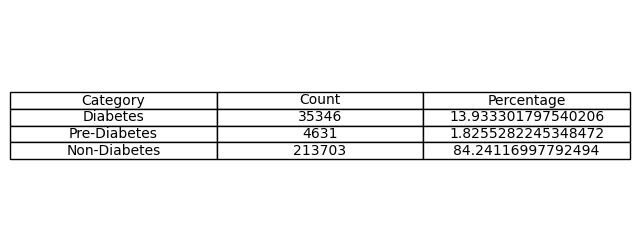

In [183]:
# Diabetes distribution
total_count = len(diabetes_data)

diabetes_count = len(diabetes_data[diabetes_data['Diabetes_012'] == 2])
pre_diabetes_count = len(diabetes_data[diabetes_data['Diabetes_012'] == 1])
non_diabetes_count = len(diabetes_data[diabetes_data['Diabetes_012'] == 0])

diabetes_percentage = (diabetes_count / total_count) * 100
pre_diabetes_percentage = (pre_diabetes_count / total_count) * 100
non_diabetes_percentage = (non_diabetes_count / total_count) * 100

# Create a summary table
summary_table = pd.DataFrame({
    'Category': ['Diabetes', 'Pre-Diabetes', 'Non-Diabetes'],
    'Count': [diabetes_count, pre_diabetes_count, non_diabetes_count],
    'Percentage': [diabetes_percentage, pre_diabetes_percentage, non_diabetes_percentage]
})

# Plot the table
fig, ax = plt.subplots(figsize=(8, 3)) 
ax.axis('tight')
ax.axis('off')
table = ax.table(cellText=summary_table.values, colLabels=summary_table.columns, cellLoc='center', loc='center')

# Save the table as an image
plt.savefig('C:/Users/ammar/OneDrive/Desktop/ESSEX/Dissertation/graphs/Diabetes_class_table.png')

# Print
print("Summary table saved as 'diabetes_class_table.png'")

## Summary Statistics

In [184]:
diabetes_data.describe().T

count       mean       std   min   25%   50%   75%  \
Diabetes_012          253680.0   0.296921  0.698160   0.0   0.0   0.0   0.0   
HighBP                253680.0   0.429001  0.494934   0.0   0.0   0.0   1.0   
HighChol              253680.0   0.424121  0.494210   0.0   0.0   0.0   1.0   
CholCheck             253680.0   0.962670  0.189571   0.0   1.0   1.0   1.0   
BMI                   253680.0  28.382364  6.608694  12.0  24.0  27.0  31.0   
Smoker                253680.0   0.443169  0.496761   0.0   0.0   0.0   1.0   
Stroke                253680.0   0.040571  0.197294   0.0   0.0   0.0   0.0   
HeartDiseaseorAttack  253680.0   0.094186  0.292087   0.0   0.0   0.0   0.0   
PhysActivity          253680.0   0.756544  0.429169   0.0   1.0   1.0   1.0   
Fruits                253680.0   0.634256  0.481639   0.0   0.0   1.0   1.0   
Veggies               253680.0   0.811420  0.391175   0.0   1.0   1.0   1.0   
HvyAlcoholConsump     253680.0   0.056197  0.230302   0.0   0.0   0.0   0.0   
AnyHealthcare         253680.0   0.951053  0.215759   0.0   1.0   1.0   1.0   
NoDocbcCost           253680.0   0.084177  0.277654   0.0   0.0   0.0   0.0   
GenHlth               253680.0   2.511392  1.068477   1.0   2.0   2.0   3.0   
MentHlth              253680.0   3.184772  7.412847   0.0   0.0   0.0   2.0   
PhysHlth              253680.0   4.242081  8.717951   0.0   0.0   0.0   3.0   
DiffWalk              253680.0   0.168224  0.374066   0.0   0.0   0.0   0.0   
Sex                   253680.0   0.440342  0.496429   0.0   0.0   0.0   1.0   
Age                   253680.0   8.032119  3.054220   1.0   6.0   8.0  10.0   
Education             253680.0   5.050434  0.985774   1.0   4.0   5.0   6.0   
Income                253680.0   6.053875  2.071148   1.0   5.0   7.0   8.0   

                       max  
Diabetes_012           2.0  
HighBP                 1.0  
HighChol               1.0  
CholCheck              1.0  
BMI                   98.0  
Smoker                 1.0  
Stroke                 1.0  
HeartDiseaseorAttack   1.0  
PhysActivity           1.0  
Fruits                 1.0  
Veggies                1.0  
HvyAlcoholConsump      1.0  
AnyHealthcare          1.0  
NoDocbcCost            1.0  
GenHlth                5.0  
MentHlth              30.0  
PhysHlth              30.0  
DiffWalk               1.0  
Sex                    1.0  
Age                   13.0  
Education              6.0  
Income                 8.0

In [185]:
styled_df = diabetes_data.describe().style \
    .set_table_styles([
        {'selector': 'th', 'props': [('background-color', '#254E58'), ('color', 'white'), ('font-weight', 'bold'), ('text-align', 'left'), ('padding', '8px')]},
        {'selector': 'td', 'props': [('padding', '8px')]}
    ]) \
    .set_properties(**{'font-size': '14px', 'background-color': '#F5F5F5', 'border-collapse': 'collapse', 'margin': '10px'})

# Display the styled DataFrame
styled_df

In [186]:
unique_values = {}
for col in diabetes_data.columns:
    unique_values[col] = diabetes_data[col].value_counts().shape[0]

pd.DataFrame(unique_values, index=['unique value count']).transpose()

unique value count
Diabetes_012                           3
HighBP                                 2
HighChol                               2
CholCheck                              2
BMI                                   84
Smoker                                 2
Stroke                                 2
HeartDiseaseorAttack                   2
PhysActivity                           2
Fruits                                 2
Veggies                                2
HvyAlcoholConsump                      2
AnyHealthcare                          2
NoDocbcCost                            2
GenHlth                                5
MentHlth                              31
PhysHlth                              31
DiffWalk                               2
Sex                                    2
Age                                   13
Education                              6
Income                                 8

## Data Types

In [187]:
diabetes_data.dtypes

Diabetes_012            float64
HighBP                  float64
HighChol                float64
CholCheck               float64
BMI                     float64
Smoker                  float64
Stroke                  float64
HeartDiseaseorAttack    float64
PhysActivity            float64
Fruits                  float64
Veggies                 float64
HvyAlcoholConsump       float64
AnyHealthcare           float64
NoDocbcCost             float64
GenHlth                 float64
MentHlth                float64
PhysHlth                float64
DiffWalk                float64
Sex                     float64
Age                     float64
Education               float64
Income                  float64
dtype: object

## Data Preprocessing

### Handling Missing Values

In [188]:
diabetes_data.isnull().sum()

Diabetes_012            0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [189]:
diabetes_data.dtypes

Diabetes_012            float64
HighBP                  float64
HighChol                float64
CholCheck               float64
BMI                     float64
Smoker                  float64
Stroke                  float64
HeartDiseaseorAttack    float64
PhysActivity            float64
Fruits                  float64
Veggies                 float64
HvyAlcoholConsump       float64
AnyHealthcare           float64
NoDocbcCost             float64
GenHlth                 float64
MentHlth                float64
PhysHlth                float64
DiffWalk                float64
Sex                     float64
Age                     float64
Education               float64
Income                  float64
dtype: object

### Feature Engineering

In [190]:
# Create the 'Diabetes_Binary' column by modifying 'Diabetes_012' values
diabetes_data['Diabetes_Binary'] = diabetes_data['Diabetes_012'].apply(lambda x: 1 if x == 2 else 0)

# Display the first few rows to verify the new column
print(diabetes_data)

        Diabetes_012  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0                0.0     1.0       1.0        1.0  40.0     1.0     0.0   
1                0.0     0.0       0.0        0.0  25.0     1.0     0.0   
2                0.0     1.0       1.0        1.0  28.0     0.0     0.0   
3                0.0     1.0       0.0        1.0  27.0     0.0     0.0   
4                0.0     1.0       1.0        1.0  24.0     0.0     0.0   
...              ...     ...       ...        ...   ...     ...     ...   
253675           0.0     1.0       1.0        1.0  45.0     0.0     0.0   
253676           2.0     1.0       1.0        1.0  18.0     0.0     0.0   
253677           0.0     0.0       0.0        1.0  28.0     0.0     0.0   
253678           0.0     1.0       0.0        1.0  23.0     0.0     0.0   
253679           2.0     1.0       1.0        1.0  25.0     0.0     0.0   

        HeartDiseaseorAttack  PhysActivity  Fruits  ...  NoDocbcCost  GenHlth  \
0                 

Create a new **Diabetes_Binary** column from **Diabetes_012** by making diabetics (2) to (1) and pre-diabetic (1) to (0). Having 0 means non-diabetic and 1 means diabetic. 

### Rename Column

In [191]:
# Change the name of column
diabetes_data = diabetes_data.rename(columns = {'Diabetes_012': 'Diabetes'})

In [192]:
diabetes_data

Diabetes  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0            0.0     1.0       1.0        1.0  40.0     1.0     0.0   
1            0.0     0.0       0.0        0.0  25.0     1.0     0.0   
2            0.0     1.0       1.0        1.0  28.0     0.0     0.0   
3            0.0     1.0       0.0        1.0  27.0     0.0     0.0   
4            0.0     1.0       1.0        1.0  24.0     0.0     0.0   
...          ...     ...       ...        ...   ...     ...     ...   
253675       0.0     1.0       1.0        1.0  45.0     0.0     0.0   
253676       2.0     1.0       1.0        1.0  18.0     0.0     0.0   
253677       0.0     0.0       0.0        1.0  28.0     0.0     0.0   
253678       0.0     1.0       0.0        1.0  23.0     0.0     0.0   
253679       2.0     1.0       1.0        1.0  25.0     0.0     0.0   

        HeartDiseaseorAttack  PhysActivity  Fruits  ...  NoDocbcCost  GenHlth  \
0                        0.0           0.0     0.0  ...          0.0      5.0   
1                        0.0           1.0     0.0  ...          1.0      3.0   
2                        0.0           0.0     1.0  ...          1.0      5.0   
3                        0.0           1.0     1.0  ...          0.0      2.0   
4                        0.0           1.0     1.0  ...          0.0      2.0   
...                      ...           ...     ...  ...          ...      ...   
253675                   0.0           0.0     1.0  ...          0.0      3.0   
253676                   0.0           0.0     0.0  ...          0.0      4.0   
253677                   0.0           1.0     1.0  ...          0.0      1.0   
253678                   0.0           0.0     1.0  ...          0.0      3.0   
253679                   1.0           1.0     1.0  ...          0.0      2.0   

        MentHlth  PhysHlth  DiffWalk  Sex   Age  Education  Income  \
0           18.0      15.0       1.0  0.0   9.0        4.0     3.0   
1            0.0       0.0       0.0  0.0   7.0        6.0     1.0   
2           30.0      30.0       1.0  0.0   9.0        4.0     8.0   
3            0.0       0.0       0.0  0.0  11.0        3.0     6.0   
4            3.0       0.0       0.0  0.0  11.0        5.0     4.0   
...          ...       ...       ...  ...   ...        ...     ...   
253675       0.0       5.0       0.0  1.0   5.0        6.0     7.0   
253676       0.0       0.0       1.0  0.0  11.0        2.0     4.0   
253677       0.0       0.0       0.0  0.0   2.0        5.0     2.0   
253678       0.0       0.0       0.0  1.0   7.0        5.0     1.0   
253679       0.0       0.0       0.0  0.0   9.0        6.0     2.0   

        Diabetes_Binary  
0                     0  
1                     0  
2                     0  
3                     0  
4                     0  
...                 ...  
253675                0  
253676                1  
253677                0  
253678                0  
253679                1  

[253680 rows x 23 columns]

### Reindex The Dataframe

In [193]:
### Reindex The Dataframe

column_order = ['Diabetes','Diabetes_Binary','HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 
                    'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 
                    'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 
                    'Sex', 'Age', 'Education', 'Income']

diabetes_data = diabetes_data[column_order]

### Change Columns Types

In [194]:
diabetes_data = diabetes_data.astype(int)

In [195]:
diabetes_data.dtypes

Diabetes                int32
Diabetes_Binary         int32
HighBP                  int32
HighChol                int32
CholCheck               int32
BMI                     int32
Smoker                  int32
Stroke                  int32
HeartDiseaseorAttack    int32
PhysActivity            int32
Fruits                  int32
Veggies                 int32
HvyAlcoholConsump       int32
AnyHealthcare           int32
NoDocbcCost             int32
GenHlth                 int32
MentHlth                int32
PhysHlth                int32
DiffWalk                int32
Sex                     int32
Age                     int32
Education               int32
Income                  int32
dtype: object

### Check And Drop Dublicated Data

In [196]:
duplicats_count = diabetes_data.duplicated().sum()
print(f"Number of duplicate rows: {duplicats_count}")

Number of duplicate rows: 23899


The dataset contains **23899** duplicate rows. 

In [197]:
diabetes_data = diabetes_data.drop_duplicates()

#Check if the duplicates are removed from the original dataframe
print(f"Cleaned data : {diabetes_data.shape}")

Cleaned data : (229781, 23)


After cleaning the dataset by removing duplicates, there is **229781** records in the dataset.

In [198]:
#Function to view the value counts for the whole data
def v_counts(dataframe):
    for i in dataframe :
        print(dataframe[i].value_counts())
        print("_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ __ _ _ _ _ ")

In [199]:

v_counts(diabetes_data)

0    190055
2     35097
1      4629
Name: Diabetes, dtype: int64
_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ __ _ _ _ _ 
0    194684
1     35097
Name: Diabetes_Binary, dtype: int64
_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ __ _ _ _ _ 
0    125359
1    104422
Name: HighBP, dtype: int64
_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ __ _ _ _ _ 
0    128273
1    101508
Name: HighChol, dtype: int64
_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ __ _ _ _ _ 
1    220483
0      9298
Name: CholCheck, dtype: int64
_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ __ _ _ _ _ 
27    21551
26    17808
24    16537
28    14933
25    14809
      ...  
85        1
91        1
86        1
90        1
78        1
Name: BMI, Length: 84, dtype: int64
_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ __ _ _ _ _ 
0    122781
1    107000
Name: Smoker, dtype: 

### Checking Outliers

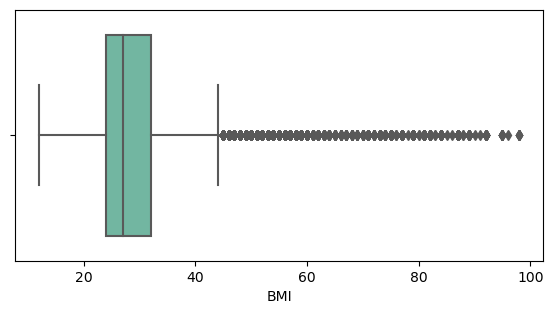

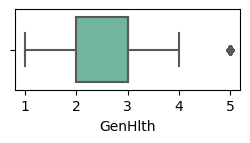

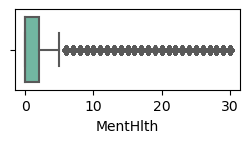

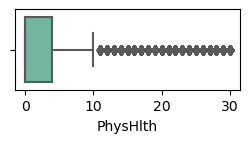

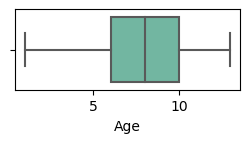

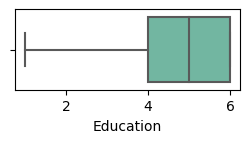

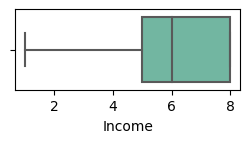

In [200]:
# Ploting Outliers
plt.figure(figsize = (15,15))
feaures = ['BMI','GenHlth','MentHlth','PhysHlth','Age','Education','Income']
for i, col in enumerate(feaures):
    plt.subplot((len(feaures)+1)//2,2,i+1)
    sns.boxplot(x=col,data=diabetes_data,palette='Set2')
    plt.show()

The boxplot shows that:

**BMI:** There are clear outliers outside the whisker.

**GenHlth:** There is almost no outliers outside the whisker.

**MentHlth:** Lot of outliers are there at the higher end of the upper whisker.

**PhysHlth:** There are lot of outliers present on the higher end.

**Age,Education,Income:** These features do not show any outliers, almost all the points lies in the whisker.

### Turning Binary & Numerical Data Into Meaningfull Data For EDA

As the dataset contains both numercial and binary features. Most of the features in this dataset are binary and some of them are numerical features. https://archive.ics.uci.edu/dataset/891/cdc+diabetes+health+indicators defines all the features and their description to provide binary and numerical data into meaningful data. 

In [201]:
# Adding new columns
diabetes_data["Diabetes_Binary_Category"] = diabetes_data["Diabetes_Binary"].replace ({0: "Non-Diabetic",1:"Diabetic"})
diabetes_data["Diabetes_Category"] = diabetes_data["Diabetes"].replace({0:"Non-Diabetic",1:"Pre-Diabetic", 2:"Diabetic"})

In [202]:
diabetes_data

Diabetes  Diabetes_Binary  HighBP  HighChol  CholCheck  BMI  Smoker  \
0              0                0       1         1          1   40       1   
1              0                0       0         0          0   25       1   
2              0                0       1         1          1   28       0   
3              0                0       1         0          1   27       0   
4              0                0       1         1          1   24       0   
...          ...              ...     ...       ...        ...  ...     ...   
253675         0                0       1         1          1   45       0   
253676         2                1       1         1          1   18       0   
253677         0                0       0         0          1   28       0   
253678         0                0       1         0          1   23       0   
253679         2                1       1         1          1   25       0   

        Stroke  HeartDiseaseorAttack  PhysActivity  ...  GenHlth  MentHlth  \
0            0                     0             0  ...        5        18   
1            0                     0             1  ...        3         0   
2            0                     0             0  ...        5        30   
3            0                     0             1  ...        2         0   
4            0                     0             1  ...        2         3   
...        ...                   ...           ...  ...      ...       ...   
253675       0                     0             0  ...        3         0   
253676       0                     0             0  ...        4         0   
253677       0                     0             1  ...        1         0   
253678       0                     0             0  ...        3         0   
253679       0                     1             1  ...        2         0   

        PhysHlth  DiffWalk  Sex  Age  Education  Income  \
0             15         1    0    9          4       3   
1              0         0    0    7          6       1   
2             30         1    0    9          4       8   
3              0         0    0   11          3       6   
4              0         0    0   11          5       4   
...          ...       ...  ...  ...        ...     ...   
253675         5         0    1    5          6       7   
253676         0         1    0   11          2       4   
253677         0         0    0    2          5       2   
253678         0         0    1    7          5       1   
253679         0         0    0    9          6       2   

        Diabetes_Binary_Category  Diabetes_Category  
0                   Non-Diabetic       Non-Diabetic  
1                   Non-Diabetic       Non-Diabetic  
2                   Non-Diabetic       Non-Diabetic  
3                   Non-Diabetic       Non-Diabetic  
4                   Non-Diabetic       Non-Diabetic  
...                          ...                ...  
253675              Non-Diabetic       Non-Diabetic  
253676                  Diabetic           Diabetic  
253677              Non-Diabetic       Non-Diabetic  
253678              Non-Diabetic       Non-Diabetic  
253679                  Diabetic           Diabetic  

[229781 rows x 25 columns]

In [203]:
Diabetes_Categorical_Data = diabetes_data.copy()

In [204]:
Diabetes_Categorical_Data.Age[Diabetes_Categorical_Data['Age'] == 1] = '18 to 24'
Diabetes_Categorical_Data.Age[Diabetes_Categorical_Data['Age'] == 2] = '25 to 29'
Diabetes_Categorical_Data.Age[Diabetes_Categorical_Data['Age'] == 3] = '30 to 34'
Diabetes_Categorical_Data.Age[Diabetes_Categorical_Data['Age'] == 4] = '35 to 39'
Diabetes_Categorical_Data.Age[Diabetes_Categorical_Data['Age'] == 5] = '40 to 44'
Diabetes_Categorical_Data.Age[Diabetes_Categorical_Data['Age'] == 6] = '45 to 49'
Diabetes_Categorical_Data.Age[Diabetes_Categorical_Data['Age'] == 7] = '50 to 54'
Diabetes_Categorical_Data.Age[Diabetes_Categorical_Data['Age'] == 8] = '55 to 59'
Diabetes_Categorical_Data.Age[Diabetes_Categorical_Data['Age'] == 9] = '60 to 64'
Diabetes_Categorical_Data.Age[Diabetes_Categorical_Data['Age'] == 10] = '65 to 69'
Diabetes_Categorical_Data.Age[Diabetes_Categorical_Data['Age'] == 11] = '70 to 74'
Diabetes_Categorical_Data.Age[Diabetes_Categorical_Data['Age'] == 12] = '75 to 79'
Diabetes_Categorical_Data.Age[Diabetes_Categorical_Data['Age'] == 13] = '80 or older'

Diabetes_Categorical_Data.Diabetes_Binary[Diabetes_Categorical_Data['Diabetes_Binary'] == 0] = 'Non-Diabetes'
Diabetes_Categorical_Data.Diabetes_Binary[Diabetes_Categorical_Data['Diabetes_Binary'] == 1] = 'Diabetes'

Diabetes_Categorical_Data.Diabetes[Diabetes_Categorical_Data['Diabetes'] == 0] = 'Non-Diabetes'
Diabetes_Categorical_Data.Diabetes[Diabetes_Categorical_Data['Diabetes'] == 1] = 'Pre-Diabetes'
Diabetes_Categorical_Data.Diabetes[Diabetes_Categorical_Data['Diabetes'] == 2] = 'Diabetes'

Diabetes_Categorical_Data.HighBP[Diabetes_Categorical_Data['HighBP'] == 0] = 'No High BP'
Diabetes_Categorical_Data.HighBP[Diabetes_Categorical_Data['HighBP'] == 1] = 'High BP'

Diabetes_Categorical_Data.HighChol[Diabetes_Categorical_Data['HighChol'] == 0] = 'No High Cholesterol'
Diabetes_Categorical_Data.HighChol[Diabetes_Categorical_Data['HighChol'] == 1] = 'High Cholesterol'

Diabetes_Categorical_Data.CholCheck[Diabetes_Categorical_Data['CholCheck'] == 0] ='No Cholesterol Check within 5 Years'
Diabetes_Categorical_Data.CholCheck[Diabetes_Categorical_Data['CholCheck'] == 1] = 'Cholesterol Check within 5 Years'

Diabetes_Categorical_Data.Smoker[Diabetes_Categorical_Data['Smoker'] == 0] ='Non Smoker'
Diabetes_Categorical_Data.Smoker[Diabetes_Categorical_Data['Smoker'] == 1] ='Smoker'

Diabetes_Categorical_Data.Stroke[Diabetes_Categorical_Data['Stroke'] == 0] = 'No'
Diabetes_Categorical_Data.Stroke[Diabetes_Categorical_Data['Stroke'] == 1] = 'Yes'

Diabetes_Categorical_Data.HeartDiseaseorAttack[Diabetes_Categorical_Data['HeartDiseaseorAttack'] == 0] = 'No'
Diabetes_Categorical_Data.HeartDiseaseorAttack[Diabetes_Categorical_Data['HeartDiseaseorAttack'] == 1] = 'Yes'


Diabetes_Categorical_Data.PhysActivity[Diabetes_Categorical_Data['PhysActivity'] == 0] = 'No'
Diabetes_Categorical_Data.PhysActivity[Diabetes_Categorical_Data['PhysActivity'] == 1] = 'Yes'

Diabetes_Categorical_Data.Fruits[Diabetes_Categorical_Data['Fruits'] == 0] = 'No'
Diabetes_Categorical_Data.Fruits[Diabetes_Categorical_Data['Fruits'] == 1] = 'Yes'

Diabetes_Categorical_Data.Veggies[Diabetes_Categorical_Data['Veggies'] == 0] ='No'
Diabetes_Categorical_Data.Veggies[Diabetes_Categorical_Data['Veggies'] == 1] ='Yes'

Diabetes_Categorical_Data.HvyAlcoholConsump[Diabetes_Categorical_Data['HvyAlcoholConsump'] == 0] = 'No HvyAlcoholConsump'
Diabetes_Categorical_Data.HvyAlcoholConsump[Diabetes_Categorical_Data['HvyAlcoholConsump'] == 1] = 'Yes HvyAlcoholConsump'

Diabetes_Categorical_Data.AnyHealthcare[Diabetes_Categorical_Data['AnyHealthcare'] == 0] ='No'
Diabetes_Categorical_Data.AnyHealthcare[Diabetes_Categorical_Data['AnyHealthcare'] == 1] = 'Yes'


Diabetes_Categorical_Data.NoDocbcCost[Diabetes_Categorical_Data['NoDocbcCost'] == 0] = 'No'
Diabetes_Categorical_Data.NoDocbcCost[Diabetes_Categorical_Data['NoDocbcCost'] == 1] = 'Yes'


Diabetes_Categorical_Data.GenHlth[Diabetes_Categorical_Data['GenHlth'] == 1] = 'Poor Health'
Diabetes_Categorical_Data.GenHlth[Diabetes_Categorical_Data['GenHlth'] == 2] = 'Fair Health'
Diabetes_Categorical_Data.GenHlth[Diabetes_Categorical_Data['GenHlth'] == 3] = 'Good Health'
Diabetes_Categorical_Data.GenHlth[Diabetes_Categorical_Data['GenHlth'] == 4] = 'Very Good Health'
Diabetes_Categorical_Data.GenHlth[Diabetes_Categorical_Data['GenHlth'] == 5] = 'Excellent Health'


Diabetes_Categorical_Data.DiffWalk[Diabetes_Categorical_Data['DiffWalk'] == 0] = 'No'
Diabetes_Categorical_Data.DiffWalk[Diabetes_Categorical_Data['DiffWalk'] == 1] = 'Yes'

Diabetes_Categorical_Data.Sex[Diabetes_Categorical_Data['Sex'] == 0] = 'Female'
Diabetes_Categorical_Data.Sex[Diabetes_Categorical_Data['Sex'] == 1] = 'Male'



Diabetes_Categorical_Data.Education[Diabetes_Categorical_Data['Education'] == 1] = 'Never Attended School'
Diabetes_Categorical_Data.Education[Diabetes_Categorical_Data['Education'] == 2] = 'Elementary'
Diabetes_Categorical_Data.Education[Diabetes_Categorical_Data['Education'] == 3] = 'Junior High School'
Diabetes_Categorical_Data.Education[Diabetes_Categorical_Data['Education'] == 4] = 'Senior High School'
Diabetes_Categorical_Data.Education[Diabetes_Categorical_Data['Education'] == 5] = 'Undergraduate Degree'
Diabetes_Categorical_Data.Education[Diabetes_Categorical_Data['Education'] == 6] = 'Masters'



Diabetes_Categorical_Data.Income[Diabetes_Categorical_Data['Income'] == 1] = 'Less Than $10,000'
Diabetes_Categorical_Data.Income[Diabetes_Categorical_Data['Income'] == 2] = 'Less Than $25,000'
Diabetes_Categorical_Data.Income[Diabetes_Categorical_Data['Income'] == 3] = 'Less Than $35,000'
Diabetes_Categorical_Data.Income[Diabetes_Categorical_Data['Income'] == 4] = 'Less Than $45,000'
Diabetes_Categorical_Data.Income[Diabetes_Categorical_Data['Income'] == 5] = 'Less Than $55,000'
Diabetes_Categorical_Data.Income[Diabetes_Categorical_Data['Income'] == 6] = 'Less Than $65,000'
Diabetes_Categorical_Data.Income[Diabetes_Categorical_Data['Income'] == 7] = 'Less Than $75,000'
Diabetes_Categorical_Data.Income[Diabetes_Categorical_Data['Income'] == 8] = '$75,000 or More'

In [205]:
Diabetes_Categorical_Data

Diabetes Diabetes_Binary      HighBP             HighChol  \
0       Non-Diabetes    Non-Diabetes     High BP     High Cholesterol   
1       Non-Diabetes    Non-Diabetes  No High BP  No High Cholesterol   
2       Non-Diabetes    Non-Diabetes     High BP     High Cholesterol   
3       Non-Diabetes    Non-Diabetes     High BP  No High Cholesterol   
4       Non-Diabetes    Non-Diabetes     High BP     High Cholesterol   
...              ...             ...         ...                  ...   
253675  Non-Diabetes    Non-Diabetes     High BP     High Cholesterol   
253676      Diabetes        Diabetes     High BP     High Cholesterol   
253677  Non-Diabetes    Non-Diabetes  No High BP  No High Cholesterol   
253678  Non-Diabetes    Non-Diabetes     High BP  No High Cholesterol   
253679      Diabetes        Diabetes     High BP     High Cholesterol   

                                  CholCheck  BMI      Smoker Stroke  \
0          Cholesterol Check within 5 Years   40      Smoker     No   
1       No Cholesterol Check within 5 Years   25      Smoker     No   
2          Cholesterol Check within 5 Years   28  Non Smoker     No   
3          Cholesterol Check within 5 Years   27  Non Smoker     No   
4          Cholesterol Check within 5 Years   24  Non Smoker     No   
...                                     ...  ...         ...    ...   
253675     Cholesterol Check within 5 Years   45  Non Smoker     No   
253676     Cholesterol Check within 5 Years   18  Non Smoker     No   
253677     Cholesterol Check within 5 Years   28  Non Smoker     No   
253678     Cholesterol Check within 5 Years   23  Non Smoker     No   
253679     Cholesterol Check within 5 Years   25  Non Smoker     No   

       HeartDiseaseorAttack PhysActivity  ...           GenHlth MentHlth  \
0                        No           No  ...  Excellent Health       18   
1                        No          Yes  ...       Good Health        0   
2                        No           No  ...  Excellent Health       30   
3                        No          Yes  ...       Fair Health        0   
4                        No          Yes  ...       Fair Health        3   
...                     ...          ...  ...               ...      ...   
253675                   No           No  ...       Good Health        0   
253676                   No           No  ...  Very Good Health        0   
253677                   No          Yes  ...       Poor Health        0   
253678                   No           No  ...       Good Health        0   
253679                  Yes          Yes  ...       Fair Health        0   

       PhysHlth DiffWalk     Sex       Age             Education  \
0            15      Yes  Female  60 to 64    Senior High School   
1             0       No  Female  50 to 54               Masters   
2            30      Yes  Female  60 to 64    Senior High School   
3             0       No  Female  70 to 74    Junior High School   
4             0       No  Female  70 to 74  Undergraduate Degree   
...         ...      ...     ...       ...                   ...   
253675        5       No    Male  40 to 44               Masters   
253676        0      Yes  Female  70 to 74            Elementary   
253677        0       No  Female  25 to 29  Undergraduate Degree   
253678        0       No    Male  50 to 54  Undergraduate Degree   
253679        0       No  Female  60 to 64               Masters   

                   Income Diabetes_Binary_Category Diabetes_Category  
0       Less Than $35,000             Non-Diabetic      Non-Diabetic  
1       Less Than $10,000             Non-Diabetic      Non-Diabetic  
2         $75,000 or More             Non-Diabetic      Non-Diabetic  
3       Less Than $65,000             Non-Diabetic      Non-Diabetic  
4       Less Than $45,000             Non-Diabetic      Non-Diabetic  
...                   ...                      ...               ...  
253675  Less Than $75,000             Non-Diabetic     

## Exploratory Data Analysis

### Dataset Size And Distribution

In [206]:
# Dataset Size
print("Dataset Size:", diabetes_data.shape)

Dataset Size: (229781, 25)


Summary table saved as 'diabetes_summary_table.jpg'


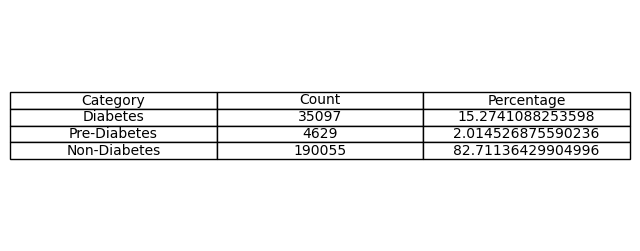

In [37]:
# Diabetes distribution
total_count = len(diabetes_data)

diabetic_count = len(diabetes_data[diabetes_data['Diabetes_Category'] == 'Diabetic'])
pre_diabetic_count = len(diabetes_data[diabetes_data['Diabetes_Category'] == 'Pre-Diabetic'])
non_diabetic_count = len(diabetes_data[diabetes_data['Diabetes_Category'] == 'Non-Diabetic'])

diabetes_percentage = (diabetic_count / total_count) * 100
pre_diabetes_percentage = (pre_diabetic_count / total_count) * 100
non_diabetes_percentage = (non_diabetic_count / total_count) * 100

# Create a summary table
summary_table = pd.DataFrame({
    'Category': ['Diabetes', 'Pre-Diabetes', 'Non-Diabetes'],
    'Count': [diabetic_count, pre_diabetic_count, non_diabetic_count],
    'Percentage': [diabetes_percentage, pre_diabetes_percentage, non_diabetes_percentage]
})

# Plot the table
fig, ax = plt.subplots(figsize=(8, 3))  # Adjust the size as needed
ax.axis('tight')
ax.axis('off')
table = ax.table(cellText=summary_table.values, colLabels=summary_table.columns, cellLoc='center', loc='center')

# Save the table as an image
plt.savefig('C:/Users/ammar/OneDrive/Desktop/ESSEX/Dissertation/graphs/diabetes_summary_table.jpg')

print("Summary table saved as 'diabetes_summary_table.jpg'")

1: Class 0: The dataset contains **190055** records with percentage distribution of **82.71\%** of non-diabetic (healthy) class. 

2: Class 1: The dataset contains **4629** records with percentage distribution of **2.014\%** of pre-diabetic class.

3: Class 2: The dataset contains **35097** records with percentage distribution of **15.27\%** of diabetes class. 

### Histogram To Understand Dataset

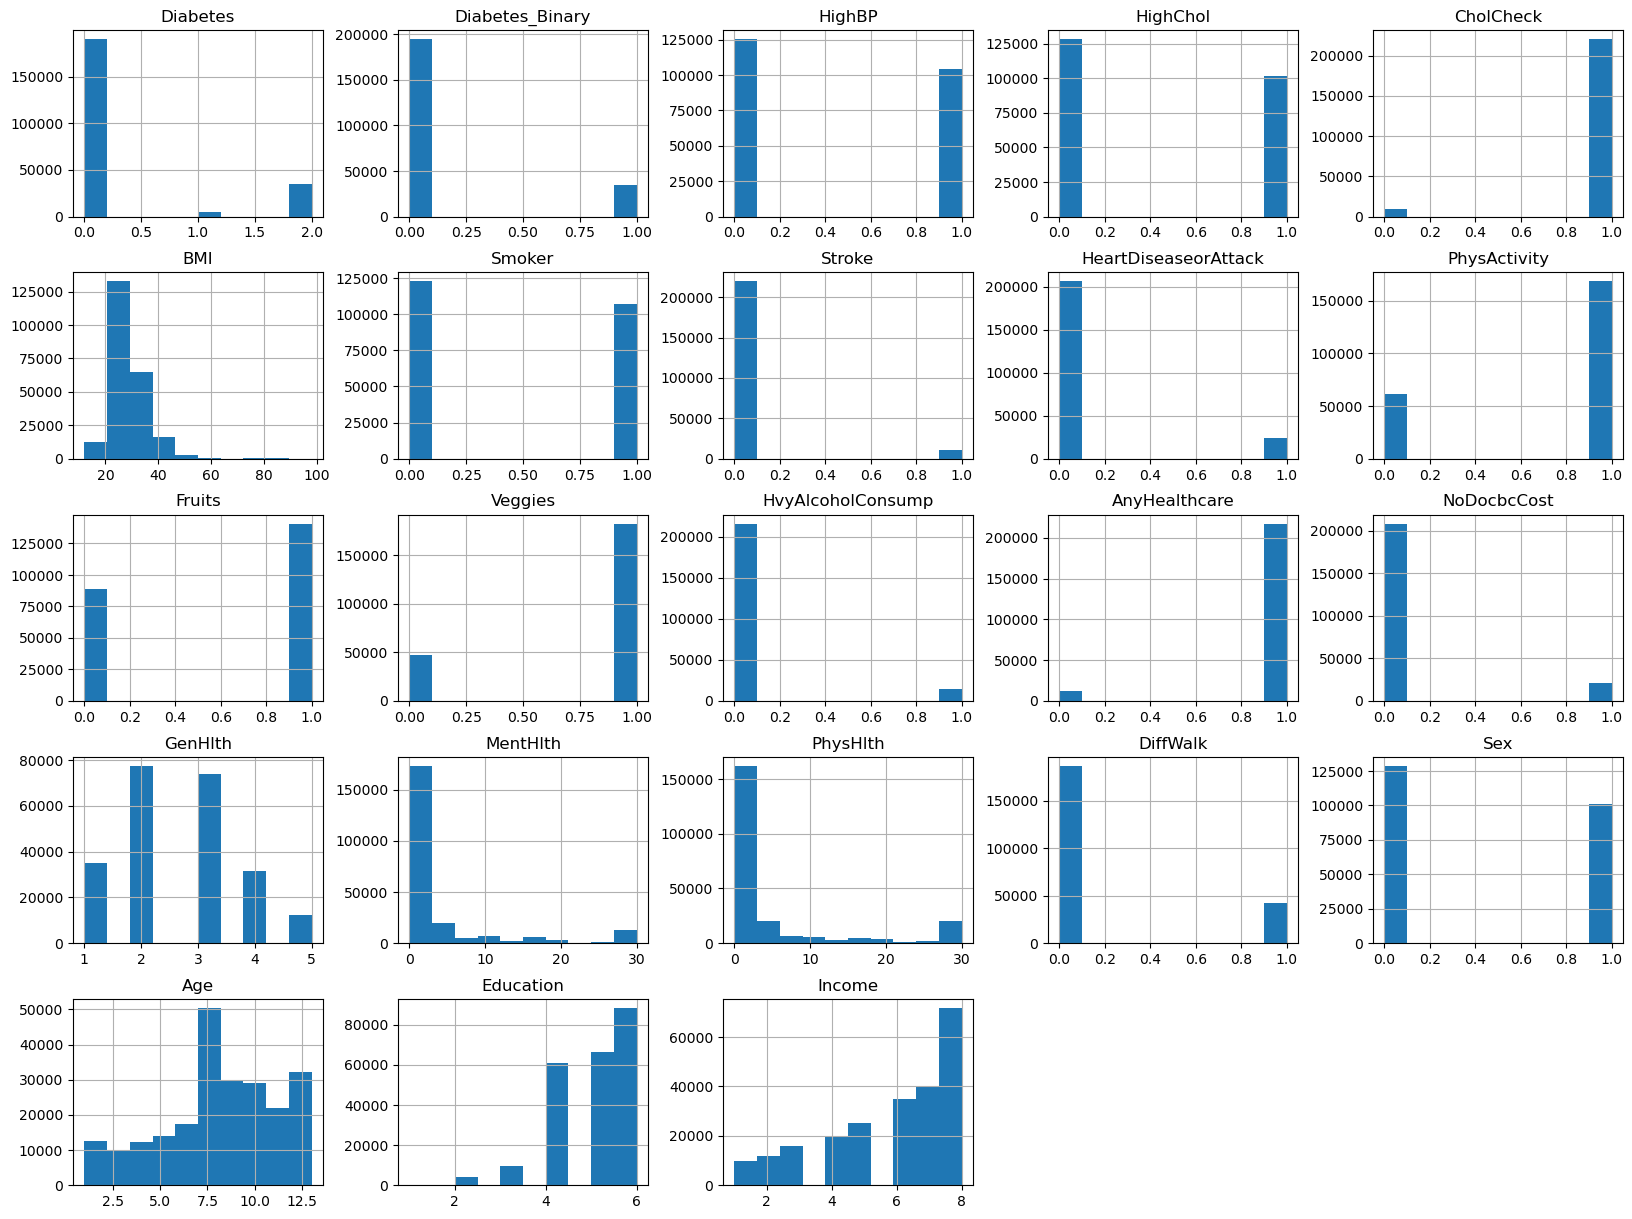

In [41]:
# Understanding of the dataset using histogram
diabetes_data.hist(figsize = (20,15))
plt.savefig('C:/Users/ammar/OneDrive/Desktop/ESSEX/Dissertation/graphs/Histograms To Understand Dataset.jpg')
plt.show()

### Correlation Analysis

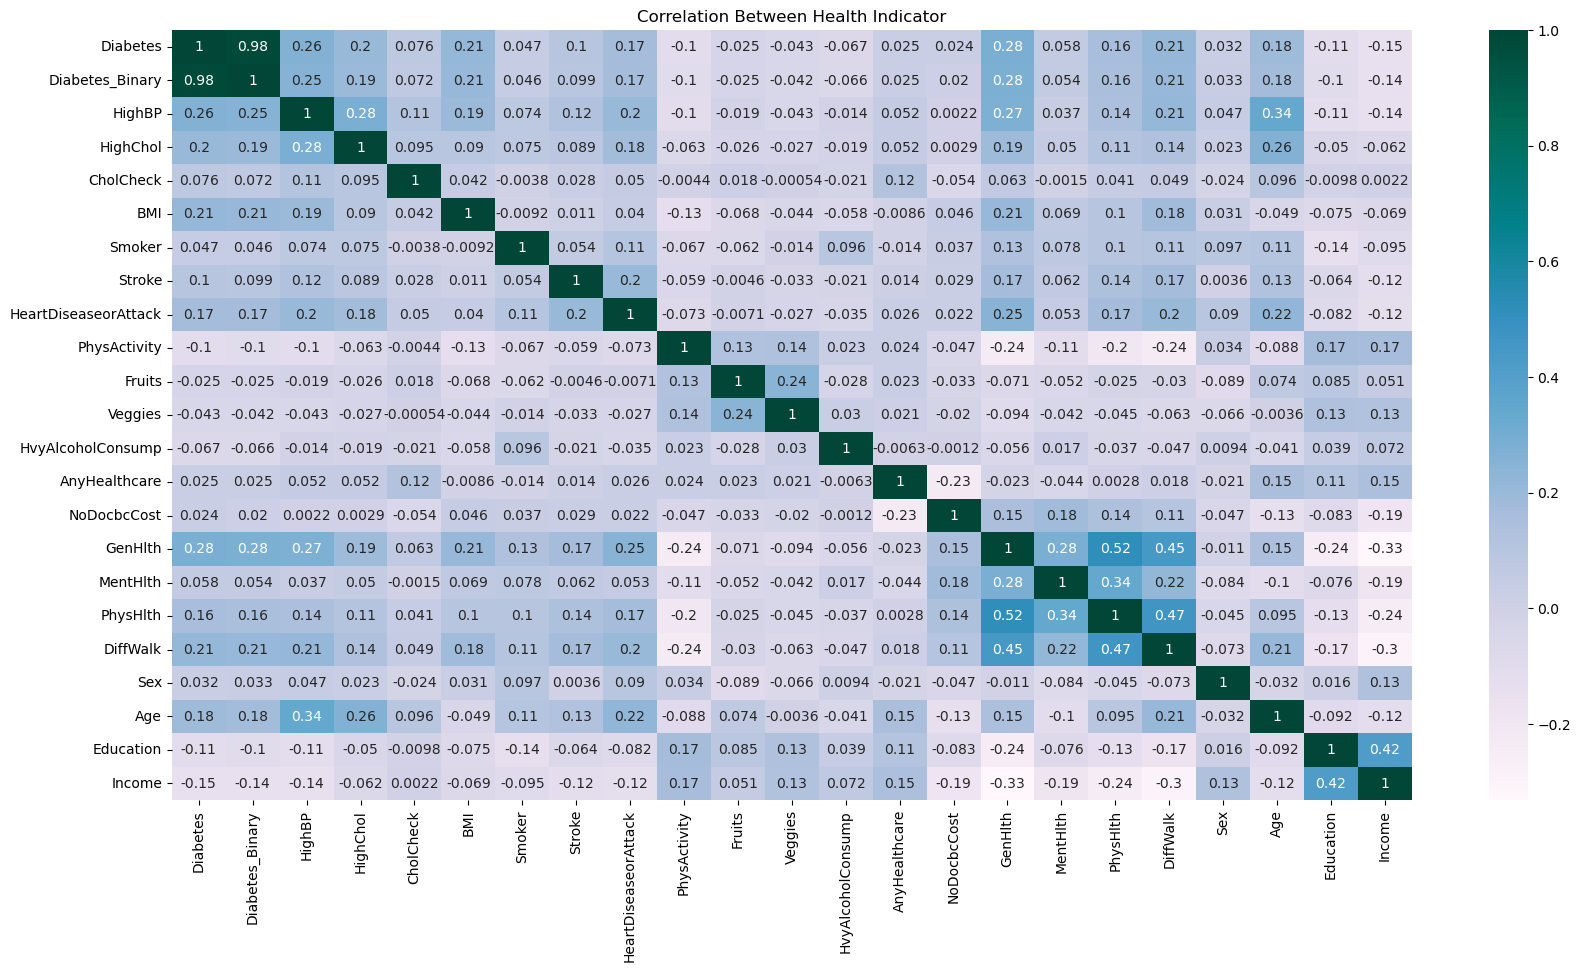

In [42]:
# Correlation Heatmap
plt.figure(figsize = (20,10))
sns.heatmap(diabetes_data.corr(), annot = True, cmap='PuBuGn')
plt.title("Correlation Between Health Indicator")

# Save
plt.savefig('C:/Users/ammar/OneDrive/Desktop/ESSEX/Dissertation/graphs/Correlation Between Health Indicator.jpg')

# plot 
plt.show()

### Correlation Between Health Indicators


The above heatmap shows:

Highly possitive correlation between the following health indicators (PhysHlth,Genhlth),(PhysHlth, DiffWalk),(GenHlth, DiffWalk)

Highly negative correlation between the following health indicators (Income,GenHlth) , (DiffWalk, Income)

In [43]:
countNonDiabetic = len(diabetes_data[diabetes_data.Diabetes == 0])
countHavePreDiabetic = len(diabetes_data[diabetes_data.Diabetes == 1])
countDiabteic = len(diabetes_data[diabetes_data.Diabetes == 2])
print("Percentage of Patients Are Non-Diabetic: {:.2f}%".format((countNonDiabetic / (len(diabetes_data.Diabetes))*100)))
print("Percentage of Patients Are Pre-Diabetic: {:.2f}%".format((countHavePreDiabetic / (len(diabetes_data.Diabetes))*100)))
print("Percentage of Patients Are Diabetic: {:.2f}%".format((countDiabteic / (len(diabetes_data.Diabetes))*100)))

Percentage of Patients Are Non-Diabetic: 82.71%
Percentage of Patients Are Pre-Diabetic: 2.01%
Percentage of Patients Are Diabetic: 15.27%


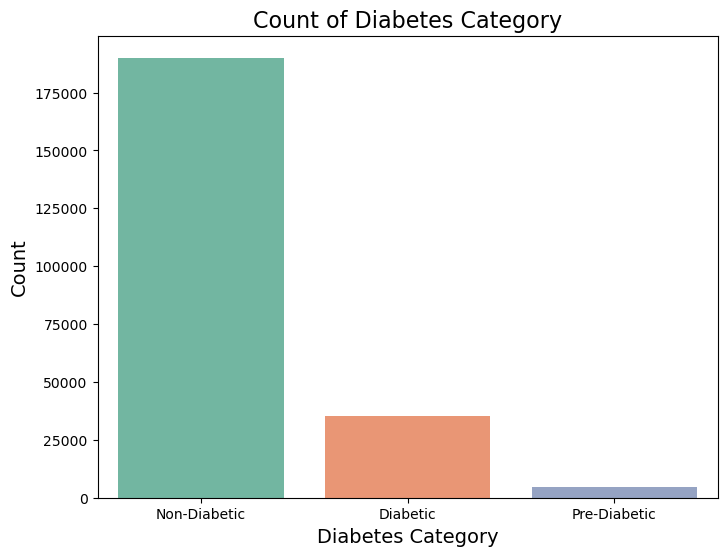

In [44]:
# Count 
diabetes_counts = diabetes_data['Diabetes_Category'].value_counts()

# Plot the bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x=diabetes_counts.index, y=diabetes_counts.values, palette='Set2')

# Add labels and title
plt.title('Count of Diabetes Category', fontsize=16)
plt.xlabel('Diabetes Category', fontsize=14)
plt.ylabel('Count', fontsize=14)

plt.savefig('C:/Users/ammar/OneDrive/Desktop/ESSEX/Dissertation/graphs/Diabetes Category Count.jpg')

# Show the plot
plt.show()

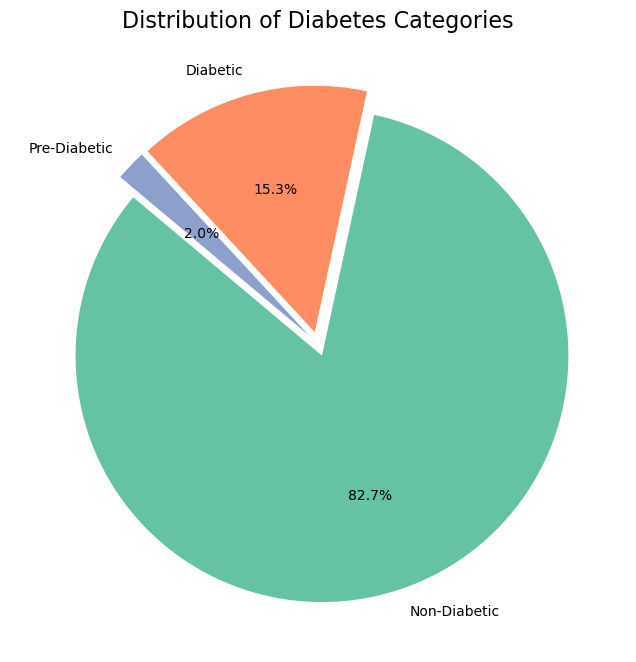

In [45]:
# Calculate the counts of each category
diabetes_counts = diabetes_data['Diabetes_Category'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    diabetes_counts.values,
    labels=diabetes_counts.index,
    autopct='%1.1f%%',  
    startangle=140,
    colors=plt.cm.Set2.colors,  
    explode=[0.05] * len(diabetes_counts)  # Slightly explode all segments
)

# Add a title
plt.title('Distribution of Diabetes Categories', fontsize=16)
plt.savefig('C:/Users/ammar/OneDrive/Desktop/ESSEX/Dissertation/graphs/Diabetes Class Distribution.jpg')

# Show the plot
plt.show()

### Health Indicators: HighBP, HighChol, And BMI Effect On Diabetes

#### Relationship Of HighBP With Target Variable

In [49]:
# Diabetes Patients with HighBP
pd.crosstab(Diabetes_Categorical_Data.HighBP, Diabetes_Categorical_Data.Diabetes_Category)


Diabetes_Category  Diabetic  Non-Diabetic  Pre-Diabetic
HighBP                                                 
High BP               26405         75105          2912
No High BP             8692        114950          1717

In [50]:
#HighBP Distribution
X = diabetes_data.groupby("Diabetes_Category")["HighBP"].value_counts()
Y = diabetes_data.groupby("Diabetes_Category")["HighBP"].count()

Diabetes_vs_HighBP = (X/Y)*100

#Print
print(Diabetes_vs_HighBP)

Diabetes_Category  HighBP
Diabetic           1         75.234351
                   0         24.765649
Non-Diabetic       0         60.482492
                   1         39.517508
Pre-Diabetic       1         62.907755
                   0         37.092245
Name: HighBP, dtype: float64


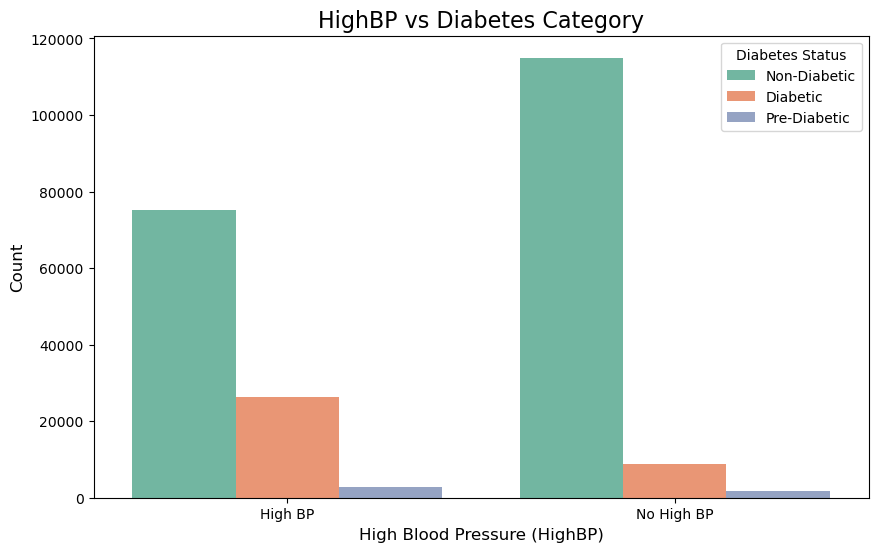

In [51]:
# Bar plot for HighBP vs Diabetes Category
plt.figure(figsize=(10,6))
sns.countplot(data=Diabetes_Categorical_Data, x='HighBP', hue='Diabetes_Category', palette='Set2')

# Set labels and title
plt.title('HighBP vs Diabetes Category', fontsize=16)
plt.xlabel('High Blood Pressure (HighBP)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Diabetes Status')


# Save the bar chart as an image
plt.savefig('C:/Users/ammar/OneDrive/Desktop/ESSEX/Dissertation/graphs/HighBP vs Diabetes Category.jpg')

# Show plot
plt.show()

<Figure size 1200x1000 with 0 Axes>

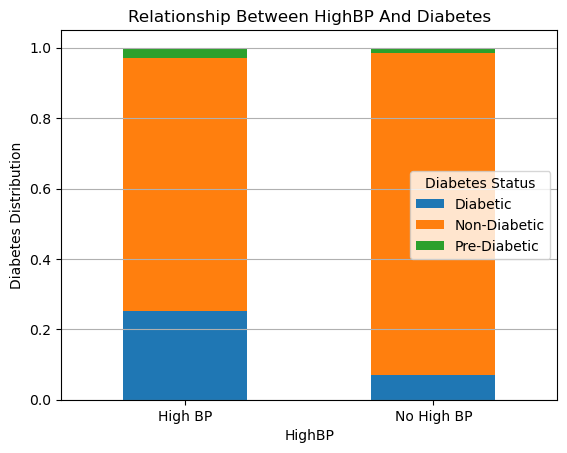

In [52]:
#Stacked Barchart
plt.figure(figsize = (12,10))

HighBP_Diabetes_Relation = pd.crosstab(Diabetes_Categorical_Data['HighBP'], Diabetes_Categorical_Data['Diabetes_Category'], normalize = 'index')

HighBP_Diabetes_Relation.plot(kind = 'bar', stacked = True)
plt.xticks(rotation=0)

# Plot
plt.title('Relationship Between HighBP And Diabetes')
plt.xlabel('HighBP')
plt.ylabel('Diabetes Distribution')
plt.legend(title = 'Diabetes Status',loc = 5)
plt.grid(axis = 'y')

# Save the plot
plt.savefig('C:/Users/ammar/OneDrive/Desktop/ESSEX/Dissertation/graphs/Relationship Between HighBP And Diabetes.png')

# Display the stack bar chart
plt.show()



By the following graph we can see that HighBP plays a major role in Diabetes. People with HighBP have more chances to have Diabetes.

#### Relationship Of  HighChol With Target Variable



In [53]:
# Diabetes Patients with HighChol
pd.crosstab(Diabetes_Categorical_Data.HighChol, Diabetes_Categorical_Data.Diabetes_Category)


Diabetes_Category    Diabetic  Non-Diabetic  Pre-Diabetic
HighChol                                                 
High Cholesterol        23496         75138          2874
No High Cholesterol     11601        114917          1755

In [54]:
# Diabetes Distribution in terms of highchol
X = diabetes_data.groupby("Diabetes_Category")["HighChol"].value_counts()
Y = diabetes_data.groupby("Diabetes_Category")["HighChol"].count()

Diabetes_vs_HighChol = (X/Y)*100

# Print
print(Diabetes_vs_HighChol)

Diabetes_Category  HighChol
Diabetic           1           66.945893
                   0           33.054107
Non-Diabetic       0           60.465129
                   1           39.534871
Pre-Diabetic       1           62.086844
                   0           37.913156
Name: HighChol, dtype: float64


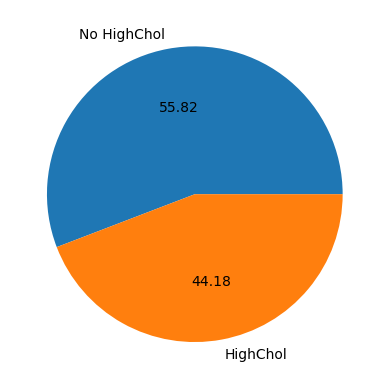

In [55]:
# HighChol PieChart
plt.pie(diabetes_data["HighChol"].value_counts(), labels = ["No HighChol", "HighChol"], autopct = '%0.2f');

#Save fig
plt.savefig('C:/Users/ammar/OneDrive/Desktop/ESSEX/Dissertation/graphs/HighChol Vs Diabetes Piechart.png')

#Show
plt.show()


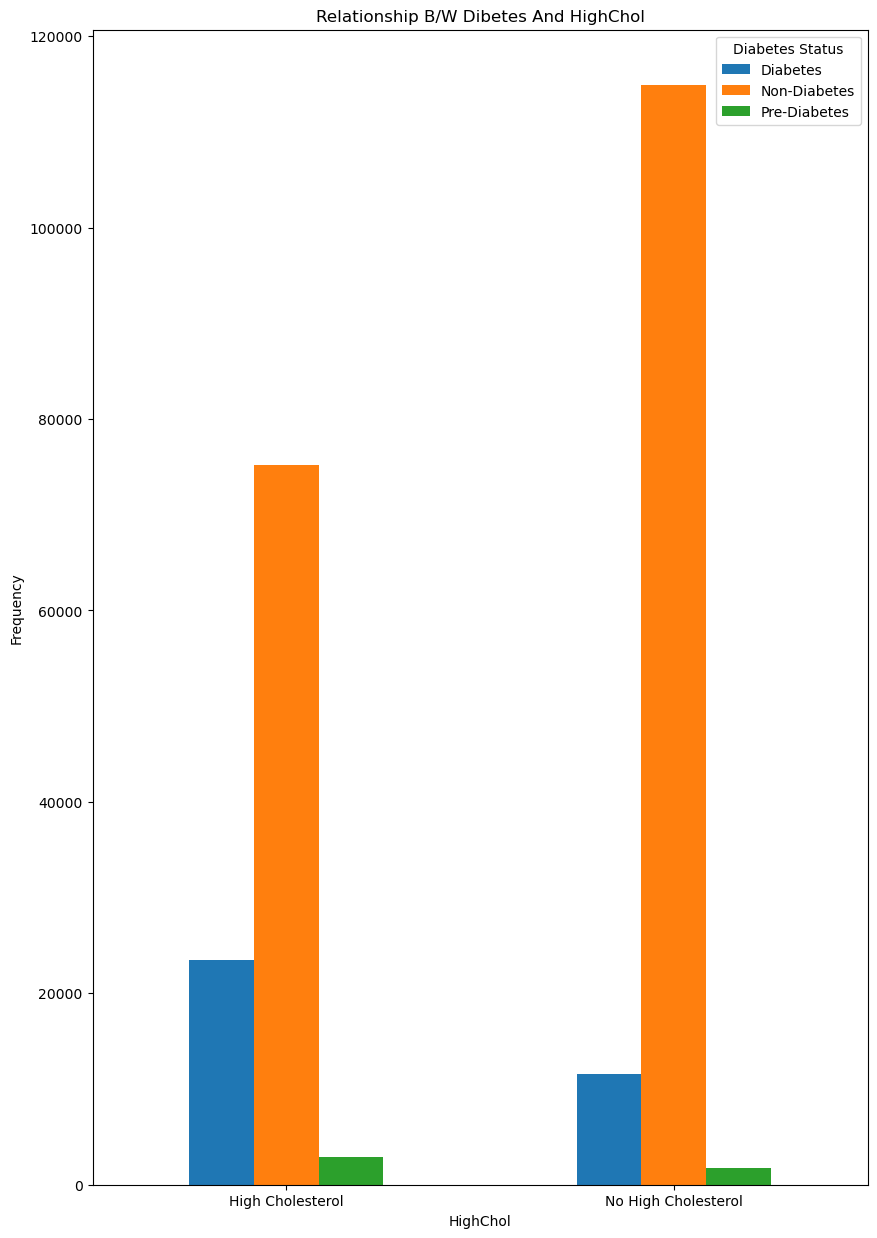

In [56]:
#plot
pd.crosstab (Diabetes_Categorical_Data.HighChol,Diabetes_Categorical_Data.Diabetes).plot(kind = "bar", figsize = (10,15))
plt.xticks(rotation=0)
#labels
plt.title('Relationship B/W Dibetes And HighChol')
plt.xlabel("HighChol", )
plt.ylabel("Frequency")
plt.legend(title = "Diabetes Status")

#Save Fig
plt.savefig('C:/Users/ammar/OneDrive/Desktop/ESSEX/Dissertation/graphs/Relationship Between Dibetes And HighChol.png')

#Show
plt.show()


The graphical and numeical results shows that HighChol plays one of the major role in Diabetes. As the results shows that people with HighChol falls more in the category of Diabetics and Pre-Diabetics.

#### The Combine Effect Of HighBP And HighChol With Target Variable

In [57]:
X = diabetes_data.groupby(["HighBP", "HighChol"])["Diabetes_Category"].value_counts()
Y = diabetes_data.groupby(["HighBP" , "HighChol"])["Diabetes"].count()

HighBP_Chol = (X/Y)*100

# Print
print(HighBP_Chol)

HighBP  HighChol  Diabetes_Category
0       0         Non-Diabetic         94.069223
                  Diabetic              4.929929
                  Pre-Diabetic          1.000848
        1         Non-Diabetic         86.488071
                  Diabetic             11.332586
                  Pre-Diabetic          2.179343
1       0         Non-Diabetic         80.429934
                  Diabetic             17.451241
                  Pre-Diabetic          2.118825
        1         Non-Diabetic         66.168347
                  Diabetic             30.589633
                  Pre-Diabetic          3.242019
dtype: float64


<Figure size 1200x800 with 0 Axes>

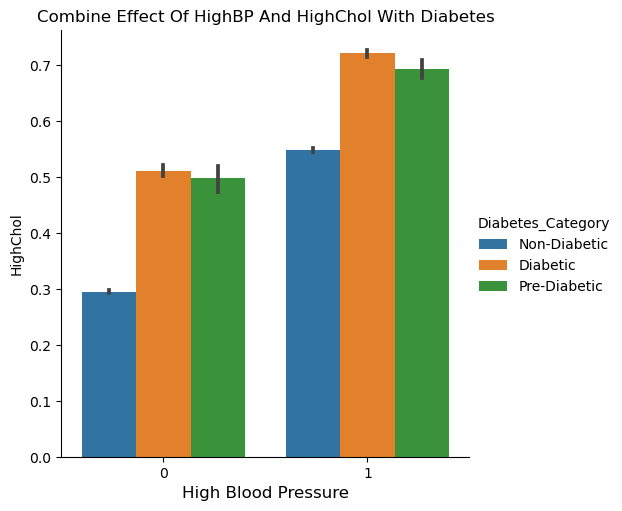

In [58]:
# Figure Size
plt.figure(figsize=(12,8))

# Plot
sns.catplot(x = "HighBP" , y = "HighChol" , data = diabetes_data, hue = "Diabetes_Category", kind = "bar");

#Plot title
plt.title("Combine Effect Of HighBP And HighChol With Diabetes")

# Labels
plt.xlabel("High Blood Pressure", fontsize=12)


# Save Plot
plt.savefig('C:/Users/ammar/OneDrive/Desktop/ESSEX/Dissertation/graphs/Combine Effect Of HighBP And HighChol With Diabetes.jpg')

# Show
plt.show()

The combine effect of High Blood Pressure and High Cholestrol suggests an increased risk of diabetes and people with high cholestrol and high blood pressure are pre diabetic.

#### Relationship Of "BMI" With The Target Variable

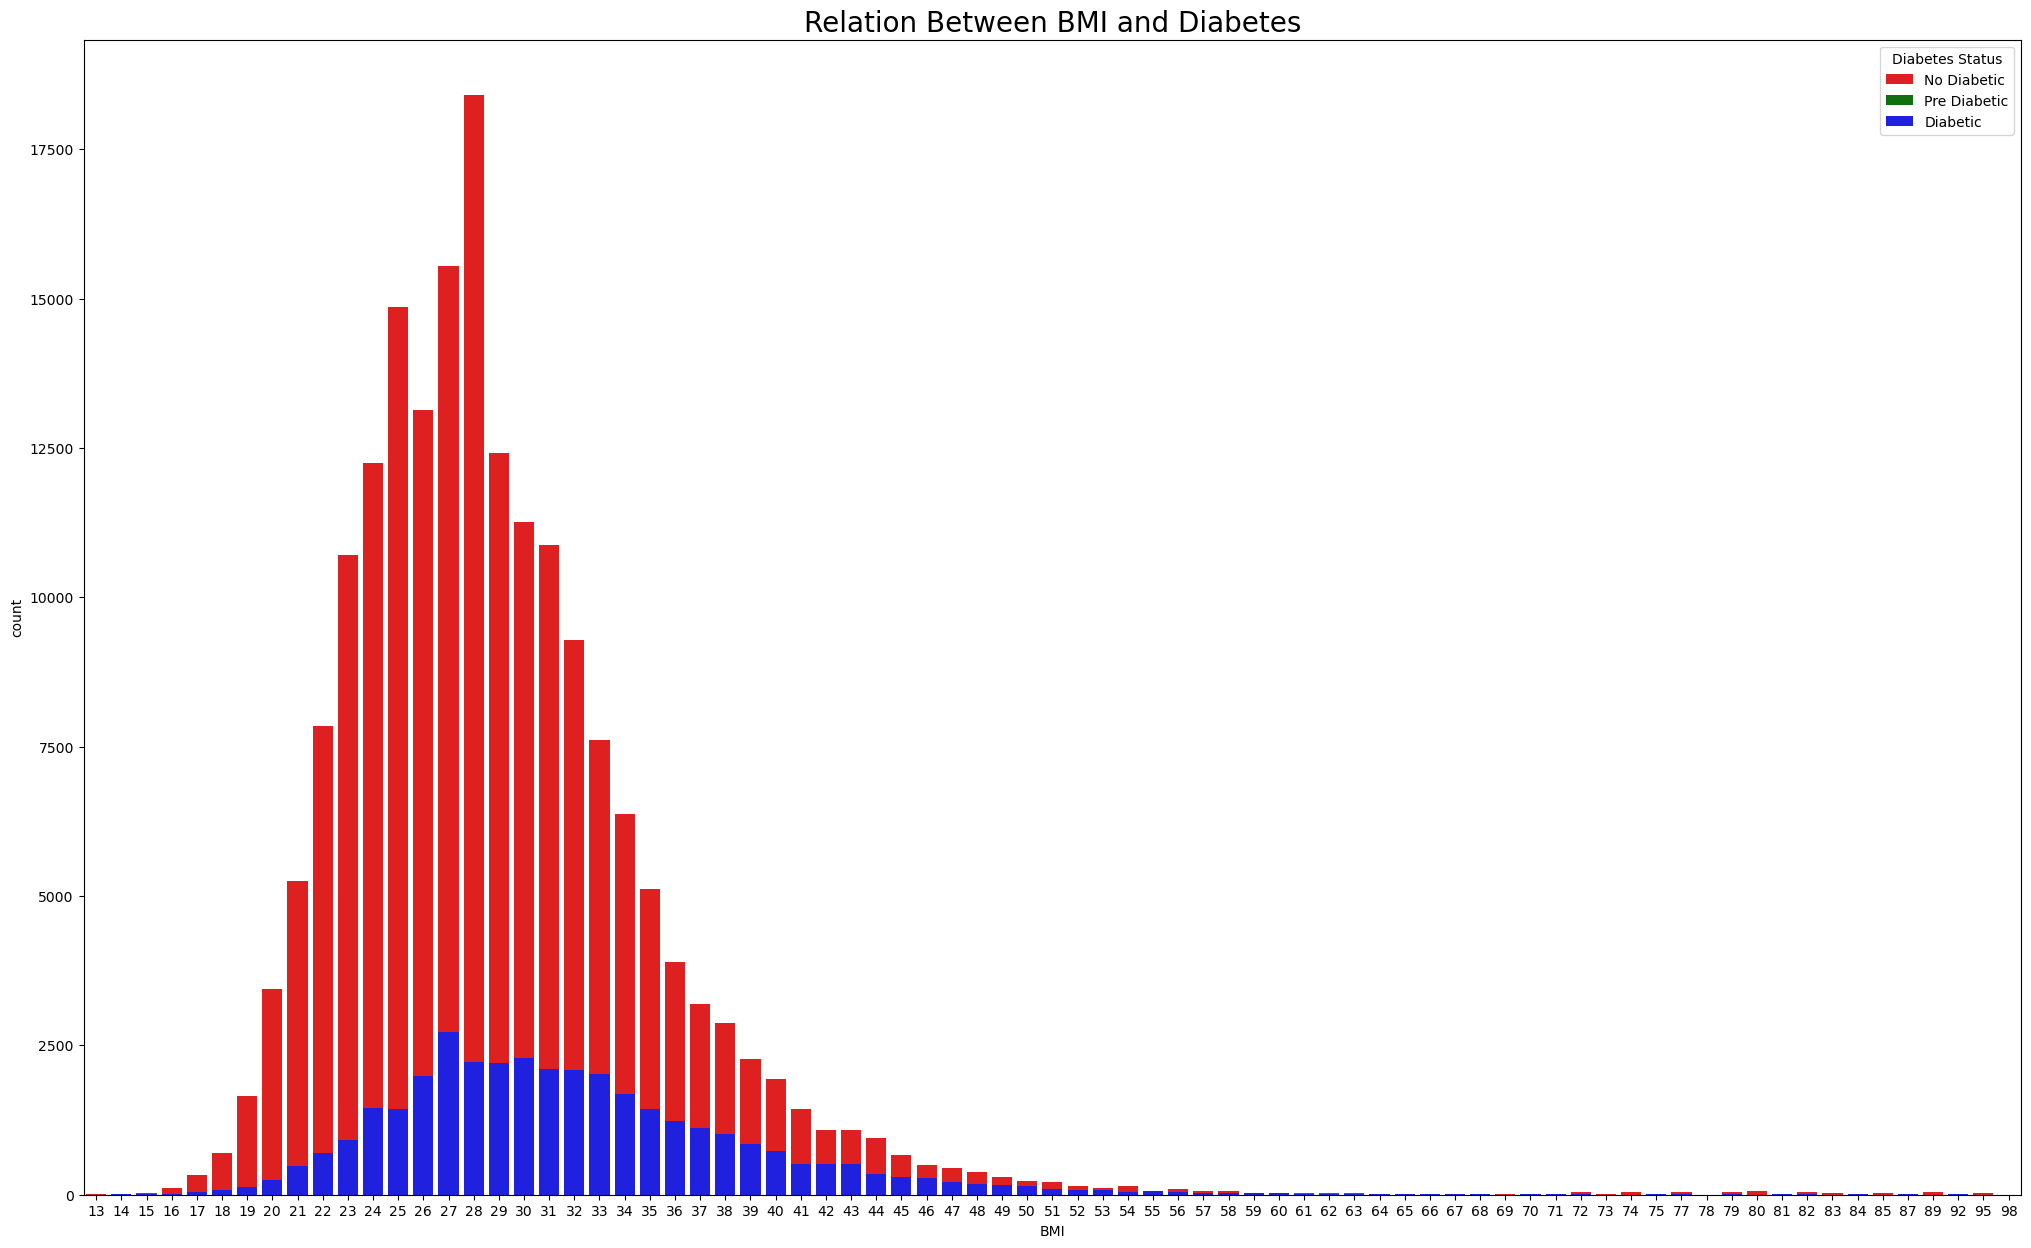

In [59]:
# BMI plot
plt.figure(figsize=(25, 15))

#plot
sns.countplot(x = "BMI",data= diabetes_data[diabetes_data.Diabetes == 0], color="r", label="No Diabetic")
sns.countplot(x = "BMI",data=diabetes_data[diabetes_data.Diabetes  == 1], color="g", label="Pre Diabetic")
sns.countplot(x = "BMI",data=diabetes_data[diabetes_data.Diabetes  == 2], color="b", label="Diabetic")

#label
plt.title("Relation Between BMI and Diabetes", fontsize = 20)
plt.legend(title = 'Diabetes Status')

#save fig
plt.savefig("C:/Users/ammar/OneDrive/Desktop/ESSEX/Dissertation/graphs/Relationship Between BMI And Diabetes.png")

In [60]:
# Treemap
ax = px.treemap(diabetes_data, path=['BMI'], title = "BMI Counts")

# Plot show()
ax.show()

<Axes: >

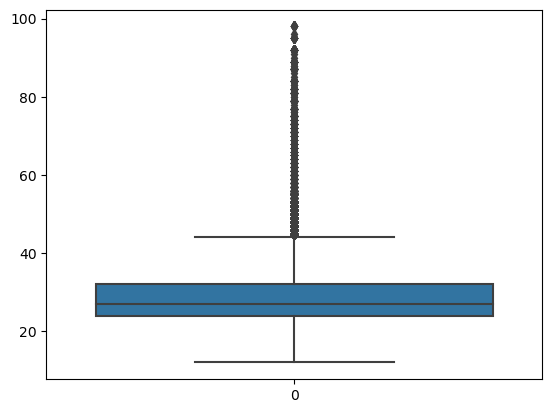

In [61]:
#Checking Outlier In BMI continous features
sns.boxplot(diabetes_data["BMI"])


#### BMI Groups

In [62]:
# Count Of People with BMI less than 20
diabetes_data[(diabetes_data["BMI"] <= 20)]["Diabetes_Category"].value_counts()

Non-Diabetic    11546
Diabetic          545
Pre-Diabetic      113
Name: Diabetes_Category, dtype: int64

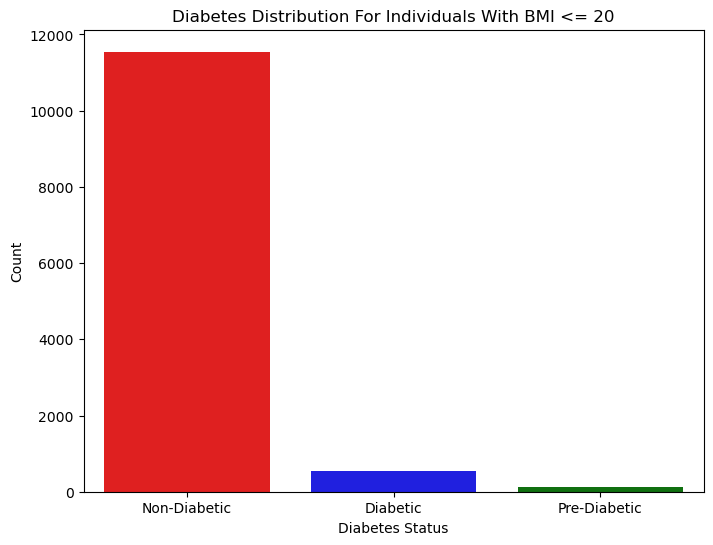

In [63]:
# Countplot for BMI <= 20
BMI_Group_1 = Diabetes_Categorical_Data[Diabetes_Categorical_Data['BMI'] <=20 ]

# plot
plt.figure(figsize = (8,6))
sns.countplot(data = BMI_Group_1, x = "Diabetes_Category", palette = ["r","b","g"])

# labels
plt.title("Diabetes Distribution For Individuals With BMI <= 20")
plt.xlabel("Diabetes Status")
plt.ylabel("Count")

# Save
plt.savefig("C:/Users/ammar/OneDrive/Desktop/ESSEX/Dissertation/graphs/Diabetes Distribution For Individuals With BMI Less Than Equal to 20.png")

# show
plt.show()

 ##### Second Group (BMI > 20 and BMI <=30)

In [64]:
# Count Of People with BMI less than 20
diabetes_data[(diabetes_data["BMI"] > 20) & (diabetes_data["BMI"] <=30)]["Diabetes_Category"].value_counts()

Non-Diabetic    127277
Diabetic         16393
Pre-Diabetic      2470
Name: Diabetes_Category, dtype: int64

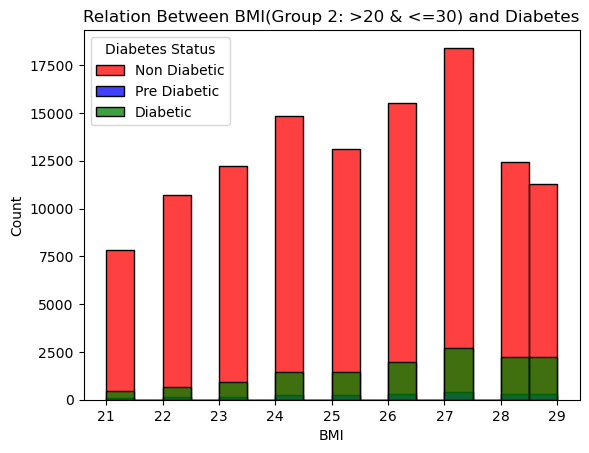

In [65]:
#BMI Group 2
BMI_Group_2 = diabetes_data[(diabetes_data["BMI"] > 20) & (diabetes_data['BMI'] < 30)]

#plot
sns.histplot(BMI_Group_2[BMI_Group_2['Diabetes'] == 0]['BMI'], color = "red", binwidth = 0.5, label = "Non Diabetic")
sns.histplot(BMI_Group_2[BMI_Group_2['Diabetes'] == 1]['BMI'], color = "blue", binwidth = 0.5, label = "Pre Diabetic")
sns.histplot(BMI_Group_2[BMI_Group_2['Diabetes'] == 2]['BMI'], color = "green", binwidth = 0.5, label = "Diabetic")

# Ploting labels
plt.title("Relation Between BMI(Group 2: >20 & <=30) and Diabetes")
plt.xlabel("BMI")
plt.ylabel("Count")
plt.legend(title = "Diabetes Status")

# Save
plt.savefig("C:/Users/ammar/OneDrive/Desktop/ESSEX/Dissertation/graphs/Relation Between BMI Group 2 And Diabete.png")

# Show
plt.show()

#### Third Group (BMI > 30)

In [66]:
# Count Of People with BMI less than 20
diabetes_data[(diabetes_data["BMI"] > 30)]["Diabetes_Category"].value_counts()

Non-Diabetic    51232
Diabetic        18159
Pre-Diabetic     2046
Name: Diabetes_Category, dtype: int64

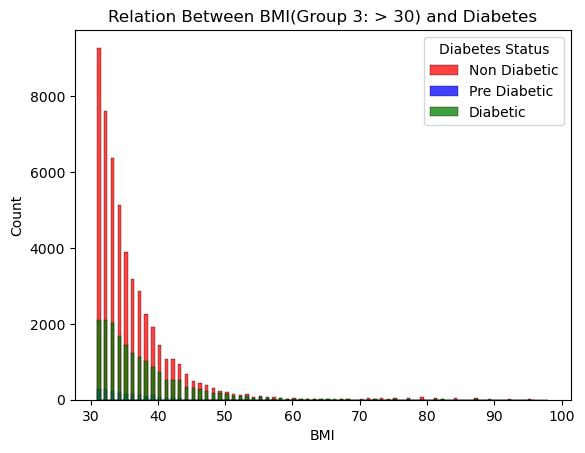

In [67]:
#BMI Group 3
BMI_Group_3 = diabetes_data[(diabetes_data["BMI"] > 30)]

#plot
sns.histplot(BMI_Group_3[BMI_Group_3['Diabetes'] == 0]['BMI'], color = "red", binwidth = 0.5, label = "Non Diabetic")
sns.histplot(BMI_Group_3[BMI_Group_3['Diabetes'] == 1]['BMI'], color = "blue", binwidth = 0.5, label = "Pre Diabetic")
sns.histplot(BMI_Group_3[BMI_Group_3['Diabetes'] == 2]['BMI'], color = "green", binwidth = 0.5, label = "Diabetic")

# Ploting labels
plt.title("Relation Between BMI(Group 3: > 30) and Diabetes")
plt.xlabel("BMI")
plt.ylabel("Count")
plt.legend(title = "Diabetes Status")

# Save
plt.savefig("C:/Users/ammar/OneDrive/Desktop/ESSEX/Dissertation/graphs/Relation Between BMI Group 3 and Diabetes.png")

# Show
plt.show()

### Lifestyle And Health History Related Health Indicator Relationship With The Target Variable Diabetes

#### Smoker

In [68]:
# Diabetic Individuals who smoke
pd.crosstab(Diabetes_Categorical_Data.Smoker,Diabetes_Categorical_Data.Diabetes)

Diabetes    Diabetes  Non-Diabetes  Pre-Diabetes
Smoker                                          
Non Smoker     16874        103559          2348
Smoker         18223         86496          2281

In [69]:
#Smoker Distribution
X = diabetes_data.groupby("Diabetes_Category")["Smoker"].value_counts()
Y = diabetes_data.groupby("Diabetes_Category")["Smoker"].count()

Diabetes_vs_Smoker = (X/Y)*100

#Print
print(Diabetes_vs_Smoker)

Diabetes_Category  Smoker
Diabetic           1         51.921817
                   0         48.078183
Non-Diabetic       0         54.488964
                   1         45.511036
Pre-Diabetic       0         50.723698
                   1         49.276302
Name: Smoker, dtype: float64


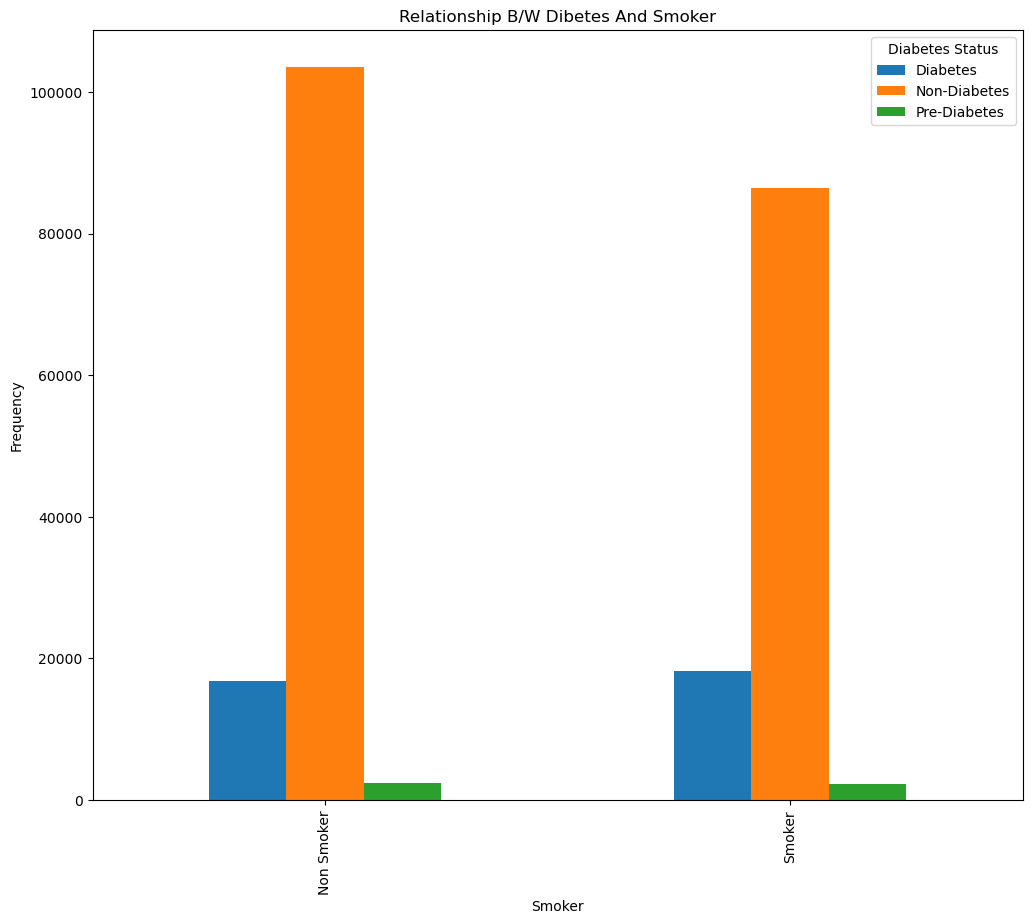

In [70]:
# Plotting
pd.crosstab (Diabetes_Categorical_Data.Smoker,Diabetes_Categorical_Data.Diabetes).plot(kind = "bar", figsize = (12,10))

# Plot
plt.title('Relationship B/W Dibetes And Smoker')
plt.xlabel("Smoker", )
plt.ylabel("Frequency")
plt.legend(title = "Diabetes Status",loc = 1)

# Save Fig
plt.savefig('C:/Users/ammar/OneDrive/Desktop/ESSEX/Dissertation/graphs/Relationship Between Dibetes And Smoker.png')

#Show
plt.show()

#### HvyAlcoholConsump: Heavy Alcohol Consumption

In [71]:
# HvyAlcoholConsump vs Diabetes Category
pd.crosstab(Diabetes_Categorical_Data.HvyAlcoholConsump, Diabetes_Categorical_Data.Diabetes_Category)

Diabetes_Category      Diabetic  Non-Diabetic  Pre-Diabetic
HvyAlcoholConsump                                          
No HvyAlcoholConsump      34265        177145          4421
Yes HvyAlcoholConsump       832         12910           208

In [72]:
# Heavy Alcohol Distribution
X = diabetes_data.groupby("Diabetes_Category")["HvyAlcoholConsump"].value_counts()
Y = diabetes_data.groupby("Diabetes_Category")["HvyAlcoholConsump"].count()

Diabetes_vs_HvyAlcoholConsump = (X/Y)*100

#Print
print(Diabetes_vs_HvyAlcoholConsump)

Diabetes_Category  HvyAlcoholConsump
Diabetic           0                    97.629427
                   1                     2.370573
Non-Diabetic       0                    93.207229
                   1                     6.792771
Pre-Diabetic       0                    95.506589
                   1                     4.493411
Name: HvyAlcoholConsump, dtype: float64


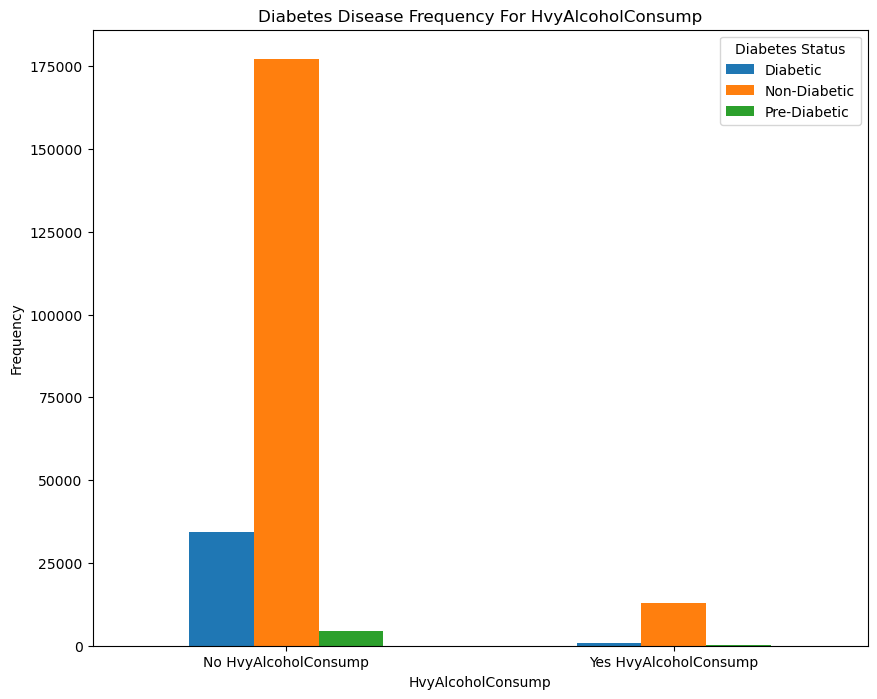

In [73]:
# Bar Chart For HeavyAlcoholConsump
pd.crosstab(Diabetes_Categorical_Data.HvyAlcoholConsump,Diabetes_Categorical_Data.Diabetes_Category).plot(kind="bar",figsize=(10,8))

plt.xticks(rotation=0)
plt.title('Diabetes Disease Frequency For HvyAlcoholConsump')
plt.xlabel("HvyAlcoholConsump")
plt.ylabel('Frequency')
plt.legend(title = 'Diabetes Status')

# Save Fig
plt.savefig('C:/Users/ammar/OneDrive/Desktop/ESSEX/Dissertation/graphs/Diabetes Disease Frequency For HvyAlcoholConsump.png')

# show()
plt.show()

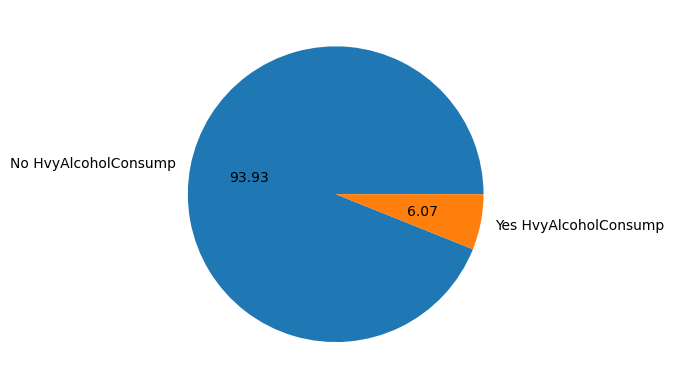

In [74]:
# Heavy Alcohol Consumption Pie.

labels=["No HvyAlcoholConsump","Yes HvyAlcoholConsump"]
plt.pie(diabetes_data["HvyAlcoholConsump"].value_counts(), labels = labels ,autopct='%.02f' );

#### Stroke

In [75]:
# Stroke vs Diabetes Category
pd.crosstab(Diabetes_Categorical_Data.Stroke, Diabetes_Categorical_Data.Diabetes_Category)

Diabetes_Category  Diabetic  Non-Diabetic  Pre-Diabetic
Stroke                                                 
No                    31829        183304          4364
Yes                    3268          6751           265

In [76]:
# Stroke Distribution
X = diabetes_data.groupby("Diabetes_Category")["Stroke"].value_counts()
Y = diabetes_data.groupby("Diabetes_Category")["Stroke"].count()

Diabetes_vs_Stroke = (X/Y)*100

#Print
print(Diabetes_vs_Stroke)

Diabetes_Category  Stroke
Diabetic           0         90.688663
                   1          9.311337
Non-Diabetic       0         96.447870
                   1          3.552130
Pre-Diabetic       0         94.275221
                   1          5.724779
Name: Stroke, dtype: float64


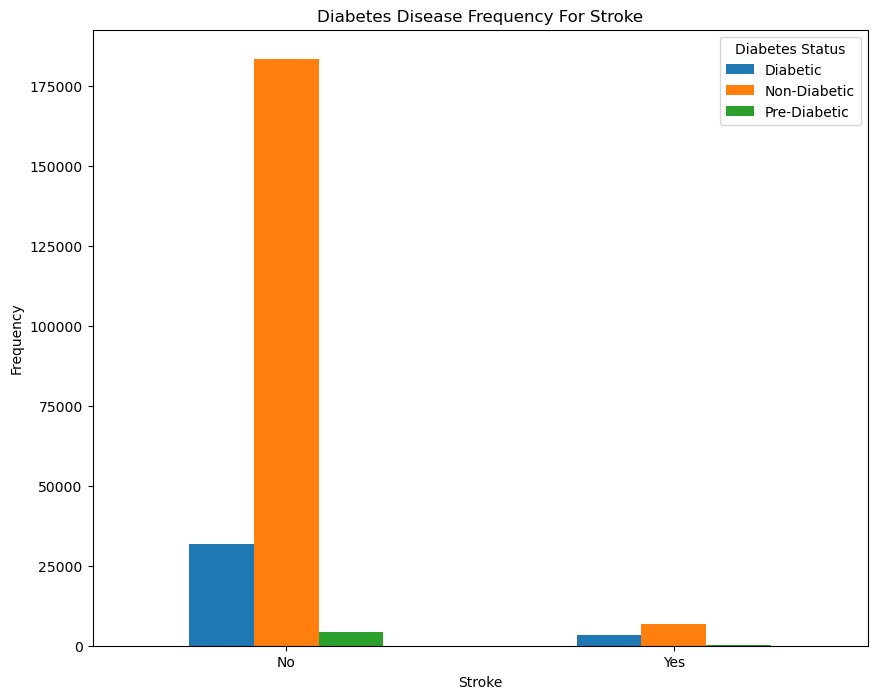

In [77]:
# Bar Chart For Stroke
pd.crosstab(Diabetes_Categorical_Data.Stroke,Diabetes_Categorical_Data.Diabetes_Category).plot(kind="bar",figsize=(10,8))

plt.xticks(rotation=0)
plt.title('Diabetes Disease Frequency For Stroke')
plt.xlabel("Stroke")
plt.ylabel('Frequency')
plt.legend(title = 'Diabetes Status')

# Save Fig
plt.savefig('C:/Users/ammar/OneDrive/Desktop/ESSEX/Dissertation/graphs/Diabetes Disease Frequency For Stroke.png')

# show()
plt.show()

#### HeartDiseaseorAttack: Heart Disease Or Attack

In [78]:
# HeartDiseaseorAttack vs Diabetes Category
pd.crosstab(Diabetes_Categorical_Data.HeartDiseaseorAttack, Diabetes_Categorical_Data.Diabetes_Category)

Diabetes_Category     Diabetic  Non-Diabetic  Pre-Diabetic
HeartDiseaseorAttack                                      
No                       27241        174858          3965
Yes                       7856         15197           664

In [79]:
# HeartDiseaseorAttack Distribution
X = diabetes_data.groupby("Diabetes_Category")["HeartDiseaseorAttack"].value_counts()
Y = diabetes_data.groupby("Diabetes_Category")["HeartDiseaseorAttack"].count()

Diabetes_vs_HeartDiseaseorAttack = (X/Y)*100

#Print
print(Diabetes_vs_HeartDiseaseorAttack)

Diabetes_Category  HeartDiseaseorAttack
Diabetic           0                       77.616320
                   1                       22.383680
Non-Diabetic       0                       92.003894
                   1                        7.996106
Pre-Diabetic       0                       85.655649
                   1                       14.344351
Name: HeartDiseaseorAttack, dtype: float64


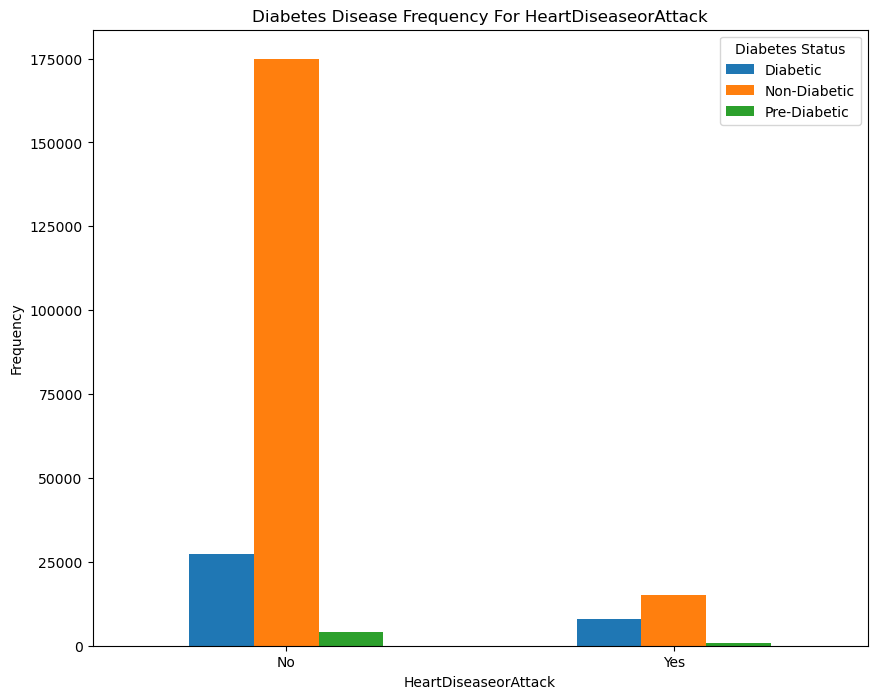

In [80]:
# Bar Chart For HeartDiseaseorAttack
pd.crosstab(Diabetes_Categorical_Data.HeartDiseaseorAttack,Diabetes_Categorical_Data.Diabetes_Category).plot(kind="bar",figsize=(10,8))

# plot
plt.xticks(rotation=0)
plt.title('Diabetes Disease Frequency For HeartDiseaseorAttack')
plt.xlabel("HeartDiseaseorAttack")
plt.ylabel('Frequency')
plt.legend(title = 'Diabetes Status')

# Save Fig
plt.savefig('C:/Users/ammar/OneDrive/Desktop/ESSEX/Dissertation/graphs/Diabetes Disease Frequency For HeartDiseaseorAttack.png')

# show()
plt.show()

#### PhysActivity: Physical Activity

In [81]:
# Physical Activity vs Diabetes Category
pd.crosstab(Diabetes_Categorical_Data.PhysActivity, Diabetes_Categorical_Data.Diabetes_Category)

Diabetes_Category  Diabetic  Non-Diabetic  Pre-Diabetic
PhysActivity                                           
No                    13038         46743          1489
Yes                   22059        143312          3140

In [82]:
# PhysActivity distribution
X = diabetes_data.groupby("Diabetes_Category")["PhysActivity"].value_counts()
Y = diabetes_data.groupby("Diabetes_Category")["PhysActivity"].count()

Diabetes_vs_PhysActivity = (X/Y)*100

# Print
print(Diabetes_vs_PhysActivity)

Diabetes_Category  PhysActivity
Diabetic           1               62.851526
                   0               37.148474
Non-Diabetic       1               75.405541
                   0               24.594459
Pre-Diabetic       1               67.833225
                   0               32.166775
Name: PhysActivity, dtype: float64


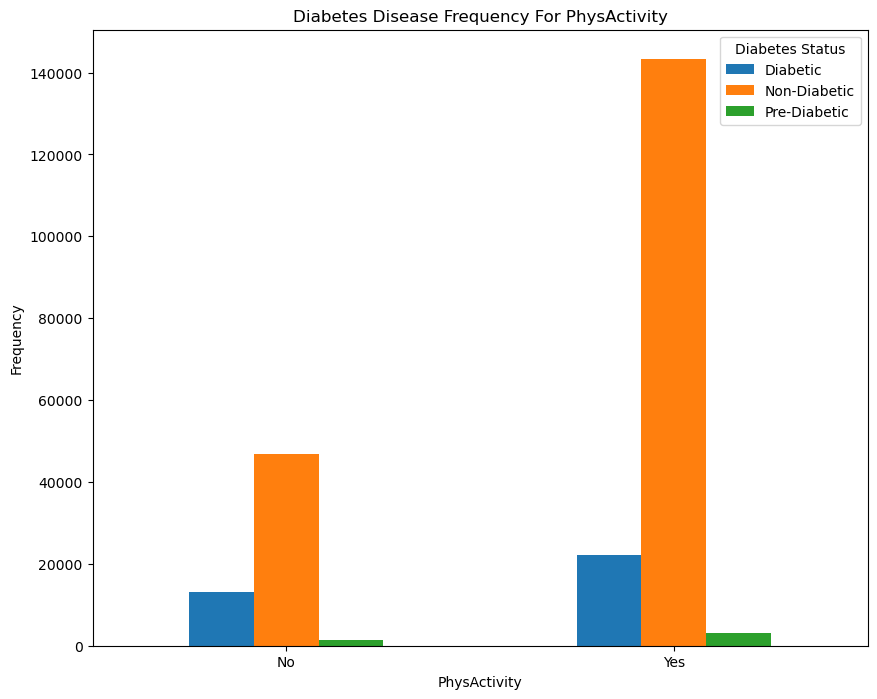

In [83]:
# Bar Chart For Physical Activity
pd.crosstab(Diabetes_Categorical_Data.PhysActivity,Diabetes_Categorical_Data.Diabetes_Category).plot(kind="bar",figsize=(10,8))

plt.xticks(rotation=0)
plt.title('Diabetes Disease Frequency For PhysActivity')
plt.xlabel("PhysActivity")
plt.ylabel('Frequency')
plt.legend(title = 'Diabetes Status')

# Save Fig
plt.savefig('C:/Users/ammar/OneDrive/Desktop/ESSEX/Dissertation/graphs/Diabetes Disease Frequency For PhysActivity.png')

# show()
plt.show()

#### Fruits Intake

In [84]:
# Fruits Intake vs Diabetes Category
pd.crosstab(Diabetes_Categorical_Data.Fruits, Diabetes_Categorical_Data.Diabetes_Category)

Diabetes_Category  Diabetic  Non-Diabetic  Pre-Diabetic
Fruits                                                 
No                    14592         72501          1840
Yes                   20505        117554          2789

In [85]:
# Fruits Intake distribution
X = diabetes_data.groupby("Diabetes_Category")["Fruits"].value_counts()
Y = diabetes_data.groupby("Diabetes_Category")["Fruits"].count()

Diabetes_vs_Fruits = (X/Y)*100

# Print
print(Diabetes_vs_Fruits)

Diabetes_Category  Fruits
Diabetic           1         58.423797
                   0         41.576203
Non-Diabetic       1         61.852622
                   0         38.147378
Pre-Diabetic       1         60.250594
                   0         39.749406
Name: Fruits, dtype: float64


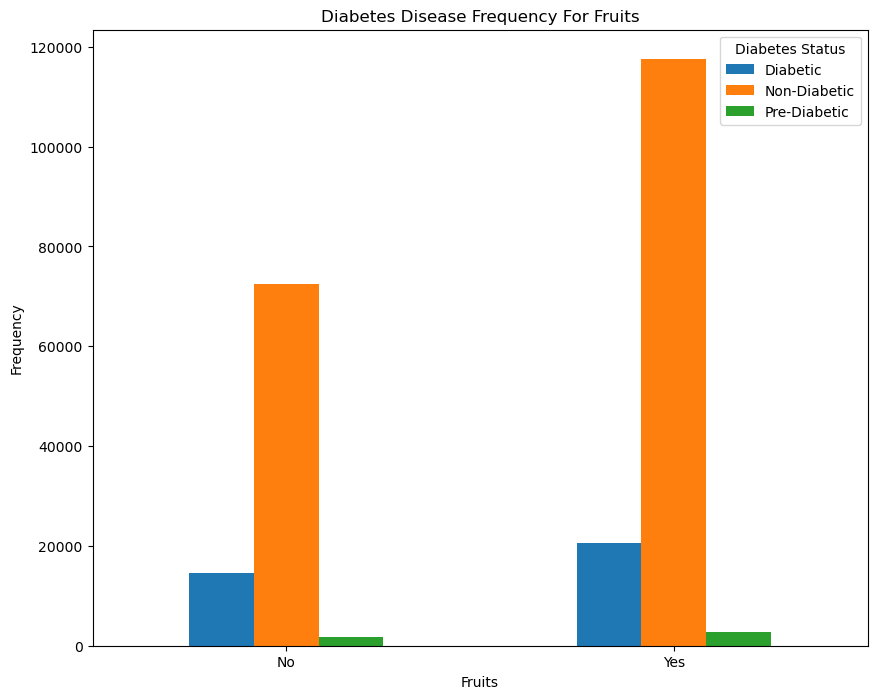

In [86]:
# Bar Chart For Fruits
pd.crosstab(Diabetes_Categorical_Data.Fruits,Diabetes_Categorical_Data.Diabetes_Category).plot(kind="bar",figsize=(10,8))

plt.xticks(rotation=0)
plt.title('Diabetes Disease Frequency For Fruits')
plt.xlabel("Fruits")
plt.ylabel('Frequency')
plt.legend(title = 'Diabetes Status')

# Save Fig
plt.savefig('C:/Users/ammar/OneDrive/Desktop/ESSEX/Dissertation/graphs/Diabetes Disease Frequency For Fruits.png')

# show()
plt.show()

#### Veggies Intake

In [87]:
# Veggies Intake vs Diabetes Category
pd.crosstab(Diabetes_Categorical_Data.Veggies, Diabetes_Categorical_Data.Diabetes_Category)

Diabetes_Category  Diabetic  Non-Diabetic  Pre-Diabetic
Veggies                                                
No                     8602         37476          1070
Yes                   26495        152579          3559

In [88]:
# Veggies Intake distribution
X = diabetes_data.groupby("Diabetes_Category")["Veggies"].value_counts()
Y = diabetes_data.groupby("Diabetes_Category")["Veggies"].count()

Diabetes_vs_Veggies = (X/Y)*100

# Print
print(Diabetes_vs_Veggies)

Diabetes_Category  Veggies
Diabetic           1          75.490783
                   0          24.509217
Non-Diabetic       1          80.281497
                   0          19.718503
Pre-Diabetic       1          76.884856
                   0          23.115144
Name: Veggies, dtype: float64


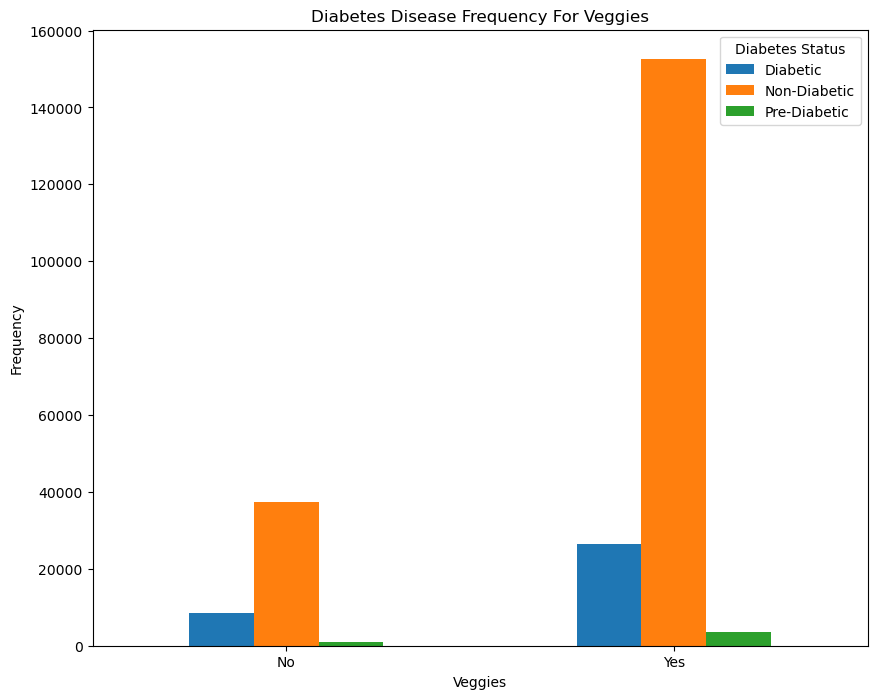

In [89]:
# Bar Chart For Veggies
pd.crosstab(Diabetes_Categorical_Data.Veggies,Diabetes_Categorical_Data.Diabetes_Category).plot(kind="bar",figsize=(10,8))

plt.xticks(rotation=0)
plt.title('Diabetes Disease Frequency For Veggies')
plt.xlabel("Veggies")
plt.ylabel('Frequency')
plt.legend(title = 'Diabetes Status')

# Save Fig
plt.savefig('C:/Users/ammar/OneDrive/Desktop/ESSEX/Dissertation/graphs/Diabetes Disease Frequency For Veggies.png')

# show()
plt.show()

### Healthcare : AnyHealthcare and NoDocbcCost's Effect On Target Variable

In [90]:
# NoDocbcCost vs Diabetes Category
pd.crosstab(diabetes_data.NoDocbcCost, diabetes_data.Diabetes_Category)

Diabetes_Category  Diabetic  Non-Diabetic  Pre-Diabetic
NoDocbcCost                                            
0                     31355        173070          4030
1                      3742         16985           599

In [91]:
# NoDocbcCost distribution
X = diabetes_data.groupby("Diabetes_Category")["NoDocbcCost"].value_counts()
Y = diabetes_data.groupby("Diabetes_Category")["NoDocbcCost"].count()

Diabetes_vs_NoDocbcCost = (X/Y)*100

# Print
print(Diabetes_vs_NoDocbcCost)

Diabetes_Category  NoDocbcCost
Diabetic           0              89.338120
                   1              10.661880
Non-Diabetic       0              91.063113
                   1               8.936887
Pre-Diabetic       0              87.059840
                   1              12.940160
Name: NoDocbcCost, dtype: float64


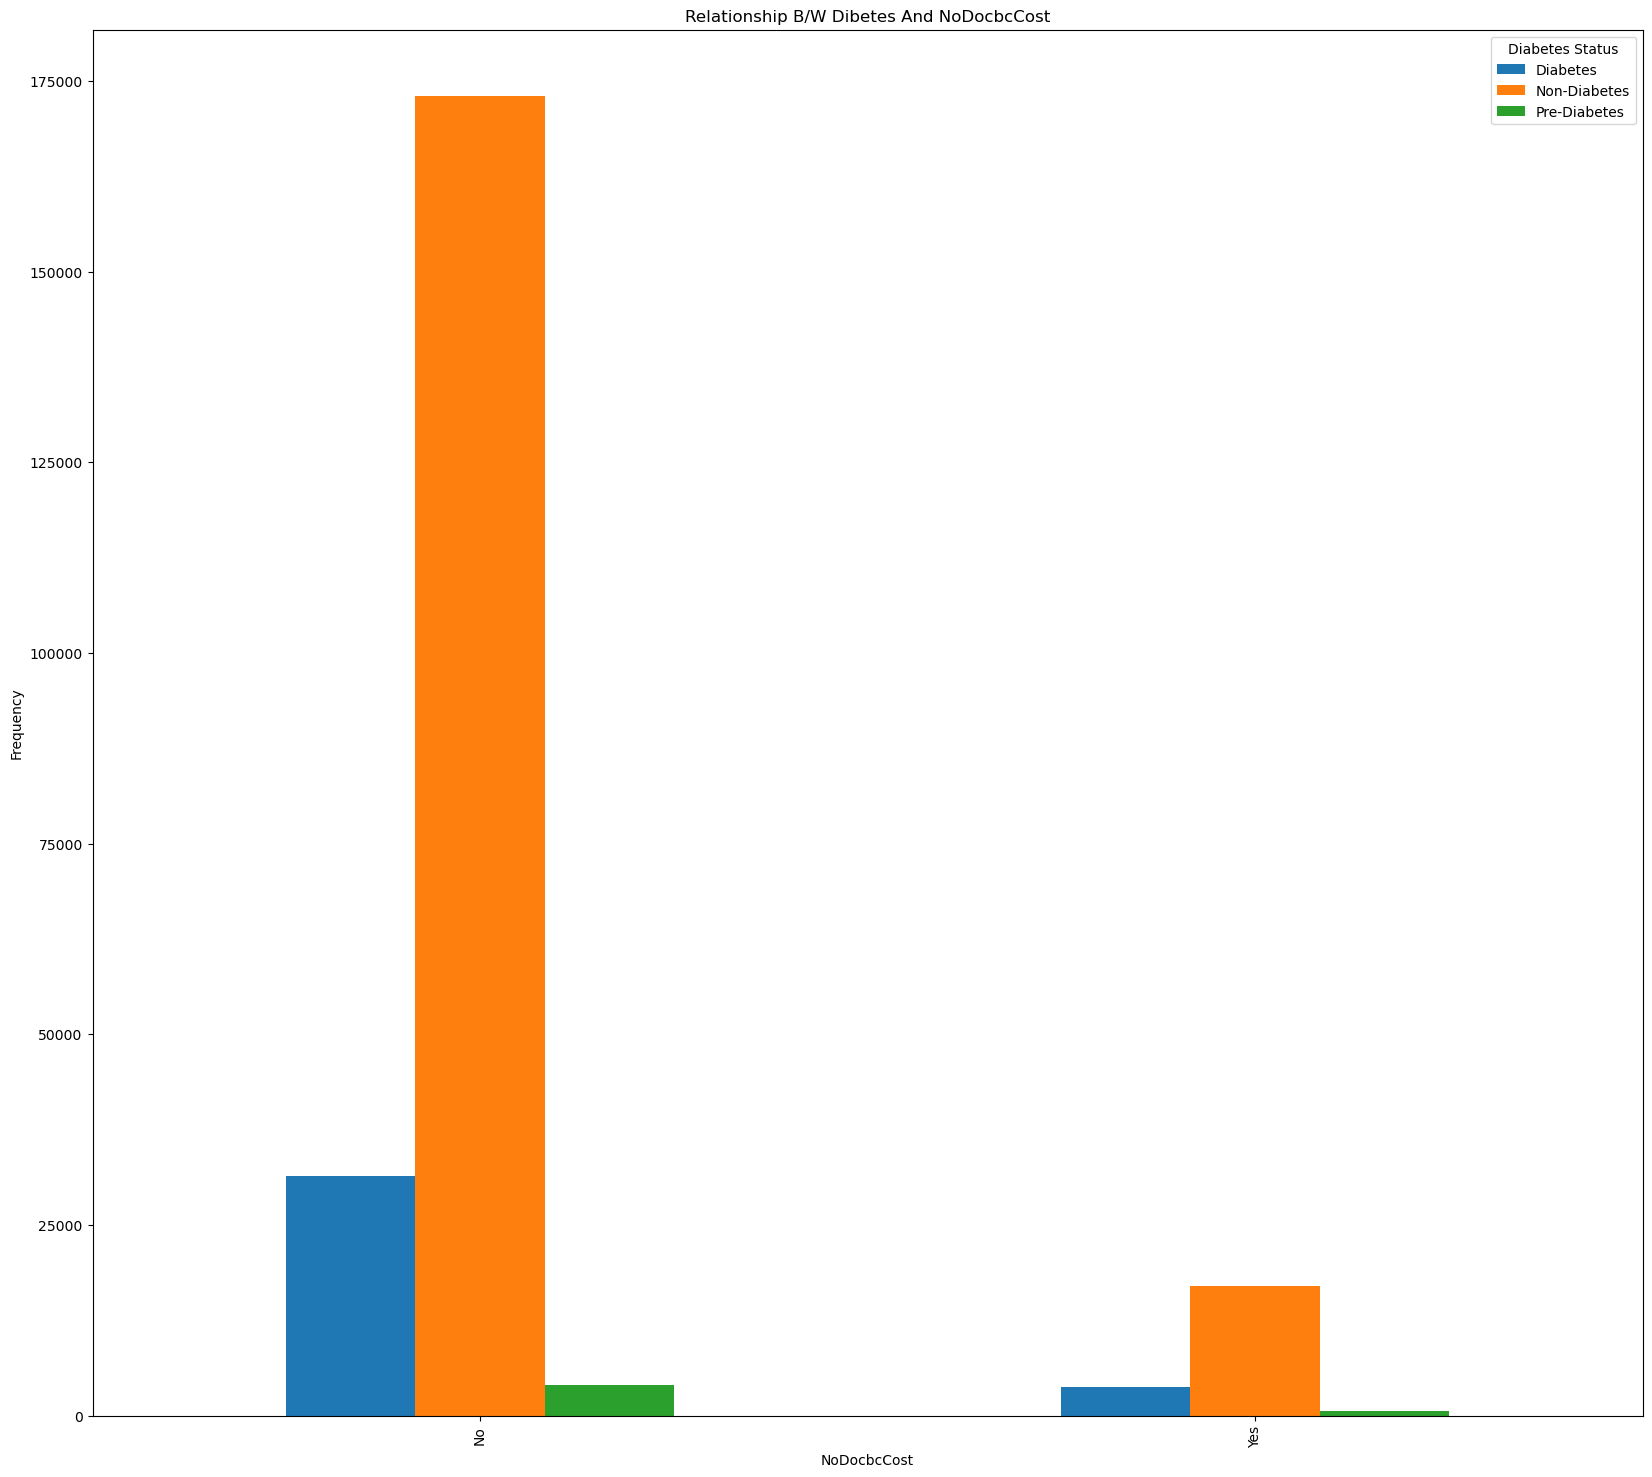

In [92]:
# Relationship between NoDocbcCost and Diabetes
pd.crosstab (Diabetes_Categorical_Data.NoDocbcCost,Diabetes_Categorical_Data.Diabetes).plot(kind = "bar", figsize = (20,18))

# Labels
plt.title('Relationship B/W Dibetes And NoDocbcCost')
plt.xlabel("NoDocbcCost")
plt.ylabel("Frequency")
plt.legend(title = "Diabetes Status")

# save
plt.savefig('C:/Users/ammar/OneDrive/Desktop/ESSEX/Dissertation/graphs/Relationship Between Dibetes And NoDocbcCost.png')

# show
plt.show()

In [93]:
# AnyHealthcare vs Diabetes Category
pd.crosstab(Diabetes_Categorical_Data.AnyHealthcare, Diabetes_Categorical_Data.Diabetes_Category)

Diabetes_Category  Diabetic  Non-Diabetic  Pre-Diabetic
AnyHealthcare                                          
No                     1422         10715           254
Yes                   33675        179340          4375

In [94]:
#AnyHealthcare distribution
X = Diabetes_Categorical_Data.groupby("Diabetes_Category")["AnyHealthcare"].value_counts()
Y = Diabetes_Categorical_Data.groupby("Diabetes_Category")["AnyHealthcare"].count()

Diabetes_vs_AnyHealthcare = (X/Y)*100

# Print
print(Diabetes_vs_AnyHealthcare)

Diabetes_Category  AnyHealthcare
Diabetic           Yes              95.948372
                   No                4.051628
Non-Diabetic       Yes              94.362158
                   No                5.637842
Pre-Diabetic       Yes              94.512854
                   No                5.487146
Name: AnyHealthcare, dtype: float64


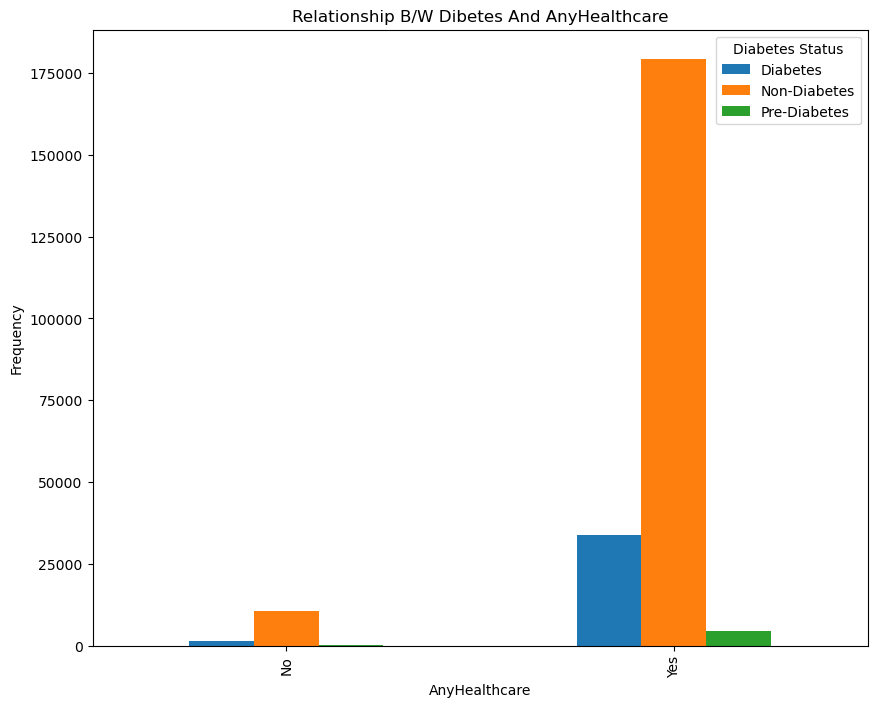

In [95]:
# Relationship between AnyHealthcare and Diabetes
pd.crosstab (Diabetes_Categorical_Data.AnyHealthcare,Diabetes_Categorical_Data.Diabetes).plot(kind = "bar", figsize = (10,8))

# Labels
plt.title('Relationship B/W Dibetes And AnyHealthcare')
plt.xlabel("AnyHealthcare")
plt.ylabel("Frequency")
plt.legend(title = "Diabetes Status")

# Save
plt.savefig('C:/Users/ammar/OneDrive/Desktop/ESSEX/Dissertation/graphs/Relationship Between Dibetes And AnyHealthcare.png')

# Show
plt.show()

### Health Conditions: MentHlth, PhysHlth, GenHlth, DiffWalk's Effect On Diabetes

#### GenHlth

In [96]:
# GenHlth vs Diabetes Category
pd.crosstab(Diabetes_Categorical_Data.GenHlth, Diabetes_Categorical_Data.Diabetes_Category).T

GenHlth            Excellent Health  Fair Health  Good Health  Poor Health  \
Diabetes_Category                                                            
Diabetic                       4577         6280        13324         1135   
Non-Diabetic                   7150        70044        58662        33459   
Pre-Diabetic                    351         1212         1728          313   

GenHlth            Very Good Health  
Diabetes_Category                    
Diabetic                       9781  
Non-Diabetic                  20740  
Pre-Diabetic                   1025

In [97]:
#GenHlth distribution
X = Diabetes_Categorical_Data.groupby("Diabetes_Category")["GenHlth"].value_counts()
Y = Diabetes_Categorical_Data.groupby("Diabetes_Category")["GenHlth"].count()

Diabetes_vs_GenHlth = (X/Y)*100

# Print
print(Diabetes_vs_GenHlth)

Diabetes_Category  GenHlth         
Diabetic           Good Health         37.963359
                   Very Good Health    27.868479
                   Fair Health         17.893267
                   Excellent Health    13.041001
                   Poor Health          3.233895
Non-Diabetic       Fair Health         36.854595
                   Good Health         30.865802
                   Poor Health         17.604904
                   Very Good Health    10.912631
                   Excellent Health     3.762069
Pre-Diabetic       Good Health         37.329877
                   Fair Health         26.182761
                   Very Good Health    22.143011
                   Excellent Health     7.582631
                   Poor Health          6.761720
Name: GenHlth, dtype: float64


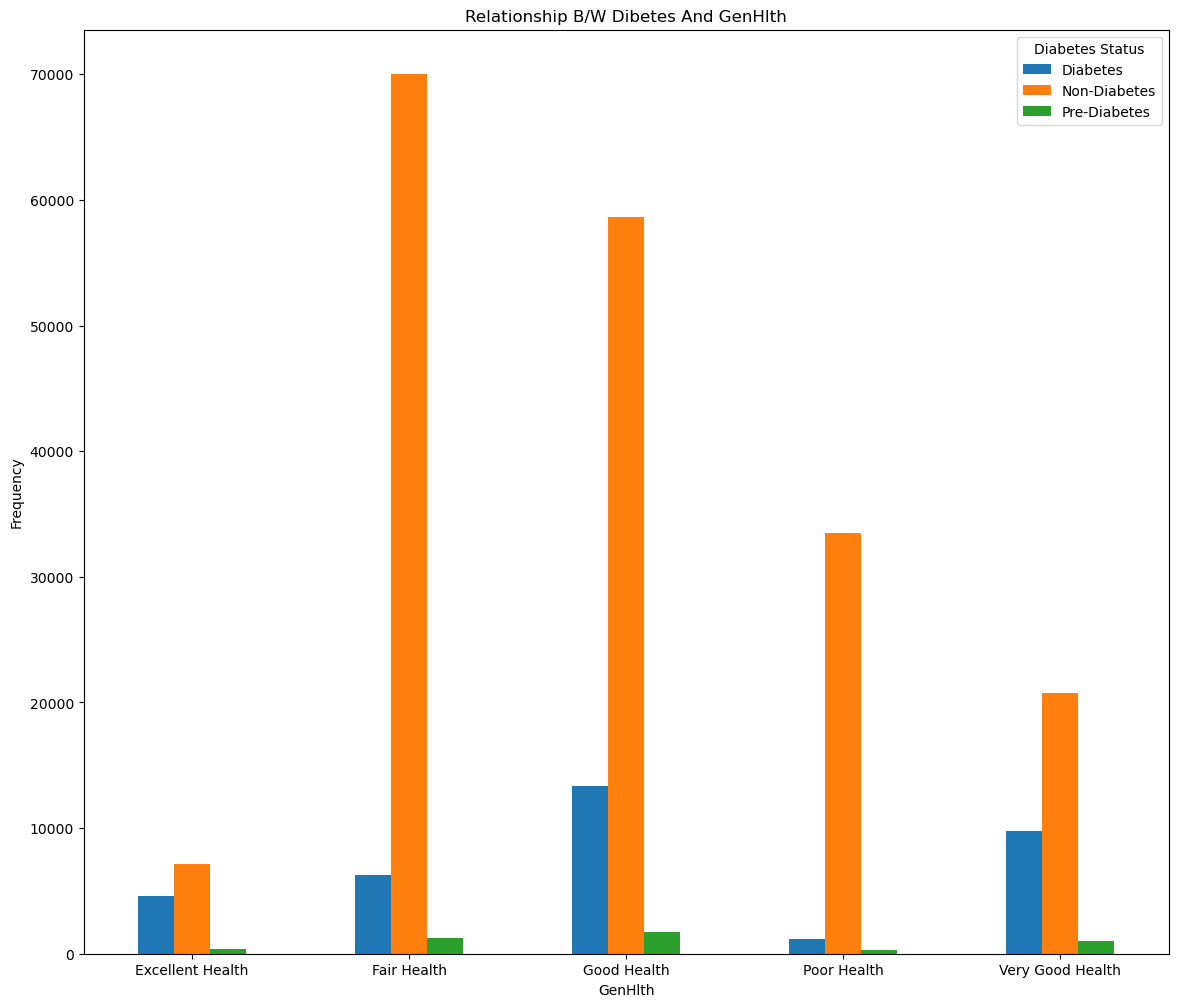

In [98]:
# Relationship between GenHlth and Diabetes
pd.crosstab (Diabetes_Categorical_Data.GenHlth,Diabetes_Categorical_Data.Diabetes).plot(kind = "bar", figsize = (14,12))

# labels
plt.title('Relationship B/W Dibetes And GenHlth')
plt.xlabel("GenHlth")
plt.ylabel("Frequency")
plt.legend(title = 'Diabetes Status')
plt.xticks(rotation = 0)

# Save
plt.savefig('C:/Users/ammar/OneDrive/Desktop/ESSEX/Dissertation/graphs/Relationship Between Dibetes And General Health.png')

# Show
plt.show()

In [100]:
# Treemap
ax = px.treemap(Diabetes_Categorical_Data,path=['GenHlth'],title = "GenHlth Mapping")

# show
ax.show()

It shows that individuals with good health are also having diabetes.

#### MentHlth 

In [101]:
#MentHlth vs Diabetes
pd.crosstab(Diabetes_Categorical_Data.MentHlth,Diabetes_Categorical_Data.Diabetes).T

MentHlth          0     1      2     3     4     5    6     7    8   9   ...  \
Diabetes                                                                 ...   
Diabetes       23155   812   1507   924   489  1223  164   405  110  13  ...   
Non-Diabetes  126514  7377  10959  6253  3202  7509  796  2622  516  69  ...   
Pre-Diabetes    2954   120    231   125    83   181   28    63   13   9  ...   

MentHlth       21  22  23  24   25  26  27   28   29    30  
Diabetes                                                    
Diabetes       48  11   8   6  273   7  12   57   30  2768  
Non-Diabetes  170  50  28  25  882  35  66  263  125  8951  
Pre-Diabetes    9   2   2   2   33   3   1    7    3   361  

[3 rows x 31 columns]

In [102]:
# Treemap
ax = px.treemap(Diabetes_Categorical_Data,path=['MentHlth'],title = "MentHlth Mapping")

# Show
ax.show()

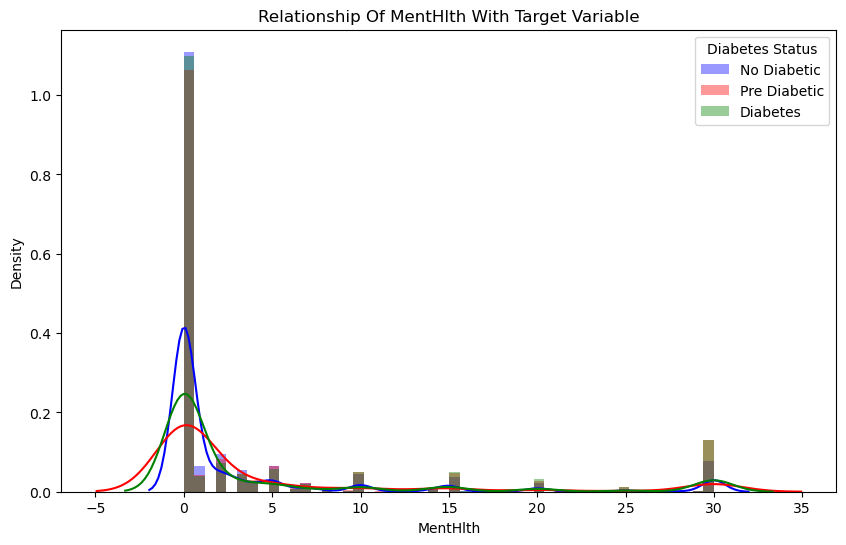

In [103]:
# Figure
plt.figure(figsize=(10,6))

# plot
sns.distplot(diabetes_data.MentHlth[diabetes_data.Diabetes == 0], color = "b", label="No Diabetic")
sns.distplot(diabetes_data.MentHlth[diabetes_data.Diabetes == 1], color = "r", label ="Pre Diabetic" )
sns.distplot(diabetes_data.MentHlth[diabetes_data.Diabetes == 2], color = "g", label = "Diabetes")

#label
plt.title("Relationship Of MentHlth With Target Variable")
plt.legend(title = "Diabetes Status")

# Save
plt.savefig('C:/Users/ammar/OneDrive/Desktop/ESSEX/Dissertation/graphs/Relationship Of MentHlth With Target Variable.png')


# Show
plt.show()

Individuals with **MentHlth** issues between 0 - 5 days have an impact on diabetes

#### PhysHlth

In [104]:
#PhysHlth vs Diabetes
pd.crosstab(Diabetes_Categorical_Data.PhysHlth,Diabetes_Categorical_Data.Diabetes).T

PhysHlth          0     1      2     3     4     5     6     7    8    9   \
Diabetes                                                                    
Diabetes       16497  1187   2027  1289   763  1314   282   742  159   36   
Non-Diabetes  117911  9713  12220  6973  3660  6115  1008  3699  629  138   
Pre-Diabetes    2469   174    248   173    98   168    38    90   21    5   

PhysHlth      ...   21  22  23  24   25  26  27   28   29     30  
Diabetes      ...                                                 
Diabetes      ...  139  23  16  15  394  22  21  143   74   5724  
Non-Diabetes  ...  506  43  37  54  906  43  75  363  134  13104  
Pre-Diabetes  ...   18   4   3   3   36   4   3   16    7    558  

[3 rows x 31 columns]

In [105]:
#PhysHlth values 
ax= px.treemap(diabetes_data,path=['PhysHlth'],title="PhysHlth Mapping")

# Show
ax.show()

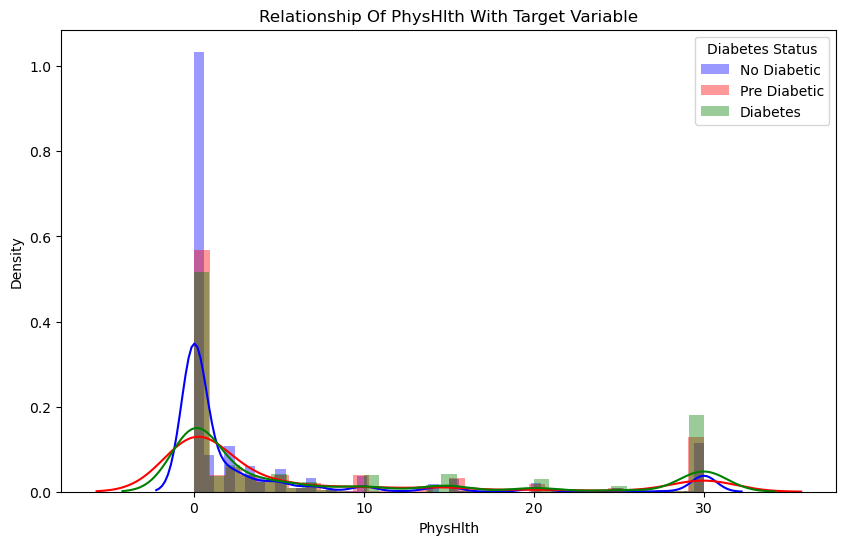

In [126]:
# Figure
plt.figure(figsize=(10,6))

# plot
sns.distplot(diabetes_data.PhysHlth[diabetes_data.Diabetes == 0], color = "b", label="No Diabetic")
sns.distplot(diabetes_data.PhysHlth[diabetes_data.Diabetes == 1], color = "r", label ="Pre Diabetic" )
sns.distplot(diabetes_data.PhysHlth[diabetes_data.Diabetes == 2], color = "g", label = "Diabetes")

#label
plt.title("Relationship Of PhysHlth With Target Variable")
plt.legend(title = "Diabetes Status")

# Save
plt.savefig('C:/Users/ammar/OneDrive/Desktop/ESSEX/Dissertation/graphs/Relationship Of PhysHlth With Target Variable.png')


# Show
plt.show()

It demonstrates the relationship between physical health shows some intriguing patterns. Individuals having little or no physical health issues less than 5 days are classified as more diabetic. Also those individuals who experience physical health issues for almost 30 days also showed significant prevalence of diabetes.

#### DiffWalk

In [106]:
#Diffwalk vs Diabetes

pd.crosstab(Diabetes_Categorical_Data.DiffWalk,Diabetes_Categorical_Data.Diabetes)

Diabetes  Diabetes  Non-Diabetes  Pre-Diabetes
DiffWalk                                      
No           21983        161828          3344
Yes          13114         28227          1285

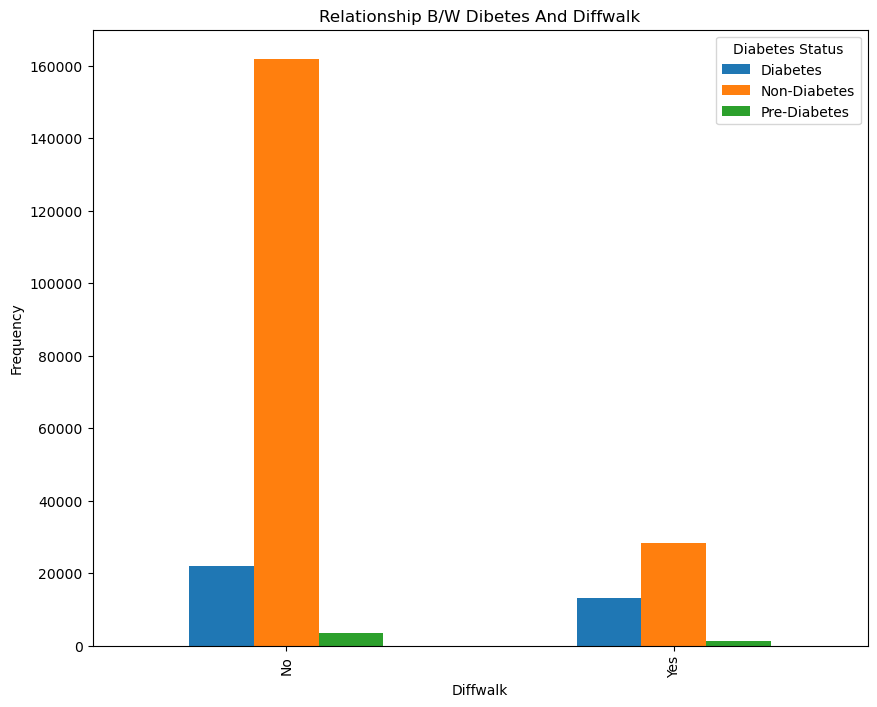

In [107]:
# Relationship between Diffwalk and Diabetes
pd.crosstab (Diabetes_Categorical_Data.DiffWalk,Diabetes_Categorical_Data.Diabetes).plot(kind = "bar", figsize = (10,8))

# label 
plt.title('Relationship B/W Dibetes And Diffwalk')
plt.xlabel("Diffwalk")
plt.ylabel("Frequency")
plt.legend(title = "Diabetes Status")

# Save
plt.savefig('C:/Users/ammar/OneDrive/Desktop/ESSEX/Dissertation/graphs/Relationship Between Dibetes And Diffwalk.png')

# Show
plt.show()

### Demographics: Sex, Age, Education, And Income Effect On Diabetes

#### Sex

In [108]:
# Sex Vs Diabetes
pd.crosstab(Diabetes_Categorical_Data.Sex, Diabetes_Categorical_Data.Diabetes)

Diabetes  Diabetes  Non-Diabetes  Pre-Diabetes
Sex                                           
Female       18345        107905          2604
Male         16752         82150          2025

In [109]:
# Sex distribution
X = Diabetes_Categorical_Data.groupby("Diabetes_Category")["Sex"].value_counts()
Y = Diabetes_Categorical_Data.groupby("Diabetes_Category")["Sex"].count()

Diabetes_vs_Sex = (X/Y)*100

# Print
print(Diabetes_vs_Sex)

Diabetes_Category  Sex   
Diabetic           Female    52.269425
                   Male      47.730575
Non-Diabetic       Female    56.775670
                   Male      43.224330
Pre-Diabetic       Female    56.254051
                   Male      43.745949
Name: Sex, dtype: float64


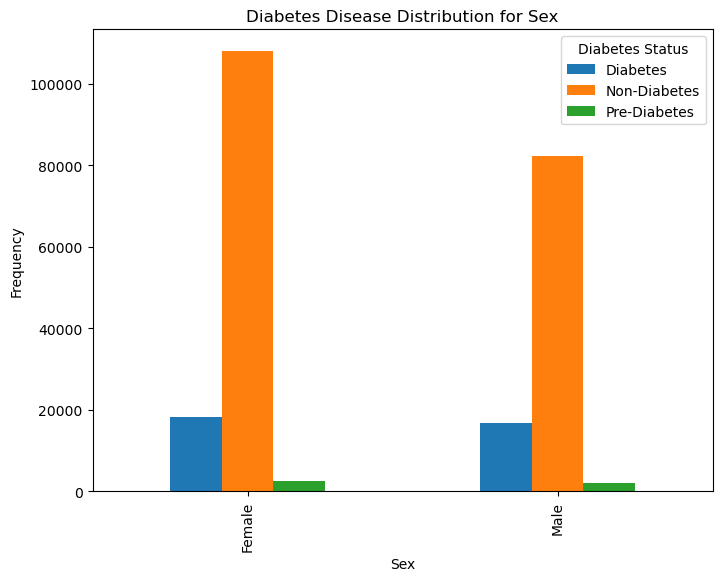

In [110]:
# Relation B/W Sex and Diabetes

# plot
pd.crosstab(Diabetes_Categorical_Data.Sex,Diabetes_Categorical_Data.Diabetes).plot(kind="bar",figsize=(8,6))

# label
plt.title('Diabetes Disease Distribution for Sex')
plt.xlabel("Sex")
plt.ylabel('Frequency')
plt.legend(title = "Diabetes Status")

# Save
plt.savefig('C:/Users/ammar/OneDrive/Desktop/ESSEX/Dissertation/graphs/Diabetes Disease Distribution For Sex.png')

# Show
plt.show()

#### Age

In [111]:
# age vs diabetes
pd.crosstab(Diabetes_Categorical_Data.Age,Diabetes_Categorical_Data.Diabetes)

Diabetes     Diabetes  Non-Diabetes  Pre-Diabetes
Age                                              
18 to 24           78          5413            21
25 to 29          140          6874            54
30 to 34          314          9639            72
35 to 39          625         11467           142
40 to 44         1049         12838           163
45 to 49         1741         15246           312
50 to 54         3072         19650           418
55 to 59         4241         22510           550
60 to 64         5681         23353           702
65 to 69         6483         21988           697
70 to 74         5090         16350           601
75 to 79         3383         11566           445
80 or older      3200         13161           452

In [112]:
# Age distribution
X = Diabetes_Categorical_Data.groupby("Diabetes_Category")["Age"].value_counts()
Y = Diabetes_Categorical_Data.groupby("Diabetes_Category")["Age"].count()

Diabetes_vs_Age = (X/Y)*100

# Print
print(Diabetes_vs_Age)

Diabetes_Category  Age        
Diabetic           65 to 69       18.471664
                   60 to 64       16.186569
                   70 to 74       14.502664
                   55 to 59       12.083654
                   75 to 79        9.639000
                   80 or older     9.117588
                   50 to 54        8.752885
                   45 to 49        4.960538
                   40 to 44        2.988859
                   35 to 39        1.780779
                   30 to 34        0.894663
                   25 to 29        0.398894
                   18 to 24        0.222241
Non-Diabetic       60 to 64       12.287496
                   55 to 59       11.843940
                   65 to 69       11.569283
                   50 to 54       10.339112
                   70 to 74        8.602773
                   45 to 49        8.021888
                   80 or older     6.924838
                   40 to 44        6.754887
                   75 to 79        6.085607
 

In [113]:
# Age Mapping 
ax= px.treemap(Diabetes_Categorical_Data,path=['Age'],title="Age Mapping")

# Show
ax.show()

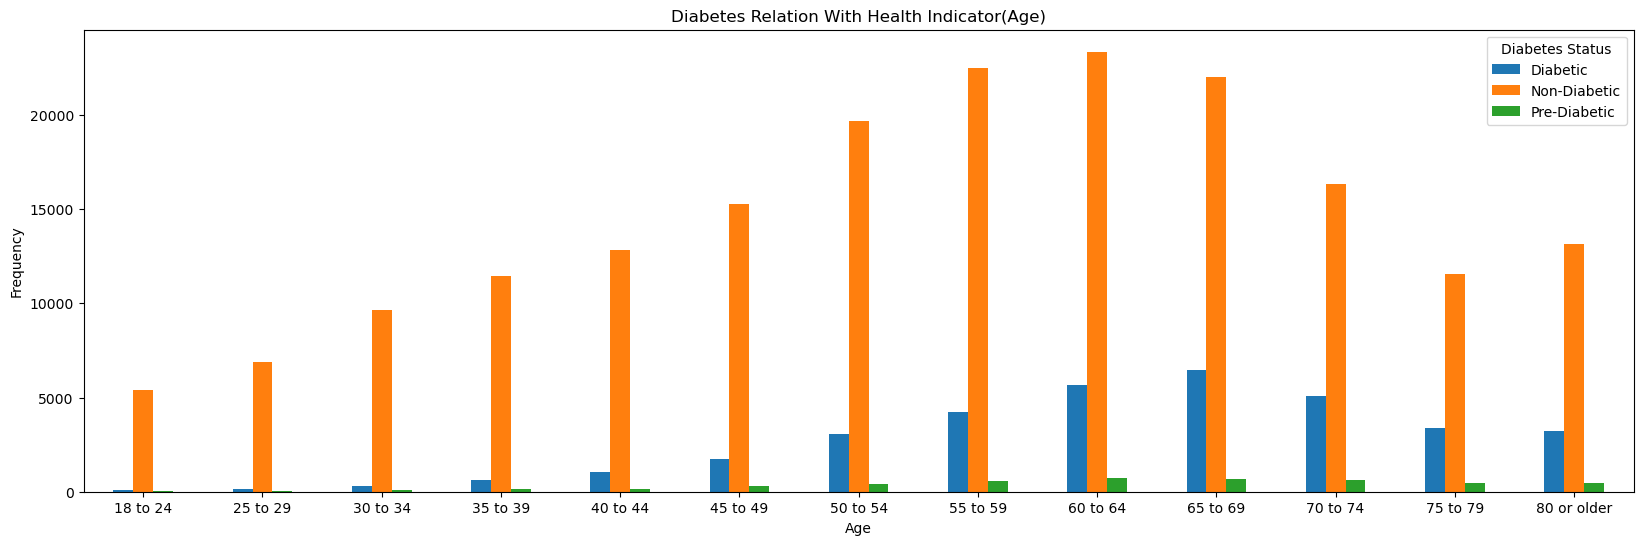

In [114]:
# plot
pd.crosstab(Diabetes_Categorical_Data.Age, Diabetes_Categorical_Data.Diabetes_Category).plot(kind= "bar", figsize =(20,6))

# Labels
plt.title ('Diabetes Relation With Health Indicator(Age)')
plt.xlabel('Age')
plt.xticks(rotation = 0)
plt.ylabel('Frequency')
plt.legend(title = 'Diabetes Status')

#save 
plt.savefig('C:/Users/ammar/OneDrive/Desktop/ESSEX/Dissertation/graphs/Diabetes Relation With Health Indicator(Age).png')

# Show
plt.show()

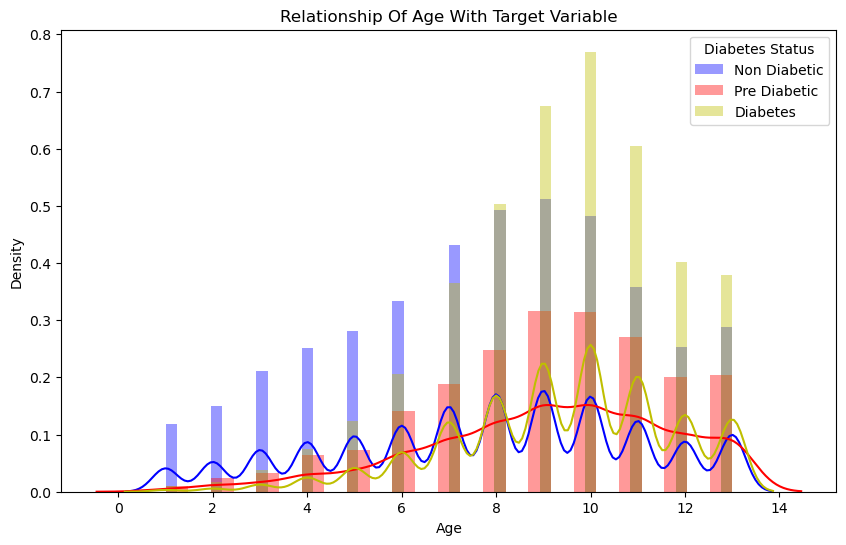

In [115]:
# figure size
plt.figure(figsize=(10,6))

# plot
sns.distplot(diabetes_data.Age[diabetes_data.Diabetes == 0], color = "b", label="Non Diabetic")
sns.distplot(diabetes_data.Age[diabetes_data.Diabetes == 1], color = "r", label ="Pre Diabetic" )
sns.distplot(diabetes_data.Age[diabetes_data.Diabetes == 2], color = "y", label = "Diabetes")

# label
plt.legend(title = "Diabetes Status")
plt.title("Relationship Of Age With Target Variable")

# Save
plt.savefig('C:/Users/ammar/OneDrive/Desktop/ESSEX/Dissertation/graphs/Relationship Of Age With Target Variable.png')

# Show
plt.show()

The following graph shows that diabetes commonly increases with the increase in age. Along with that pre-diabetes is also increases.

#### Education

In [116]:
# Eduaction vs diabetes

pd.crosstab(Diabetes_Categorical_Data.Education,Diabetes_Categorical_Data.Diabetes).T

Education     Elementary  Junior High School  Masters  Never Attended School  \
Diabetes                                                                       
Diabetes            1183                2296    10228                     47   
Non-Diabetes        2696                6857    76746                    125   
Pre-Diabetes         161                 314     1469                      2   

Education     Senior High School  Undergraduate Degree  
Diabetes                                                
Diabetes                   11032                 10311  
Non-Diabetes               48776                 54855  
Pre-Diabetes                1350                  1333

In [117]:
# Education Distribution
X = Diabetes_Categorical_Data.groupby("Diabetes_Category")["Education"].value_counts()
Y = Diabetes_Categorical_Data.groupby("Diabetes_Category")["Education"].count()

Diabetes_vs_Education = (X/Y)*100

# Print
print(Diabetes_vs_Education)

Diabetes_Category  Education            
Diabetic           Senior High School       31.432886
                   Undergraduate Degree     29.378579
                   Masters                  29.142092
                   Junior High School        6.541870
                   Elementary                3.370658
                   Never Attended School     0.133915
Non-Diabetic       Masters                  40.380942
                   Undergraduate Degree     28.862698
                   Senior High School       25.664150
                   Junior High School        3.607903
                   Elementary                1.418537
                   Never Attended School     0.065770
Pre-Diabetic       Masters                  31.734716
                   Senior High School       29.163966
                   Undergraduate Degree     28.796716
                   Junior High School        6.783323
                   Elementary                3.478073
                   Never Attended School 

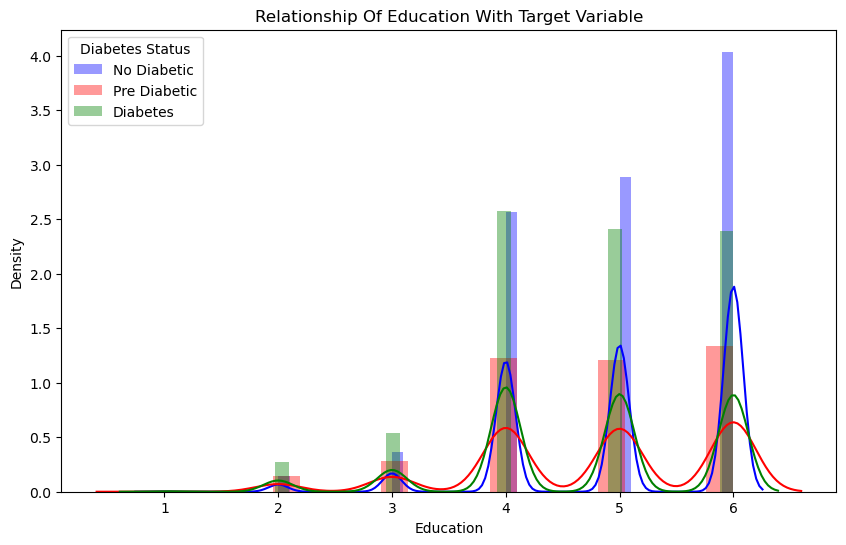

In [118]:
# figure size
plt.figure(figsize=(10,6))

#plot
sns.distplot(diabetes_data.Education[diabetes_data.Diabetes == 0], color = "b", label="No Diabetic")
sns.distplot(diabetes_data.Education[diabetes_data.Diabetes == 1], color = "r", label ="Pre Diabetic" )
sns.distplot(diabetes_data.Education[diabetes_data.Diabetes == 2], color = "g", label = "Diabetes")

# label
plt.title("Relationship Of Education With Target Variable")
plt.legend(title = 'Diabetes Status')

# Save
plt.savefig('C:/Users/ammar/OneDrive/Desktop/ESSEX/Dissertation/graphs/Relationship Of Education With Target Variable.png')

# Show
plt.show()


#### Income

In [119]:
# Income vs diabetes

pd.crosstab(Diabetes_Categorical_Data.Income,Diabetes_Categorical_Data.Diabetes).T

Income        $75,000 or More  Less Than $10,000  Less Than $25,000  \
Diabetes                                                              
Diabetes                 7042               2383               3086   
Non-Diabetes            63765               7095               8315   
Pre-Diabetes             1011                314                356   

Income        Less Than $35,000  Less Than $45,000  Less Than $55,000  \
Diabetes                                                                
Diabetes                   3564               4047               4489   
Non-Diabetes              11937              15451              20269   
Pre-Diabetes                421                459                587   

Income        Less Than $65,000  Less Than $75,000  
Diabetes                                            
Diabetes                   5260               5226  
Non-Diabetes              28995              34228  
Pre-Diabetes                746                735

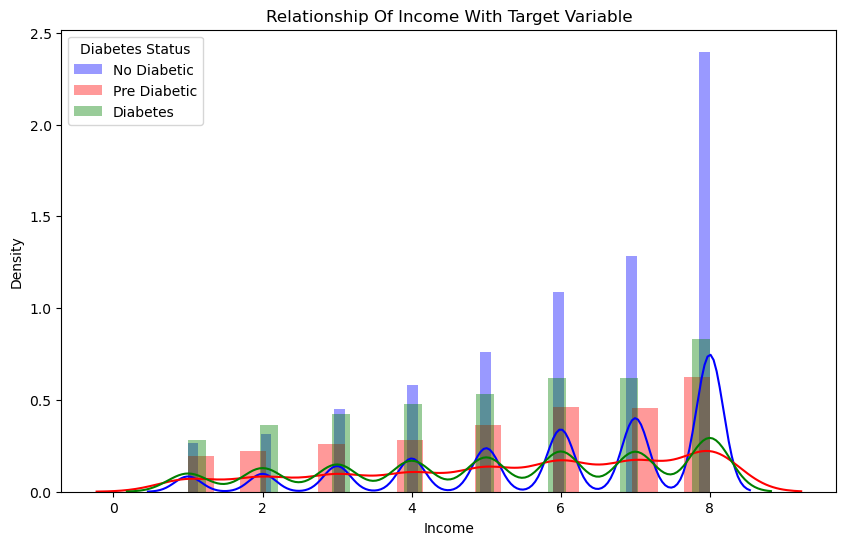

In [120]:
# figure size
plt.figure(figsize=(10,6))

# plot
sns.distplot(diabetes_data.Income[diabetes_data.Diabetes == 0], color = "b", label="No Diabetic")
sns.distplot(diabetes_data.Income[diabetes_data.Diabetes == 1], color = "r", label ="Pre Diabetic" )
sns.distplot(diabetes_data.Income[diabetes_data.Diabetes == 2], color = "g", label = "Diabetes")

# label
plt.title("Relationship Of Income With Target Variable")
plt.legend(title = 'Diabetes Status')

# save
plt.savefig('C:/Users/ammar/OneDrive/Desktop/ESSEX/Dissertation/graphs/Relationship Of Income With Target Variable.png')

# show
plt.show()

## Machine Learning Modeling

This is one of the critical process of this study for the prediction of diabetes. Several ML algorithms were implemented, including **Logistic Regression (LR)**, **Decision Tree (DT)**, **Support Vector Machine (SVM)**, **Naive Bayes (NB)**, **K-Nearest Neighbor (K-NN)**, **Extreme Gradient Boosting (XGBoost)**, **Artificial Neural Network (ANN)**, and **Random Forest (RF)**. 

**Feature Selection:** This to select the most significant features in the dataset that contributes to the prevalance of diabetes. 

**Feature Scaling:** To enhance the models performance, feature scaling takes place to normalise numerical features. 

**Class Imbalancing (SMOTE):** To address the class imbalance, Synthetic Minority Oversampling Technique (SMOTE) ensuring that the class imabalance not impact the model performance. 

**Model Training:** The dataset split into the train-test split 70:30. Training (70\%) and testing (30\%) subsets used for the traininig of **Logistic Regression (LR)**, **Decision Tree (DT)**, **Naive Bayes (NB)**, **K-Nearest Neighbor (K-NN)**, **Extreme Gradient Boosting (XGBoost)**, **Artificial Neural Network (ANN)**, and **Random Forest (RF)**. 80:20 split used for training of **Support Vector Machine (SVM)** model. 

### Drop Extra Columns For Modeling

In [121]:
# Drop the columns 
columns_to_drop = ['Diabetes_Binary', 'Diabetes_Binary_Category', 'Diabetes_Category'] 

diabetes_data = diabetes_data.drop(columns=columns_to_drop) 

# Display 
print(diabetes_data.head())

   Diabetes  HighBP  HighChol  CholCheck  BMI  Smoker  Stroke  \
0         0       1         1          1   40       1       0   
1         0       0         0          0   25       1       0   
2         0       1         1          1   28       0       0   
3         0       1         0          1   27       0       0   
4         0       1         1          1   24       0       0   

   HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
0                     0             0       0  ...              1   
1                     0             1       0  ...              0   
2                     0             0       1  ...              1   
3                     0             1       1  ...              1   
4                     0             1       1  ...              1   

   NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex  Age  Education  \
0            0        5        18        15         1    0    9          4   
1            1        3         0     

### Select Important Feature

In [122]:
X = diabetes_data.drop('Diabetes', axis=1)

y = diabetes_data['Diabetes']

In [123]:
X.columns

Index(['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke',
       'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [124]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()

rfe = RFE(model, n_features_to_select=10)
X_rfe = rfe.fit_transform(X, y)

# Get selected feature names
selected_columns = X.columns[rfe.support_]
print("Selected features:", selected_columns)


Selected features: Index(['HighBP', 'BMI', 'Smoker', 'Fruits', 'GenHlth', 'MentHlth', 'PhysHlth',
       'Age', 'Education', 'Income'],
      dtype='object')


### Display Selected Features

In [127]:
diabetes_data[selected_columns]

HighBP  BMI  Smoker  Fruits  GenHlth  MentHlth  PhysHlth  Age  \
0            1   40       1       0        5        18        15    9   
1            0   25       1       0        3         0         0    7   
2            1   28       0       1        5        30        30    9   
3            1   27       0       1        2         0         0   11   
4            1   24       0       1        2         3         0   11   
...        ...  ...     ...     ...      ...       ...       ...  ...   
253675       1   45       0       1        3         0         5    5   
253676       1   18       0       0        4         0         0   11   
253677       0   28       0       1        1         0         0    2   
253678       1   23       0       1        3         0         0    7   
253679       1   25       0       1        2         0         0    9   

        Education  Income  
0               4       3  
1               6       1  
2               4       8  
3               3       6  
4               5       4  
...           ...     ...  
253675          6       7  
253676          2       4  
253677          5       2  
253678          5       1  
253679          6       2  

[229781 rows x 10 columns]

### Seperating Feature And Target Variables

In [128]:
X = X[selected_columns]

In [129]:
X.columns

Index(['HighBP', 'BMI', 'Smoker', 'Fruits', 'GenHlth', 'MentHlth', 'PhysHlth',
       'Age', 'Education', 'Income'],
      dtype='object')

### Feature Scaling

In [130]:
from sklearn.preprocessing import MinMaxScaler

# HighBP	HighChol	CholCheck	Stroke	HeartDiseaseorAttack	PhysActivity	Veggies 	HvyAlcoholConsump	AnyHealthcare	NoDocbcCost 	 GenHlth	DiffWalk	Sex 	Age 	Education
scaler = MinMaxScaler()
X[['BMI', 'GenHlth', 'MentHlth', 'PhysHlth', 'Age', 'Income']] = scaler.fit_transform(X[['BMI', 'GenHlth', 'MentHlth', 'PhysHlth', 'Age', 'Income']])

In [131]:
y.value_counts()

0    190055
2     35097
1      4629
Name: Diabetes, dtype: int64

In [132]:
X = X[selected_columns]

y = diabetes_data['Diabetes']

### Handle Class Imbalance


In [133]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)


### Value Count After Class Balance

In [134]:
y_resampled.value_counts()

0    190055
2    190055
1    190055
Name: Diabetes, dtype: int64

### Train-Test Split

In [135]:
x_train,x_test,y_train,y_test = train_test_split(X_resampled,y_resampled,test_size=0.3,random_state=42)
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(399115, 10) (399115,)
(171050, 10) (171050,)


**70:30** train-test is used for seperating the dataset. **70%** used to train the model. Whereas, **30%** is used to test its performance. This split is used for logistic regression, random forest, k-nearest neighbor, decision tree, extreme gradient boosting, naive bayes, and artificial neural network classifier. 

**80:20** train-test is used for seperating the dataset. **80%** used to train the model. Whereas, **20%** is used to test its performance. This split is used for support vector machine (SVM) classifier. 

### Random Forest (RF)

In [148]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

RandomForestClassifier()

In [48]:
# Save the model to a file
with open('C:/Users/ammar/OneDrive/Desktop/ESSEX/Dissertation/Models/random_forest_model.pkl', 'wb') as f:
    pickle.dump(rf, f)


In [49]:
with open('C:/Users/ammar/OneDrive/Desktop/ESSEX/Dissertation/Models/random_forest_model.pkl', 'rb') as f:
    rf_model = pickle.load(f)


In [50]:
# Make predictions on the test set
y_pred = rf_model.predict(x_test)
y_pred_proba = rf_model.predict_proba(x_test)  # Predicted probabilities for ROC AUC

In [15]:

# Accuracy
rf_accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {rf_accuracy:.4f}")

# Log loss expects predicted probabilities, so we use predict_proba
rf_loss = log_loss(y_test, y_pred_proba)
print(f"Loss: {rf_loss:.4f}")

Accuracy: 0.8844
Loss: 0.4439


'macro': Calculates metrics for each class individually and then takes the average, treating all classes equally.

In [52]:
# Calculate precision, recall, and F1 score with average='macro'
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

# Print the results
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

Precision: 0.8840079711275742
Recall: 0.8842526575827557
F1 Score: 0.884020866848318


In [53]:
# Optionally, print a classification report for more metrics
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.88      0.87     56808
           1       0.94      0.95      0.94     57365
           2       0.85      0.83      0.84     56877

    accuracy                           0.88    171050
   macro avg       0.88      0.88      0.88    171050
weighted avg       0.88      0.88      0.88    171050



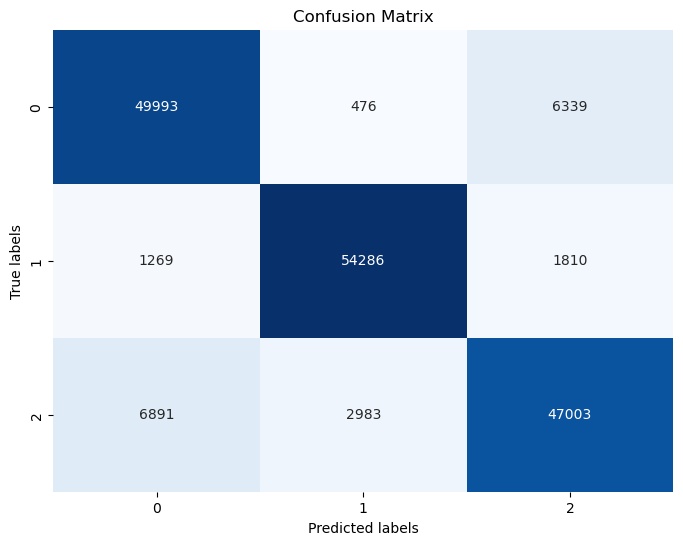

In [57]:
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=rf.classes_, yticklabels=rf.classes_, cbar=False)

# Add labels and title
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.savefig('C:/Users/ammar/OneDrive/Desktop/ESSEX/Dissertation/graphs/random_forest_confusion_matrix.jpg', bbox_inches='tight')  # Saves the plot

# Display the plot
plt.show()

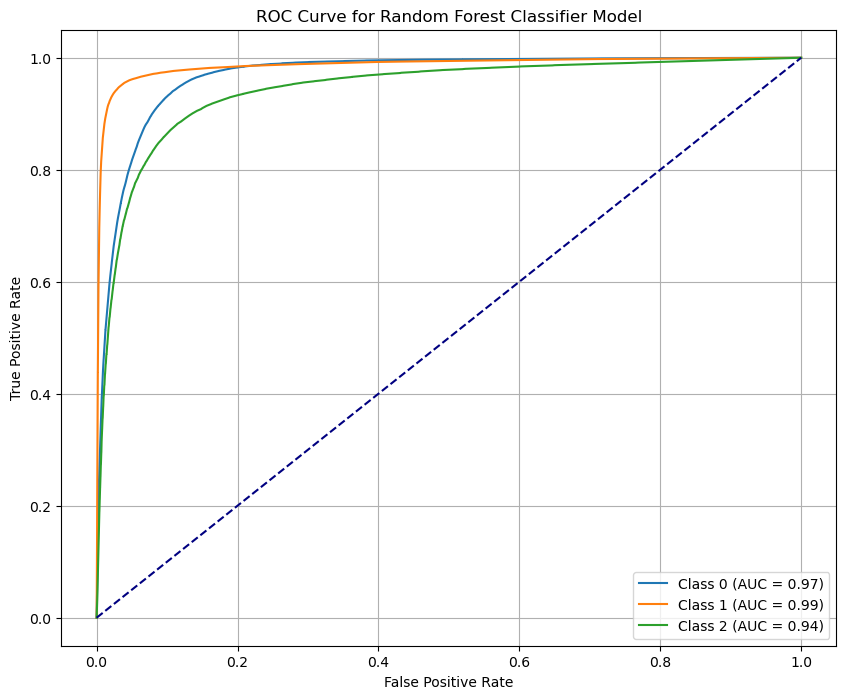

Individual AUC for each class: {0: 0.9683636814693612, 1: 0.9865757497976867, 2: 0.9424888629392434}
Average AUC: 0.9658


In [58]:
# Binarize the true labels for multi-class ROC AUC calculation
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))

# Initialize a figure for plotting ROC curves
plt.figure(figsize=(10, 8))

# Plot ROC curve for each class
fpr = {}
tpr = {}
roc_auc = {}
n_classes = y_test_bin.shape[1]  # Number of unique classes

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

    # Plot ROC curve for each class
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

# Plot the diagonal line (chance level)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')

# Set plot labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Random Forest Classifier Model')
plt.legend(loc="lower right")
plt.grid(True)
plt.savefig('C:/Users/ammar/OneDrive/Desktop/ESSEX/Dissertation/graphs/random_forest_roc.jpg', bbox_inches='tight')  # Saves the plot
plt.show()

# Compute average AUC (macro average)
average_auc = np.mean(list(roc_auc.values()))
print(f"Individual AUC for each class: {roc_auc}")
print(f"Average AUC: {average_auc:.4f}")

### Logistic Regression (LR)

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train, y_train)

In [60]:
# Save the model to a file
with open('C:/Users/ammar/OneDrive/Desktop/ESSEX/Dissertation/Models/logistic_regression_model.pkl', 'wb') as f:
    pickle.dump(lr, f)

In [61]:
with open('C:/Users/ammar/OneDrive/Desktop/ESSEX/Dissertation/Models/logistic_regression_model.pkl', 'rb') as f:
    lr_model = pickle.load(f)

In [62]:
# Make predictions on the test set
y_pred = lr_model.predict(x_test)
y_pred_proba = lr_model.predict_proba(x_test) # Predicted probabilities for ROC AUC

In [14]:

# Accuracy
lr_accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {lr_accuracy:.4f}")

# Log loss expects predicted probabilities, so we use predict_proba
lr_loss = log_loss(y_test, y_pred_proba)
print(f"Loss: {lr_loss:.4f}")

Accuracy: 0.5030
Loss: 0.9776


In [64]:
# Calculate precision, recall, and F1 score with average='macro'
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

# Print the results
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

Precision: 0.4907421522857878
Recall: 0.5037949354522472
F1 Score: 0.48799892712175125


In [65]:
# Optionally, print a classification report for more metrics
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.64      0.60     56808
           1       0.42      0.26      0.32     57365
           2       0.49      0.61      0.54     56877

    accuracy                           0.50    171050
   macro avg       0.49      0.50      0.49    171050
weighted avg       0.49      0.50      0.49    171050



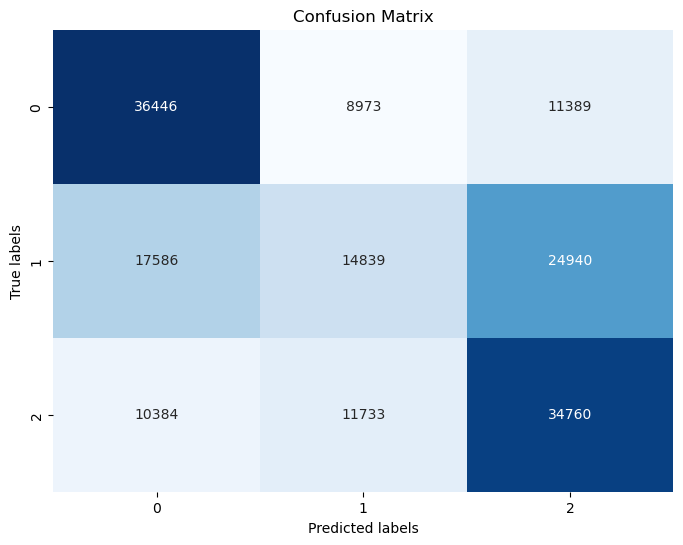

In [67]:
# Make predictions on the test set
y_pred = lr_model.predict(x_test)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=lr.classes_, yticklabels=lr.classes_, cbar=False)

# Add labels and title
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')

# Save the plot to a file (you can change the file path and format)
plt.savefig('C:/Users/ammar/OneDrive/Desktop/ESSEX/Dissertation/graphs/logistic_regression_confusion_matrix.jpg', bbox_inches='tight')  # Saves the plot

# Display the plot
plt.show()

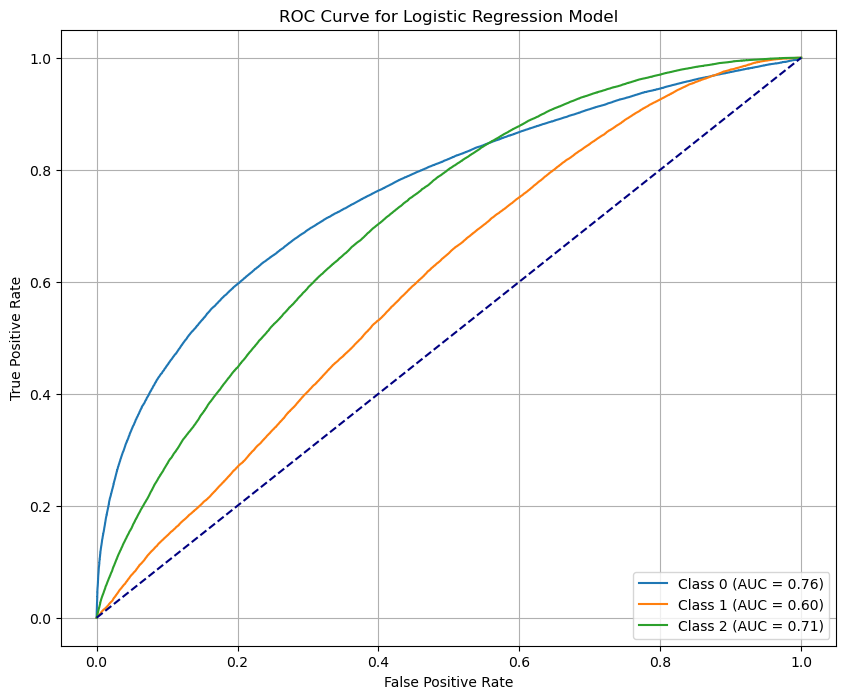

Individual AUC for each class: {0: 0.7617031247870139, 1: 0.6015104946779807, 2: 0.7122669138898672}
Average AUC: 0.6918


In [68]:
# Binarize the true labels for multi-class ROC AUC calculation
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))

# Initialize a figure for plotting ROC curves
plt.figure(figsize=(10, 8))

# Plot ROC curve for each class
fpr = {}
tpr = {}
roc_auc = {}
n_classes = y_test_bin.shape[1]  # Number of unique classes

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

    # Plot ROC curve for each class
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

# Plot the diagonal line (chance level)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')

# Set plot labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Logistic Regression Model')
plt.legend(loc="lower right")
plt.grid(True)
plt.savefig('C:/Users/ammar/OneDrive/Desktop/ESSEX/Dissertation/graphs/logistic_regression_roc.jpg', bbox_inches='tight')  # Saves the plot

plt.show()

# Compute average AUC (macro average)
average_auc = np.mean(list(roc_auc.values()))
print(f"Individual AUC for each class: {roc_auc}")
print(f"Average AUC: {average_auc:.4f}")

### Decision Tree (DT)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
# Initialize the Decision Tree Classifier
dt = DecisionTreeClassifier(random_state=42)

# Fit the model on the training data
dt.fit(x_train, y_train)


In [120]:
# Save the model to a file
with open('C:/Users/ammar/OneDrive/Desktop/ESSEX/Dissertation/Models/decision_tree_model.pkl', 'wb') as f:
    pickle.dump(dt, f)


In [121]:
with open('C:/Users/ammar/OneDrive/Desktop/ESSEX/Dissertation/Models/decision_tree_model.pkl', 'rb') as f:
    dt_model = pickle.load(f)

In [122]:
# Make predictions on the test set
y_pred = dt_model.predict(x_test)
y_pred_proba = dt_model.predict_proba(x_test)  # Predicted probabilities for ROC AUC

In [2]:
# Accuracy
dt_accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {dt_accuracy:.4f}")

# Log loss expects predicted probabilities, so we use predict_proba
dt_loss = log_loss(y_test, y_pred_proba)
print(f"Loss: {dt_loss:.4f}")

Accuracy: 0.8178
Loss: 6.2325


In [124]:
# Calculate precision, recall, and F1 score with average='macro'
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

# Print the results
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

Precision: 0.8167023409192945
Recall: 0.8176172801301247
F1 Score: 0.8170596247333783


In [125]:
# Optionally, print a classification report for more metrics
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.85      0.84     56808
           1       0.86      0.87      0.86     57365
           2       0.76      0.73      0.75     56877

    accuracy                           0.82    171050
   macro avg       0.82      0.82      0.82    171050
weighted avg       0.82      0.82      0.82    171050



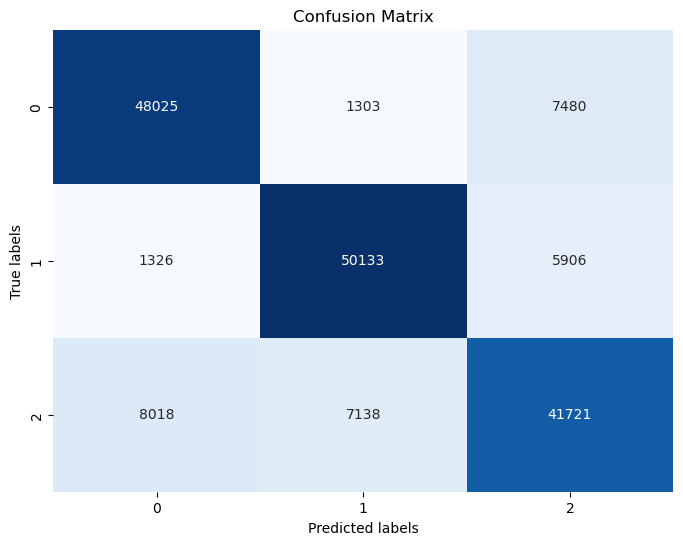

In [127]:
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=dt.classes_, yticklabels=dt.classes_, cbar=False)

# Add labels and title
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.savefig('C:/Users/ammar/OneDrive/Desktop/ESSEX/Dissertation/graphs/decision_tree_confusion_matrix.jpg', bbox_inches='tight')  # Saves the plot

# Display the plot
plt.show()

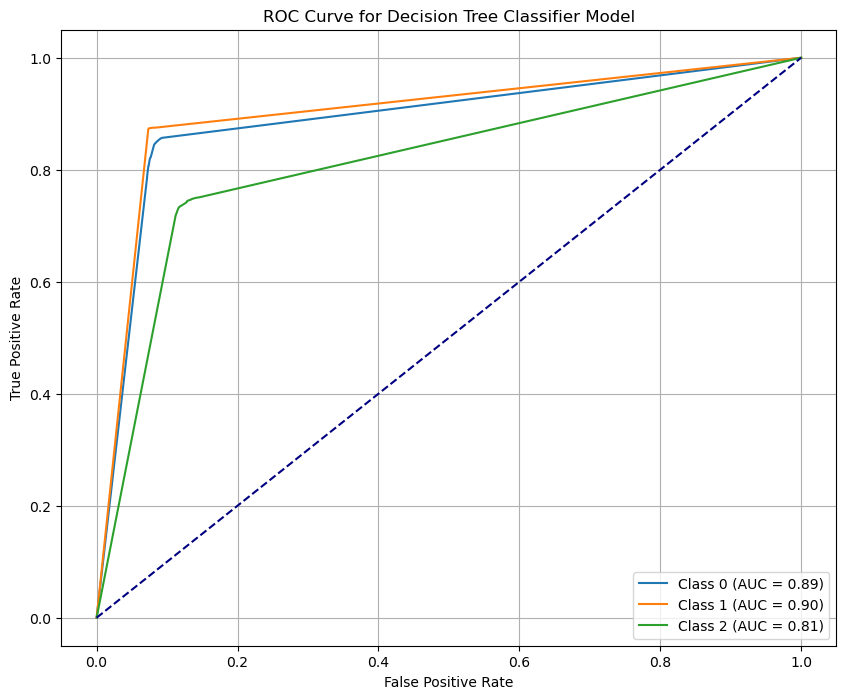

Individual AUC for each class: {0: 0.888178212028409, 1: 0.9001681318363142, 2: 0.81296348701439}
Average AUC: 0.8671


In [128]:
# Binarize the true labels for multi-class ROC AUC calculation
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))

# Initialize a figure for plotting ROC curves
plt.figure(figsize=(10, 8))

# Plot ROC curve for each class
fpr = {}
tpr = {}
roc_auc = {}
n_classes = y_test_bin.shape[1]  # Number of unique classes

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

    # Plot ROC curve for each class
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

# Plot the diagonal line (chance level)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')

# Set plot labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Decision Tree Classifier Model')
plt.legend(loc="lower right")
plt.grid(True)
plt.savefig('C:/Users/ammar/OneDrive/Desktop/ESSEX/Dissertation/graphs/decision_tree_roc.jpg', bbox_inches='tight')  # Saves the plot
plt.show()

# Compute average AUC (macro average)
average_auc = np.mean(list(roc_auc.values()))
print(f"Individual AUC for each class: {roc_auc}")
print(f"Average AUC: {average_auc:.4f}")

### K-Nearest Neighbors (K-NN)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)

In [80]:
# Save the model to a file
with open('C:/Users/ammar/OneDrive/Desktop/ESSEX/Dissertation/Models/knn_model.pkl', 'wb') as f:
    pickle.dump(knn, f)

In [81]:

with open('C:/Users/ammar/OneDrive/Desktop/ESSEX/Dissertation/Models/knn_model.pkl', 'rb') as f:
    knn_model = pickle.load(f)

In [82]:
# Make predictions on the test set
y_pred = knn_model.predict(x_test)
y_pred_proba = knn_model.predict_proba(x_test)  # Predicted probabilities for ROC AUC

In [13]:

# Accuracy
knn_accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {knn_accuracy:.4f}")


# Log loss expects predicted probabilities, so we use predict_proba
knn_loss = log_loss(y_test, y_pred_proba)
print(f"Loss: {knn_loss:.4f}")

Accuracy: 0.8096
Loss: 1.8660


In [84]:
# Calculate precision, recall, and F1 score with average='macro'
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

# Print the results
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

Precision: 0.809746175805078
Recall: 0.809173746375532
F1 Score: 0.8057989644750397


In [85]:
# Optionally, print a classification report for more metrics
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.66      0.73     56808
           1       0.86      0.94      0.90     57365
           2       0.75      0.83      0.79     56877

    accuracy                           0.81    171050
   macro avg       0.81      0.81      0.81    171050
weighted avg       0.81      0.81      0.81    171050



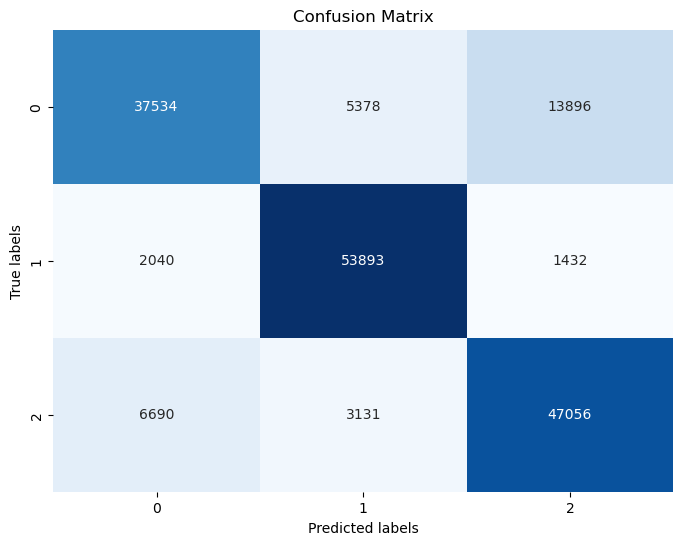

In [87]:
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=knn.classes_, yticklabels=knn.classes_, cbar=False)

# Add labels and title
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.savefig('C:/Users/ammar/OneDrive/Desktop/ESSEX/Dissertation/graphs/knn_confusion_matrix.png', bbox_inches='tight')  # Saves the plot as a PNG image

# Display the plot
plt.show()

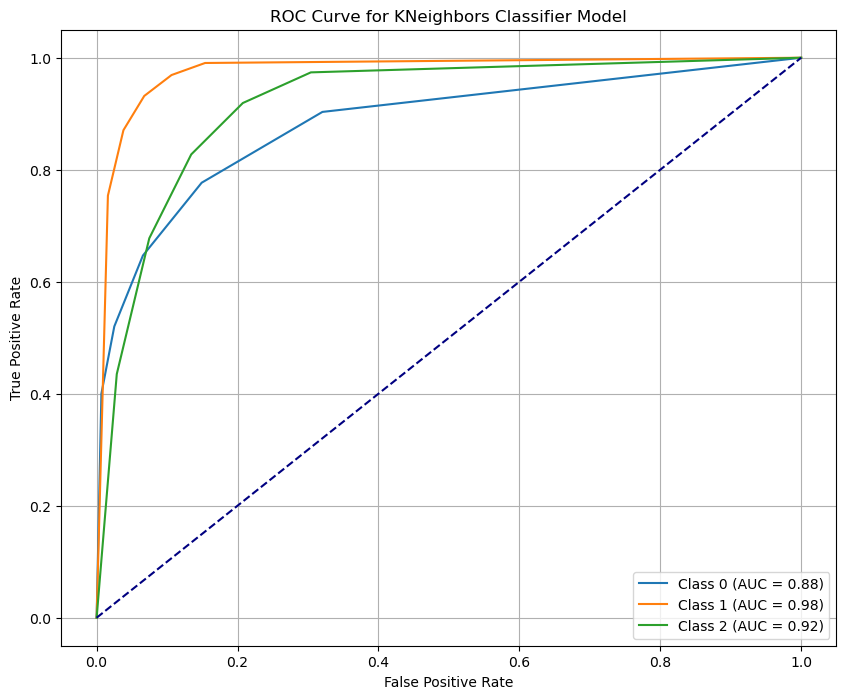

Individual AUC for each class: {0: 0.8834518325390146, 1: 0.9761107549132921, 2: 0.918863195867644}
Average AUC: 0.9261


In [88]:

# Binarize the true labels for multi-class ROC AUC calculation
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))

# Initialize a figure for plotting ROC curves
plt.figure(figsize=(10, 8))

# Plot ROC curve for each class
fpr = {}
tpr = {}
roc_auc = {}
n_classes = y_test_bin.shape[1]  # Number of unique classes

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

    # Plot ROC curve for each class
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

# Plot the diagonal line (chance level)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')

# Set plot labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for KNeighbors Classifier Model')
plt.legend(loc="lower right")
plt.grid(True)
plt.savefig('C:/Users/ammar/OneDrive/Desktop/ESSEX/Dissertation/graphs/knn_roc.png', bbox_inches='tight')  # Saves the plot as a PNG image
plt.show()

# Compute average AUC (macro average)
average_auc = np.mean(list(roc_auc.values()))
print(f"Individual AUC for each class: {roc_auc}")
print(f"Average AUC: {average_auc:.4f}")

### Extreme Gradient Boosting (XGBoost)

In [ ]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(x_train, y_train)

In [90]:
# Save the model to a file
with open('C:/Users/ammar/OneDrive/Desktop/ESSEX/Dissertation/Models/xgb_model.pkl', 'wb') as f:
    pickle.dump(xgb, f)


In [91]:
with open('C:/Users/ammar/OneDrive/Desktop/ESSEX/Dissertation/Models/xgb_model.pkl', 'rb') as f:
    xgb_model = pickle.load(f)

In [92]:
# Make predictions on the test set
y_pred = xgb_model.predict(x_test)
y_pred_proba = xgb_model.predict_proba(x_test)  # Predicted probabilities for ROC AUC


In [12]:

# Accuracy
xgb_accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {xgb_accuracy:.4f}")

# Log loss expects predicted probabilities, so we use predict_proba
xgb_loss = log_loss(y_test, y_pred_proba)
print(f"Loss: {xgb_loss:.4f}")


Accuracy: 0.7920
Loss: 0.4928


In [94]:
# Calculate precision, recall, and F1 score with average='macro'
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

# Print the results
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

Precision: 0.7887267059853738
Recall: 0.7921330290551257
F1 Score: 0.7879069734532749


In [95]:
# Optionally, print a classification report for more metrics
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.94      0.88     56808
           1       0.81      0.78      0.80     57365
           2       0.74      0.65      0.69     56877

    accuracy                           0.79    171050
   macro avg       0.79      0.79      0.79    171050
weighted avg       0.79      0.79      0.79    171050



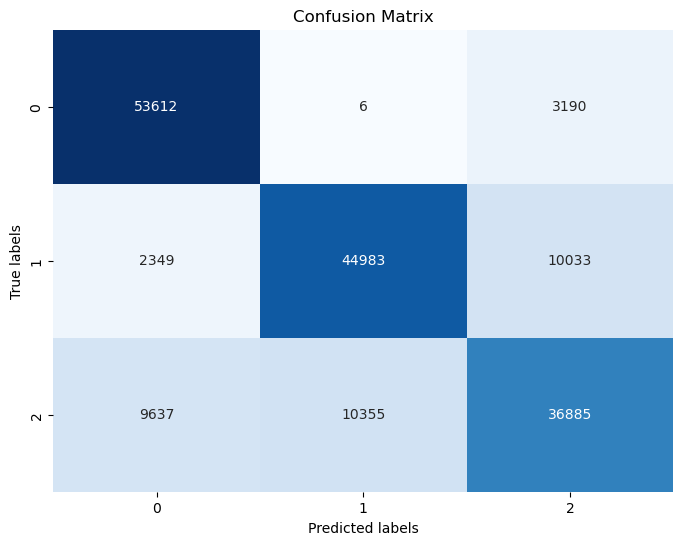

In [97]:
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=xgb.classes_, yticklabels=xgb.classes_, cbar=False)

# Add labels and title
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.savefig('C:/Users/ammar/OneDrive/Desktop/ESSEX/Dissertation/graphs/xgb_confusion_matrix.jpg', bbox_inches='tight')  # Saves the plot

# Display the plot
plt.show()

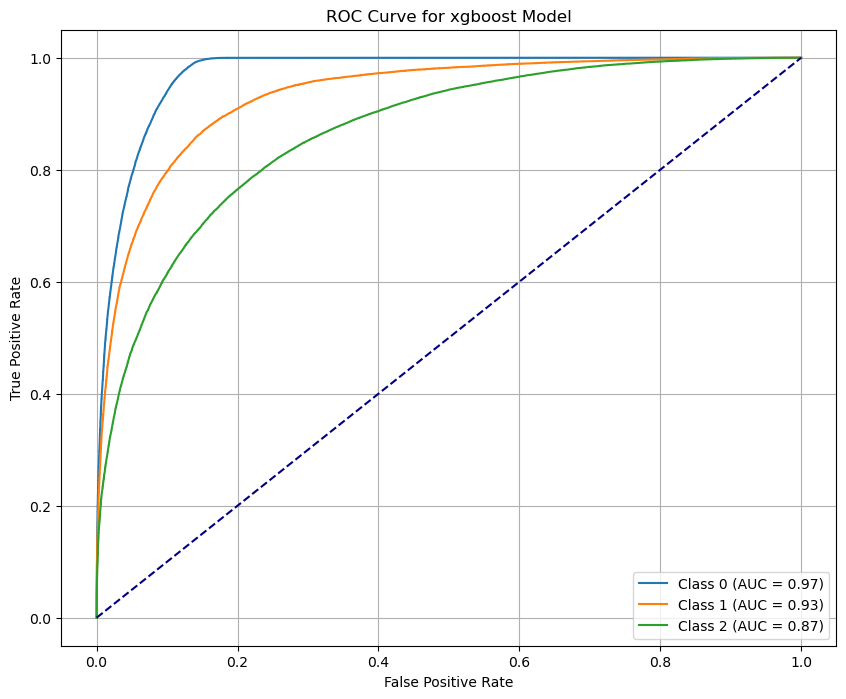

Individual AUC for each class: {0: 0.9719478732181916, 1: 0.9330850077087429, 2: 0.867685300709721}
Average AUC: 0.9242


In [98]:
# Binarize the true labels for multi-class ROC AUC calculation
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))

# Initialize a figure for plotting ROC curves
plt.figure(figsize=(10, 8))

# Plot ROC curve for each class
fpr = {}
tpr = {}
roc_auc = {}
n_classes = y_test_bin.shape[1]  # Number of unique classes

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

    # Plot ROC curve for each class
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

# Plot the diagonal line (chance level)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')

# Set plot labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for xgboost Model')
plt.legend(loc="lower right")
plt.grid(True)
plt.savefig('C:/Users/ammar/OneDrive/Desktop/ESSEX/Dissertation/graphs/xgb_roc.jpg', bbox_inches='tight')  # Saves the plot 
plt.show()

# Compute average AUC (macro average)
average_auc = np.mean(list(roc_auc.values()))
print(f"Individual AUC for each class: {roc_auc}")
print(f"Average AUC: {average_auc:.4f}")

### Naive Bayes (NB)

In [139]:
# Initialize the Multinomial Naive Bayes classifier
nb = MultinomialNB()

# Fit the model to the training data
nb.fit(x_train, y_train)

MultinomialNB()

In [140]:
# Save the model to a file
with open('C:/Users/ammar/OneDrive/Desktop/ESSEX/Dissertation/Models/nb_model.pkl', 'wb') as f:
    pickle.dump(nb, f)

In [141]:
with open('C:/Users/ammar/OneDrive/Desktop/ESSEX/Dissertation/Models/nb_model.pkl', 'rb') as f:
    nb_model = pickle.load(f)

In [142]:
# Make predictions on the test set
y_pred = nb_model.predict(x_test)
y_pred_proba = nb_model.predict_proba(x_test)  # Predicted probabilities for ROC AUC

In [143]:
# Accuracy
nb_accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {nb_accuracy:.4f}")

# Log loss expects predicted probabilities, so we use predict_proba
nb_loss = log_loss(y_test, y_pred_proba)
print(f"Loss: {nb_loss:.4f}")

Accuracy: 0.4602
Loss: 1.0417


In [144]:
# Calculate precision, recall, and F1 score with average='macro'
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

# Print the results
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

Precision: 0.44516729896709356
Recall: 0.46098900656210323
F1 Score: 0.443473182725058


In [104]:
# Optionally, print a classification report for more metrics
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.63      0.56     56808
           1       0.37      0.22      0.28     57365
           2       0.46      0.53      0.49     56877

    accuracy                           0.46    171050
   macro avg       0.45      0.46      0.44    171050
weighted avg       0.44      0.46      0.44    171050



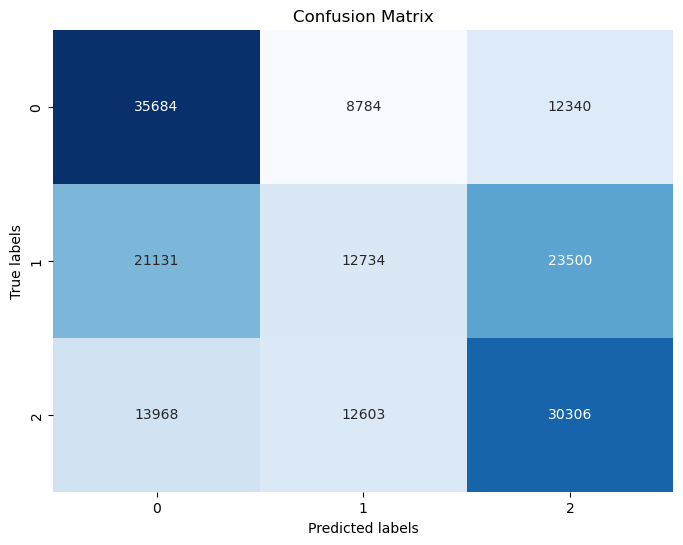

In [106]:
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=nb_model.classes_, yticklabels=nb_model.classes_, cbar=False)

# Add labels and title
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.savefig('C:/Users/ammar/OneDrive/Desktop/ESSEX/Dissertation/graphs/nb_confusion_matrix.jpg', bbox_inches='tight')  # Saves the plot

# Display the plot
plt.show()

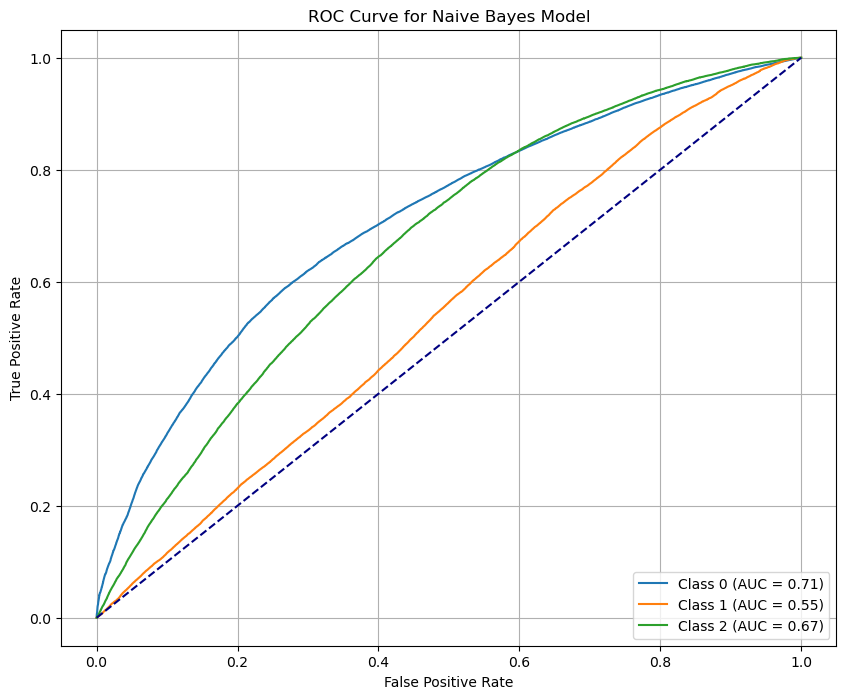

Individual AUC for each class: {0: 0.7100723722042664, 1: 0.546786946462082, 2: 0.6681258040966191}
Average AUC: 0.6417


In [107]:
# Binarize the true labels for multi-class ROC AUC calculation
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))

# Initialize a figure for plotting ROC curves
plt.figure(figsize=(10, 8))

# Plot ROC curve for each class
fpr = {}
tpr = {}
roc_auc = {}
n_classes = y_test_bin.shape[1]  # Number of unique classes

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

    # Plot ROC curve for each class
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

# Plot the diagonal line (chance level)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')

# Set plot labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Naive Bayes Model')
plt.legend(loc="lower right")
plt.grid(True)
plt.savefig('C:/Users/ammar/OneDrive/Desktop/ESSEX/Dissertation/graphs/nb_roc.png', bbox_inches='tight')  # Saves the plot as a PNG image
plt.show()

# Compute average AUC (macro average)
average_auc = np.mean(list(roc_auc.values()))
print(f"Individual AUC for each class: {roc_auc}")
print(f"Average AUC: {average_auc:.4f}")

# Artificial Neural Network

In [157]:
# Ensure target variables are one-hot encoded 
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)
# Build the Neural Network model for multiclass classification
model = Sequential()

# Add input layer (with 10 features in x_train)
model.add(Dense(units=64, activation='relu', input_dim=x_train.shape[1]))

# Add hidden layer
model.add(Dense(units=32, activation='relu'))

# Add output layer for multiclass classification
# The number of units is equal to the number of classes in your target variable
model.add(Dense(units=y_train_one_hot.shape[1], activation='softmax'))

# Compile the model for multiclass classification
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train_one_hot, epochs=40, batch_size=64, validation_data=(x_test, y_test_one_hot))



Epoch 1/40
6237/6237 ━━━━━━━━━━━━━━━━━━━━ 22s 3ms/step - accuracy: 0.4889 - loss: 0.9909 - val_accuracy: 0.5162 - val_loss: 0.9579
Epoch 2/40
6237/6237 ━━━━━━━━━━━━━━━━━━━━ 18s 3ms/step - accuracy: 0.5176 - loss: 0.9561 - val_accuracy: 0.5253 - val_loss: 0.9468
Epoch 3/40
6237/6237 ━━━━━━━━━━━━━━━━━━━━ 18s 3ms/step - accuracy: 0.5265 - loss: 0.9483 - val_accuracy: 0.5322 - val_loss: 0.9431
Epoch 4/40
6237/6237 ━━━━━━━━━━━━━━━━━━━━ 18s 3ms/step - accuracy: 0.5326 - loss: 0.9412 - val_accuracy: 0.5397 - val_loss: 0.9343
Epoch 5/40
6237/6237 ━━━━━━━━━━━━━━━━━━━━ 18s 3ms/step - accuracy: 0.5390 - loss: 0.9352 - val_accuracy: 0.5441 - val_loss: 0.9293
Epoch 6/40
6237/6237 ━━━━━━━━━━━━━━━━━━━━ 19s 3ms/step - accuracy: 0.5453 - loss: 0.9282 - val_accuracy: 0.5522 - val_loss: 0.9216
Epoch 7/40
6237/6237 ━━━━━━━━━━━━━━━━━━━━ 19s 3ms/step - accuracy: 0.5521 - loss: 0.9211 - val_accuracy: 0.5562 - val_loss: 0.9181
Epoch 8/40
6237/6237 ━━━━━━━━━━━━━━━━━━━━ 17s 3ms/step - accuracy: 0.5566 - loss: 0

In [158]:
# Get the final training accuracy from the history object
ann_train_accuracy = history.history['accuracy'][-1]  # Last epoch's training accuracy
print(f"Final Training Accuracy: {ann_train_accuracy * 100:.2f}%")
# Evaluate the model
ann_test_loss, ann_test_accuracy = model.evaluate(x_test, y_test_one_hot)
print(f"Test Accuracy: {ann_test_accuracy * 100:.2f}%")

Final Training Accuracy: 60.27%
5346/5346 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.6019 - loss: 0.8549
Test Accuracy: 60.21%


In [159]:
# Save the trained model
model.save('C:/Users/ammar/OneDrive/Desktop/ESSEX/Dissertation/Models/ann_model.h5')  # Saves in HDF5 format

In [160]:
# Load the model from the file
ann_model = load_model('C:/Users/ammar/OneDrive/Desktop/ESSEX/Dissertation/Models/ann_model.h5')

In [161]:
# Get model predictions
y_pred_prob = ann_model.predict(x_test)
y_pred = ann_model.predict(x_test)


5346/5346 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step
5346/5346 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step


In [162]:
# Convert predicted probabilities to class labels by taking the argmax
y_pred = np.argmax(y_pred_prob, axis=1)

# Also, make sure that y_test is in the correct format (the same format as y_pred, i.e., integer labels)
y_test_labels = np.argmax(y_test_one_hot, axis=1)

# Now you can calculate the metrics
precision = precision_score(y_test_labels, y_pred, average='macro')
recall = recall_score(y_test_labels, y_pred, average='macro')
f1 = f1_score(y_test_labels, y_pred, average='macro')

# Print the results
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

Precision: 0.6030652558299389
Recall: 0.6021569653139326
F1 Score: 0.602404998597699


In [164]:
# Use y_pred_prob (probabilities) to get the predicted class labels
y_pred_labels = np.argmax(y_pred_prob, axis=1)

# Ensure y_test is in the correct format (class labels, not one-hot encoded)
y_test_labels = np.argmax(y_test_one_hot, axis=1)

# Now you can print the classification report
print("\nClassification Report:")
print(classification_report(y_test_labels, y_pred_labels))


Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.64      0.65     56808
           1       0.59      0.57      0.58     57365
           2       0.56      0.59      0.58     56877

    accuracy                           0.60    171050
   macro avg       0.60      0.60      0.60    171050
weighted avg       0.60      0.60      0.60    171050



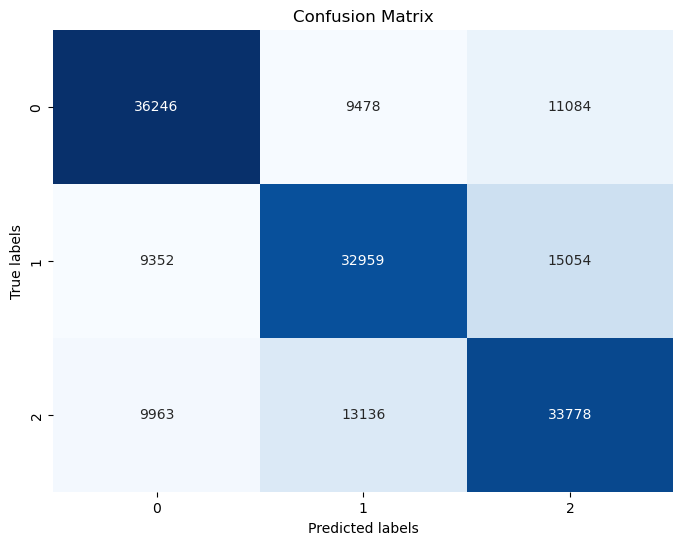

In [167]:
# If y_pred is already class labels (1D array), skip np.argmax
if y_pred.ndim == 2:  # It's a 2D array of probabilities
    y_pred_class = np.argmax(y_pred, axis=1)  # Convert probabilities to class predictions
else:  # If it's already class labels (1D array)
    y_pred_class = y_pred

# Convert the true labels (y_test) from one-hot encoded to class labels if necessary
y_test_labels = np.argmax(y_test_one_hot, axis=1)

# Compute the confusion matrix
cm = confusion_matrix(y_test_labels, y_pred_class)

# Plot the confusion matrix using seaborn's heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=np.arange(3), yticklabels=np.arange(3))

# Add labels and title
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.savefig('C:/Users/ammar/OneDrive/Desktop/ESSEX/Dissertation/graphs/ann_confusion_matrix.png', bbox_inches='tight')  # Saves the plot as a PNG image

# Display the plot
plt.show()


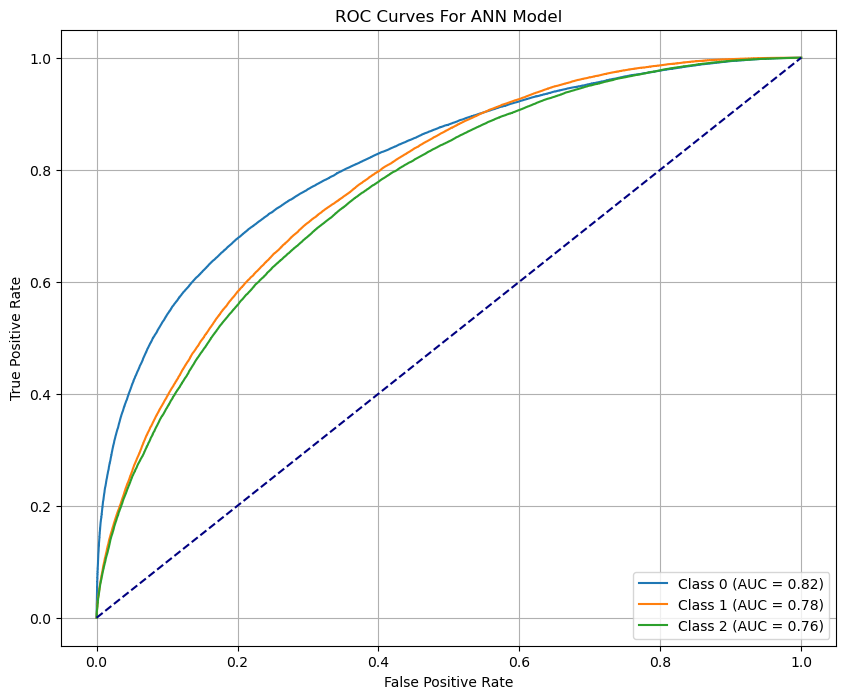

Individual AUC for each class: {0: 0.8173077196936116, 1: 0.779405279583483, 2: 0.7639057767910514}
Average AUC: 0.7869


In [168]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import numpy as np

# Binarize the true labels for multi-class ROC AUC calculation
y_test_bin = label_binarize(y_test_labels, classes=np.unique(y_test_labels))  # One-hot encode true labels

# Initialize a figure for plotting ROC curves
plt.figure(figsize=(10, 8))

# Dictionary to store FPR, TPR, and AUC for each class
fpr = {}
tpr = {}
roc_auc = {}
n_classes = y_test_bin.shape[1]  # Number of unique classes

# Plot ROC curve for each class
for i in range(n_classes):
    # Use y_pred_prob for class probabilities
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])  # y_pred_prob should be 2D
    roc_auc[i] = auc(fpr[i], tpr[i])

    # Plot the ROC curve for each class
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

# Plot the diagonal line (chance level)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')

# Set plot labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves For ANN Model')
plt.legend(loc="lower right")
plt.grid(True)
plt.savefig('C:/Users/ammar/OneDrive/Desktop/ESSEX/Dissertation/graphs/ann_roc.png', bbox_inches='tight')  # Saves the plot as a PNG image

# Display the plot
plt.show()

# Compute average AUC (macro average)
average_auc = np.mean(list(roc_auc.values()))
print(f"Individual AUC for each class: {roc_auc}")
print(f"Average AUC: {average_auc:.4f}")


### Support Vector Machine (SVM)

#### Train Test Split

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(X_resampled,y_resampled,test_size=0.2,random_state=42)
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

**80:20** train-test is used for seperating the dataset. 80% used to train the model. Whereas, 20% is used to test its performance. This split is used for support vector machine (SVM) classifier.

In [ ]:
svm_model = SVC(C=1, kernel='rbf', gamma=0.1, probability=True)
svm_model.fit(x_train, y_train)


In [ ]:
# Save the model to a file
with open('C:/Users/ammar/OneDrive/Desktop/ESSEX/Dissertation/Models/svm_model.pkl', 'wb') as f:
    pickle.dump(svm_model, f)


In [ ]:
with open('C:/Users/ammar/OneDrive/Desktop/ESSEX/Dissertation/Models/svm_model.pkl', 'rb') as f:
    svm_model = pickle.load(f)

In [ ]:
# Make predictions on the test set
y_pred = svm_model.predict(x_test)
y_pred_proba = svm_model.predict_proba(x_test)  # Predicted probabilities for ROC AUC


In [10]:
# Accuracy
svm_accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {svm_accuracy:.4f}")

# Log loss expects predicted probabilities, so we use predict_proba
svm_loss = log_loss(y_test, y_pred_proba)
print(f"Loss: {svm_loss:.4f}")

Accuracy: 0.5903
Loss: 0.8769


In [ ]:
# Calculate precision, recall, and F1 score with average='macro'
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

# Print the results
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

Precision: 0.5234565098071121
Recall: 0.5232758574446756
F1 Score: 0.5222764560749821


In [ ]:
# Optionally, print a classification report for more metrics
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.59      0.56      0.58     37783
           1       0.46      0.43      0.44     38258
           2       0.52      0.58      0.55     37992

    accuracy                           0.52    114033
   macro avg       0.52      0.52      0.52    114033
weighted avg       0.52      0.52      0.52    114033



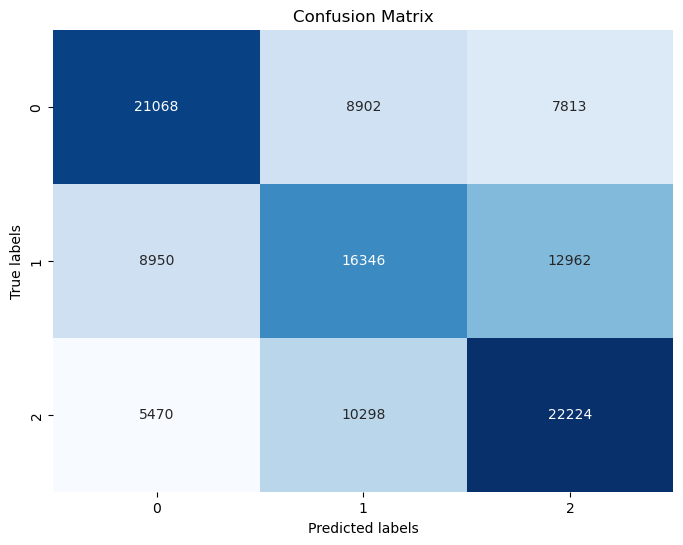

In [ ]:
# Make predictions on the test set
y_pred = svm_model.predict(x_test)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=rf.classes_, yticklabels=rf.classes_, cbar=False)

# Add labels and title
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.savefig('C:/Users/ammar/OneDrive/Desktop/ESSEX/Dissertation/graphs/svm_confusion_matrix.png', bbox_inches='tight')  # Saves the plot as a PNG image

# Display the plot
plt.show()

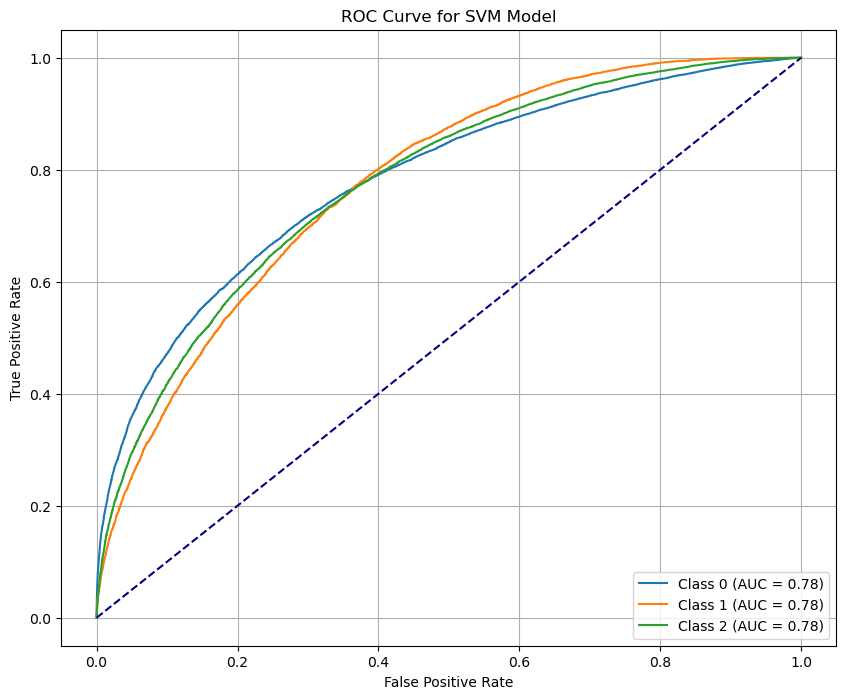

Individual AUC for each class: {0: 0.7830815355852206, 1: 0.7768405906664468, 2: 0.7771453643724119}
Average AUC: 0.7790


In [ ]:
# Binarize the true labels for multi-class ROC AUC calculation
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))

# Initialize a figure for plotting ROC curves
plt.figure(figsize=(10, 8))

# Plot ROC curve for each class
fpr = {}
tpr = {}
roc_auc = {}
n_classes = y_test_bin.shape[1]  # Number of unique classes

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

    # Plot ROC curve for each class
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

# Plot the diagonal line (chance level)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')

# Set plot labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for SVM Model')
plt.legend(loc="lower right")
plt.grid(True)
plt.savefig('C:/Users/ammar/OneDrive/Desktop/ESSEX/Dissertation/graphs/svm_roc.png', bbox_inches='tight')  # Saves the plot as a PNG image
plt.show()

# Compute average AUC (macro average)
average_auc = np.mean(list(roc_auc.values()))
print(f"Individual AUC for each class: {roc_auc}")
print(f"Average AUC: {average_auc:.4f}")

## Accuracy & Loss comparison graphs

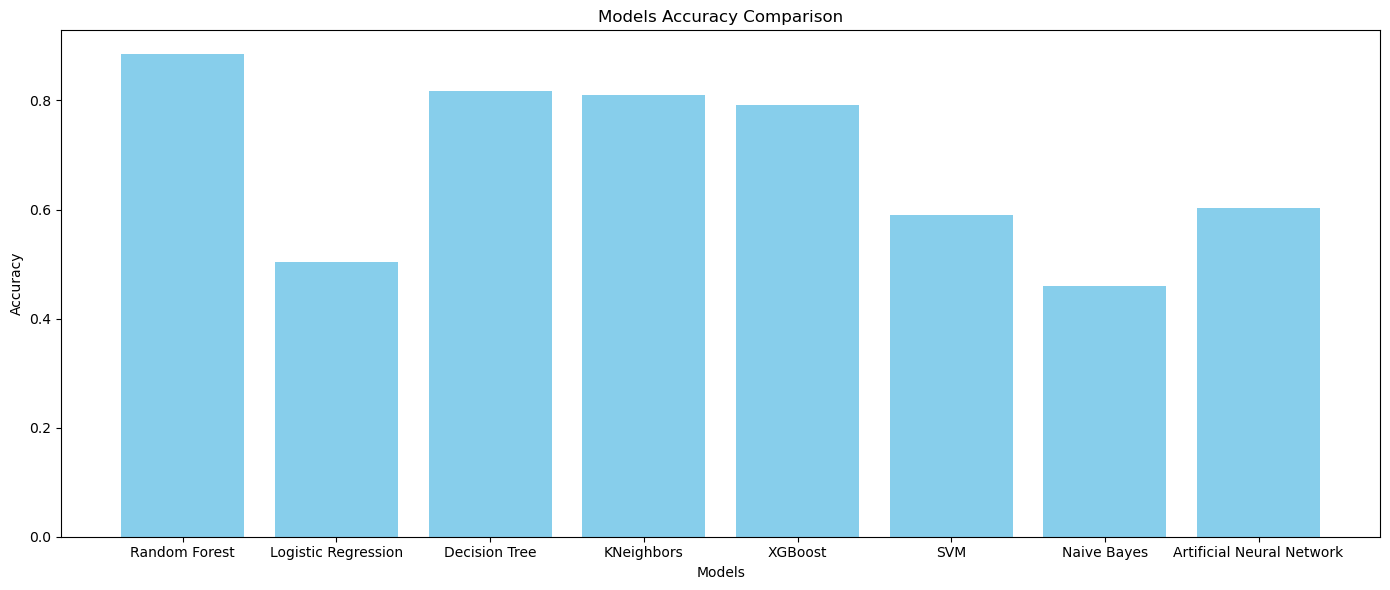

In [171]:
import matplotlib.pyplot as plt

models = ['Random Forest', 'Logistic Regression', 'Decision Tree', 'KNeighbors', 'XGBoost', 'SVM', 'Naive Bayes', 'Artificial Neural Network']

rf_accuracy_final = rf_accuracy  
lr_accuracy_final = lr_accuracy  
dt_accuracy_final = dt_accuracy  
knn_accuracy_final = knn_accuracy  
xgb_accuracy_final = xgb_accuracy  
svm_accuracy_final = svm_accuracy
nb_accuracy_final = nb_accuracy  
ann_accuracy_final = ann_test_accuracy  

# Accuracy bar chart
plt.figure(figsize=(14, 6))
accuracy_values = [rf_accuracy_final, lr_accuracy_final, dt_accuracy_final, knn_accuracy_final, xgb_accuracy_final,svm_accuracy_final,  nb_accuracy_final, ann_accuracy_final]
plt.bar(models, accuracy_values, color='skyblue')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Models Accuracy Comparison')

# Save the accuracy plot
plt.tight_layout()
plt.savefig('C:/Users/ammar/OneDrive/Desktop/ESSEX/Dissertation/graphs/models_accuracy_comparison_bar_chart.png')

plt.show()


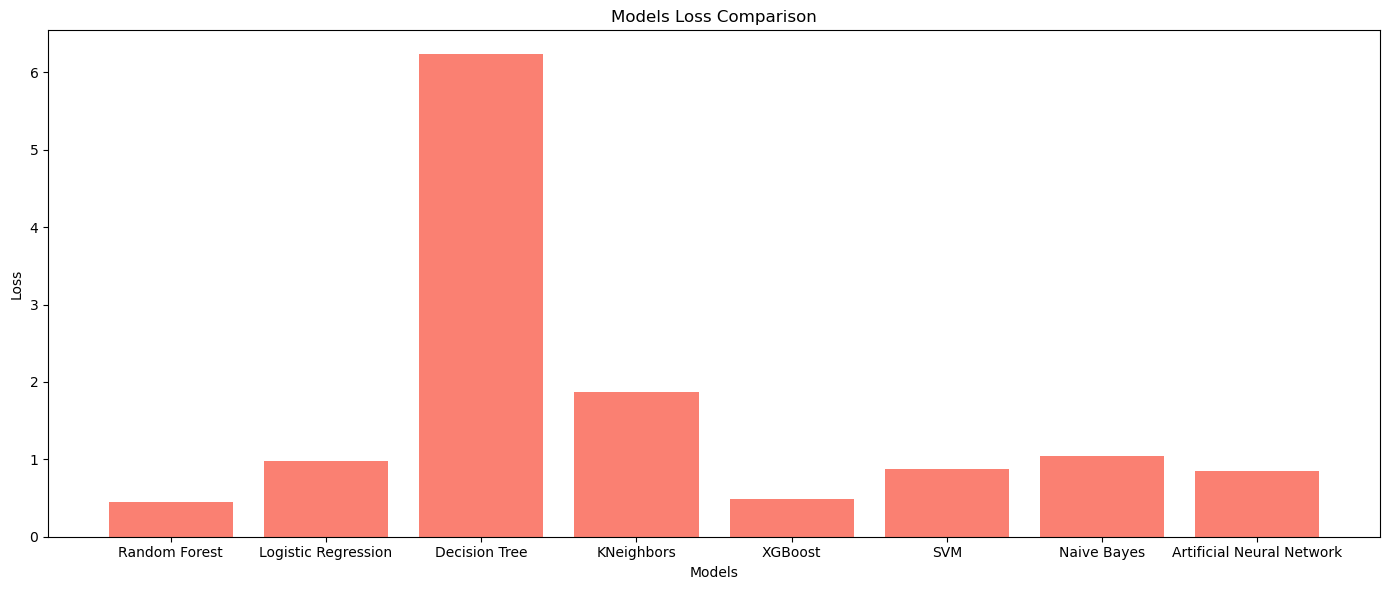

In [172]:
import matplotlib.pyplot as plt

# Assuming final loss values for each model 
rf_loss_final = rf_loss  
lr_loss_final = lr_loss  
dt_loss_final = dt_loss  
knn_loss_final = knn_loss  
xgb_loss_final = xgb_loss  
svm_loss_final = svm_loss
nb_loss_final = nb_loss  
ann_loss_final = ann_test_loss  

# Loss bar chart
plt.figure(figsize=(14, 6))
loss_values = [rf_loss_final, lr_loss_final, dt_loss_final, knn_loss_final, xgb_loss_final, svm_loss_final, nb_loss_final, ann_loss_final]
plt.bar(models, loss_values, color='salmon')
plt.xlabel('Models')
plt.ylabel('Loss')
plt.title('Models Loss Comparison')

# Save the loss plot
plt.tight_layout()
plt.savefig('C:/Users/ammar/OneDrive/Desktop/ESSEX/Dissertation/graphs/models_loss_comparison_bar_chart.png')

plt.show()


## Conclusion:-


The dataset contains **229781** individuals. The dataset contains **190055** records with percentage distribution of **82.71%** of non-diabetic class. The dataset contains 4629 records with percentage distribution of **2.014%** of pre-diabetic class. The dataset contains 35097 records with percentage distribution of **15.27%** of diabetes class.

Individuals with high blood pressure (HighBP) are likely to have diabetic, as high blood pressure contributes in causing diabetes.

Individuals with smoking habits are more likely to be diabetic. 

Individuals with BMI level between group 2 and group 3 are more diabetic. 

The classification results shows that Random Forest (RF) model provides more accuracy predictions and better perfromance than other methods. It gives the accuracy **88.44%**, which is higher than other machine learning models. 